In [1]:
from my_functions import *

#Main Libraries 
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import datetime
import scipy.fftpack
import tensorflow as tf
from tensorflow import keras # And the tf and keras framework, thanks to Google
import scipy.io as io
import sys, os, time
import math
from scipy.fft import fft, fftfreq #Fourier
import pywt # Wavelet

from skimage.restoration import denoise_wavelet #Noise
import matplotlib.patheffects as PathEffects
import seaborn as sns
from sklearn.manifold import TSNE
import time
from tensorflow.python.framework import ops

#Extra Libraries 
from mpl_toolkits import mplot3d
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors
from matplotlib import cm
from scipy.spatial.distance import pdist, squareform
import random
import pandas as pd # data processing, CSV file I/O 
import seaborn as sns #I used sns.distplot because it has more manual properties than plt.hist()
from scipy.stats import pearsonr #includes the PCC function

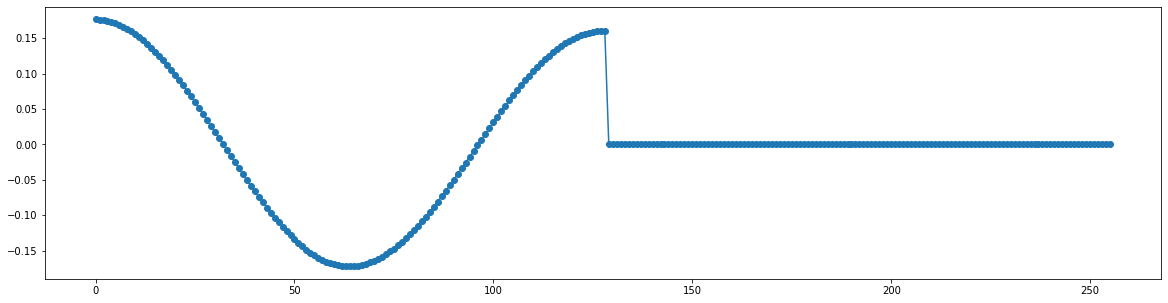

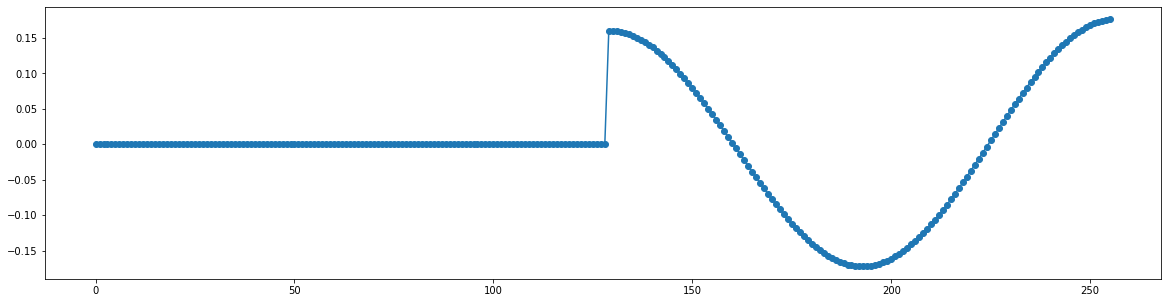

In [11]:
from collections import deque

def Abs_Part_Values_Complex_Morlet_Wavelet(w_mor_complex,t_shift):
    w_mor_complex_abs = np.abs(w_mor_complex)
    w_mor_complex_abs = deque(w_mor_complex_abs)
    w_mor_complex_abs = list(w_mor_complex_abs)
    max_val = 0
    max_val_index = 0
    for i in range(0,len(w_mor_complex_abs)):
        if(w_mor_complex_abs[i]>max_val):
            max_val = w_mor_complex_abs[i]
            max_val_index = i   
    init_index = max_val_index
    for i in range(0,init_index):
        w_mor_complex_abs.insert(len(w_mor_complex_abs),0)
    if(t_shift>0):
        for i in range(0,t_shift):
            w_mor_complex_abs.pop()
            w_mor_complex_abs.insert(0,0)   
    w_mor_complex_abs = w_mor_complex_abs[init_index:]
    return(w_mor_complex_abs)

def Real_Part_Values_Complex_Morlet_Wavelet(w_mor_complex,t_shift):
    w_mor_complex_real = w_mor_complex.real
    w_mor_complex_real = deque(w_mor_complex_real)
    w_mor_complex_real = list(w_mor_complex_real)
    max_val = 0
    max_val_index = 0
    for i in range(0,len(w_mor_complex_real)):
        if(w_mor_complex_real[i]>max_val):
            max_val = w_mor_complex_real[i]
            max_val_index = i
    init_index = max_val_index
    for i in range(0,init_index):
        w_mor_complex_real.insert(len(w_mor_complex_real),0)
    if(t_shift>0):
        for i in range(0,t_shift):
            w_mor_complex_real.pop()
            w_mor_complex_real.insert(0,0)
    w_mor_complex_real = w_mor_complex_real[init_index:]
    return(w_mor_complex_real)
    
def Complex_Part_Values_Complex_Morlet_Wavelet(w_mor_complex,t_shift):
    w_mor_complex_complex = w_mor_complex.imag
    w_mor_complex_complex = deque(w_mor_complex_complex)
    w_mor_complex_complex = list(w_mor_complex_complex)
    max_val = 0
    max_val_index = 0
    for i in range(0,len(w_mor_complex_complex)):
        if(w_mor_complex_complex[i]>max_val):
            max_val = w_mor_complex_complex[i]
            max_val_index = i
    init_index = max_val_index
    for i in range(0,init_index):
        w_mor_complex_complex.insert(len(w_mor_complex_complex),0)
    if(t_shift>0):
        for i in range(0,t_shift):
            w_mor_complex_complex.pop()
            w_mor_complex_complex.insert(0,0)
    w_mor_complex_complex = w_mor_complex_complex[init_index:]
    return(w_mor_complex_complex)

def Complex_Morlet(B,C,t_shift): # B: T_p the bandwidth (Period Parameter), C: the scale factor (f_c the center frequency)
    time = np.linspace(-1, 1, 10000)
    w_mor_complex = []
    for t in time:
        w_mor_complex.append((1/(math.sqrt(math.pi*B))) * np.exp(- (t**2)/B) * np.exp(2j*math.pi*C*t))
    w_mor_complex = np.array(w_mor_complex)
    w_mor_complex_abs = Abs_Part_Values_Complex_Morlet_Wavelet(w_mor_complex,t_shift)
    w_mor_complex_real = Real_Part_Values_Complex_Morlet_Wavelet(w_mor_complex,t_shift)
    w_mor_complex_complex = Complex_Part_Values_Complex_Morlet_Wavelet(w_mor_complex,t_shift)
    
    return(w_mor_complex_abs,w_mor_complex_real,w_mor_complex_complex)

def Sample_Signal(signal,new_range):
    period = len(signal)//new_range
    sampled_signal = []
    for i in range(0,new_range):
        sampled_signal.append(signal[i*period])
    sampled_signal = np.array(sampled_signal)
    return(sampled_signal)
    
def Complex_Morlet_Wavelet(B,C,t_shift,wavelet_range): # B: T_p the bandwidth (Period Parameter), C: the scale factor (f_c the center frequency)  
    w_abs, w_real, w_imag = Complex_Morlet(B, C, t_shift)
    w_abs_sampled = Sample_Signal(w_abs,wavelet_range)
    w_real_sampled = Sample_Signal(w_real,wavelet_range)
    w_imag_sampled = Sample_Signal(w_imag,wavelet_range)
    return(w_abs_sampled,w_real_sampled,w_imag_sampled)
    
w_abs, w_real, w_imag = Complex_Morlet_Wavelet(10.2, 1.0, 0,256)
w_real = np.array(w_real)
plt.figure(1, figsize=(20,5))
plt.plot(w_real,'-o')
plt.show()

w_abs, w_real, w_imag = Complex_Morlet_Wavelet(10.2, 1.0, 10000,256)
w_real = np.array(w_real)
plt.figure(1, figsize=(20,5))
plt.plot(w_real,'-o')
plt.show()

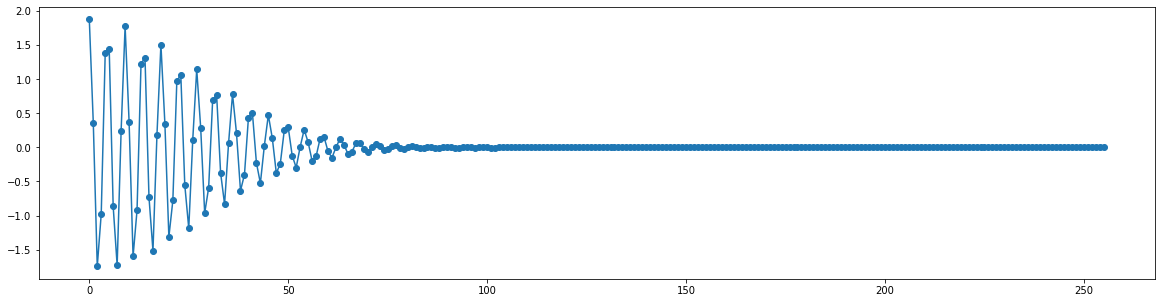

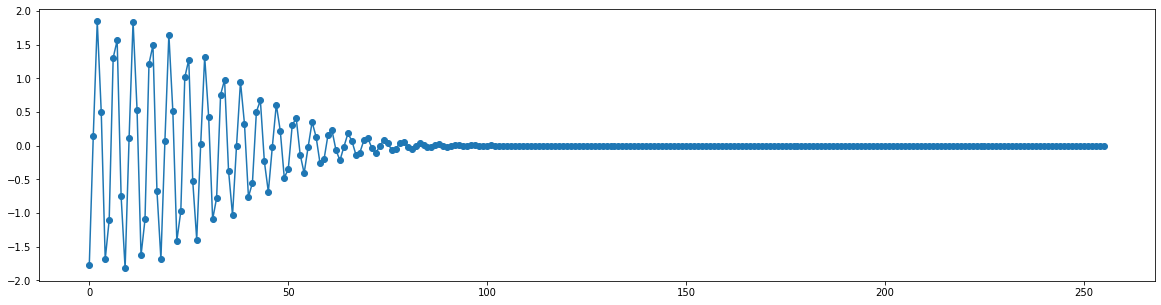

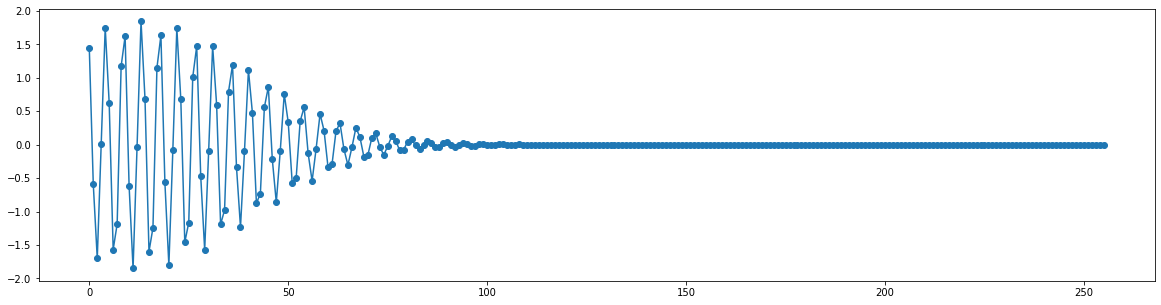

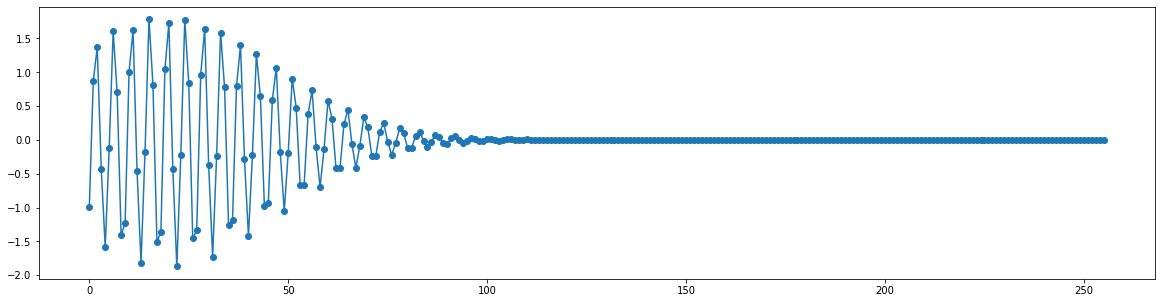

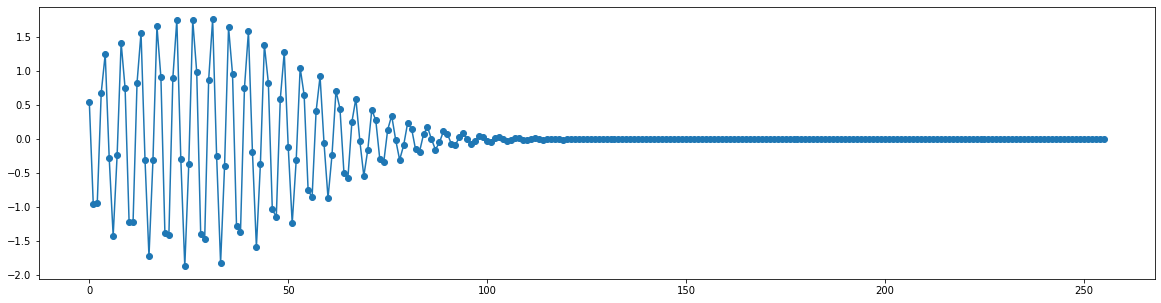

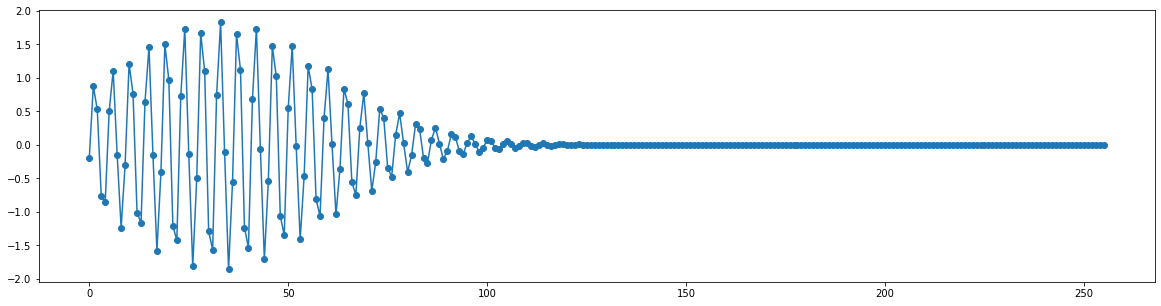

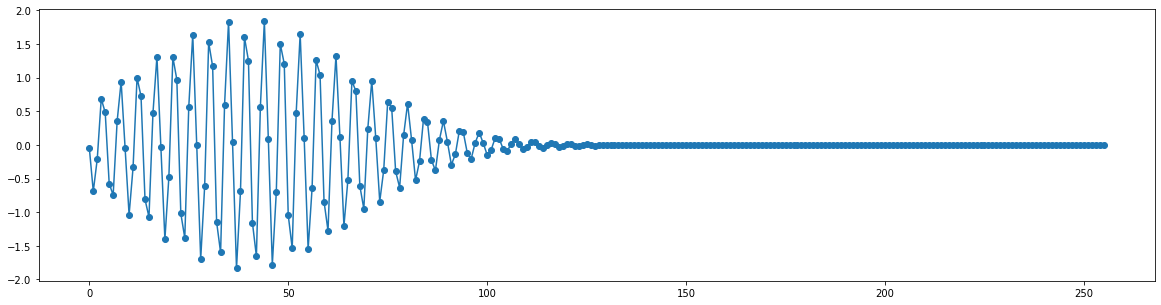

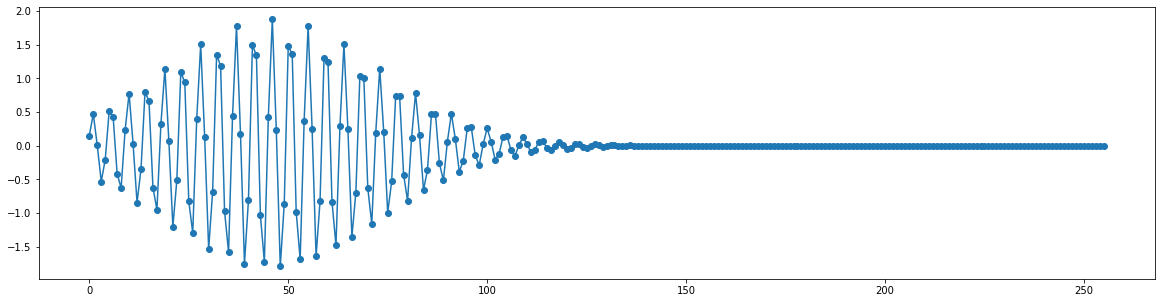

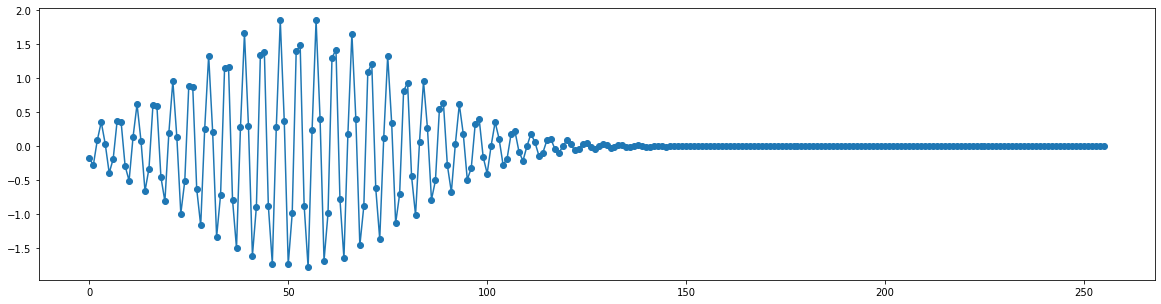

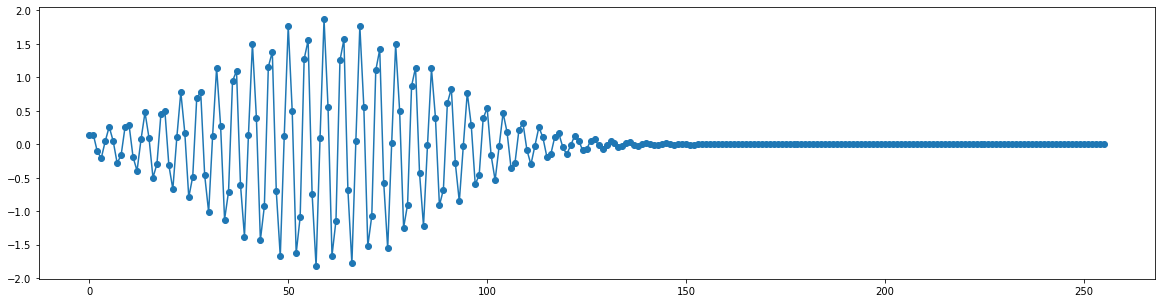

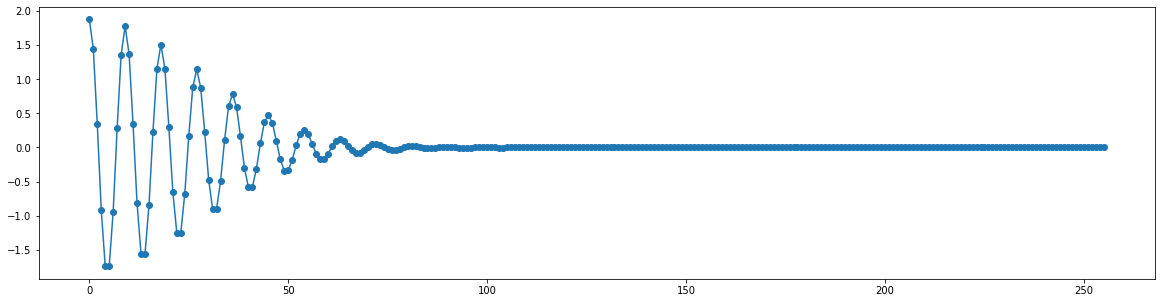

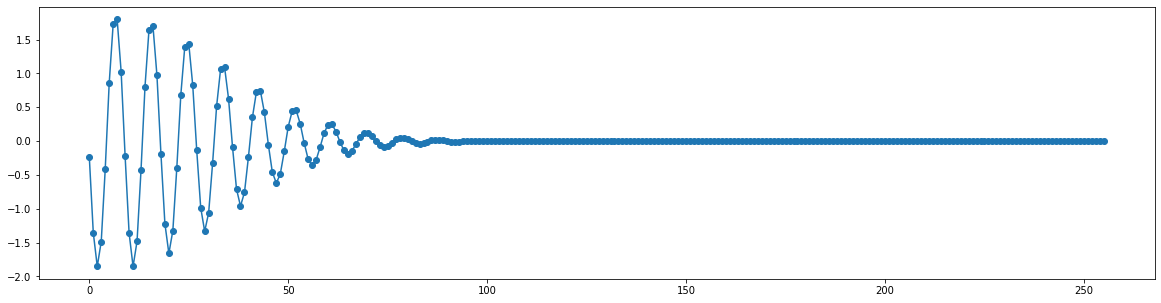

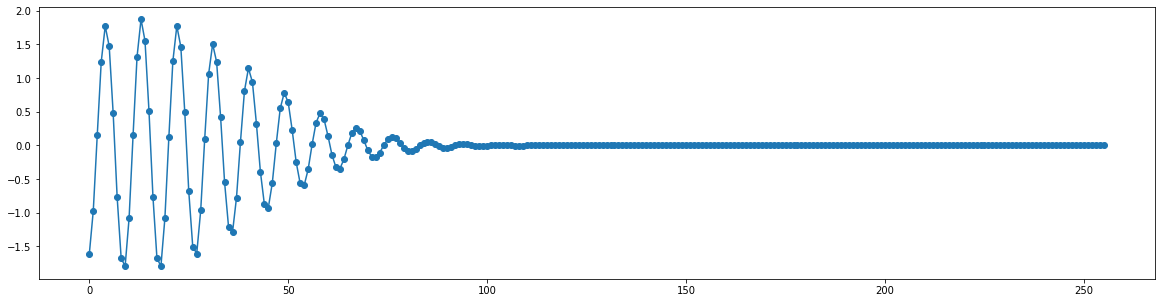

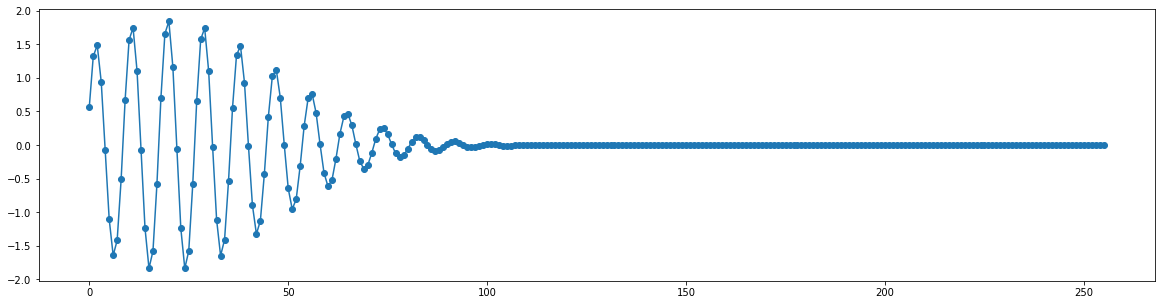

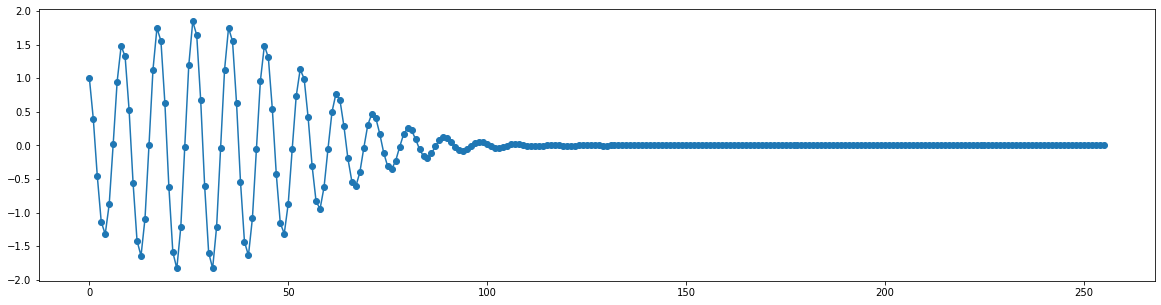

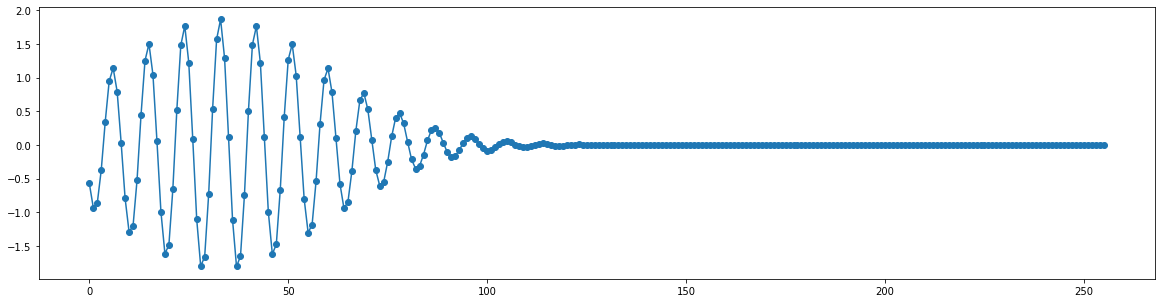

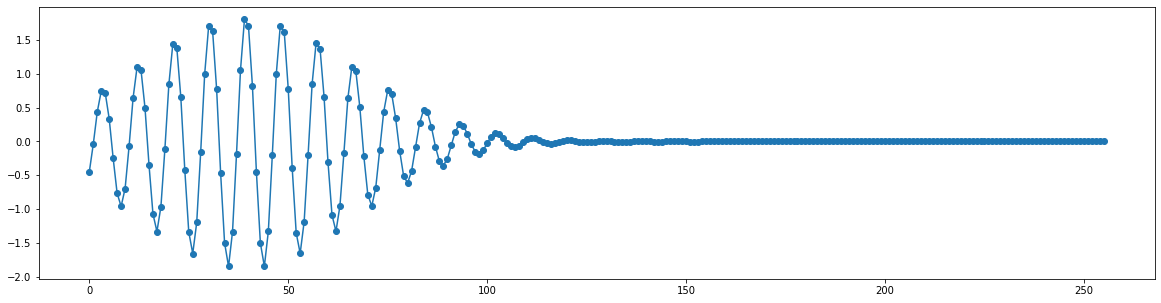

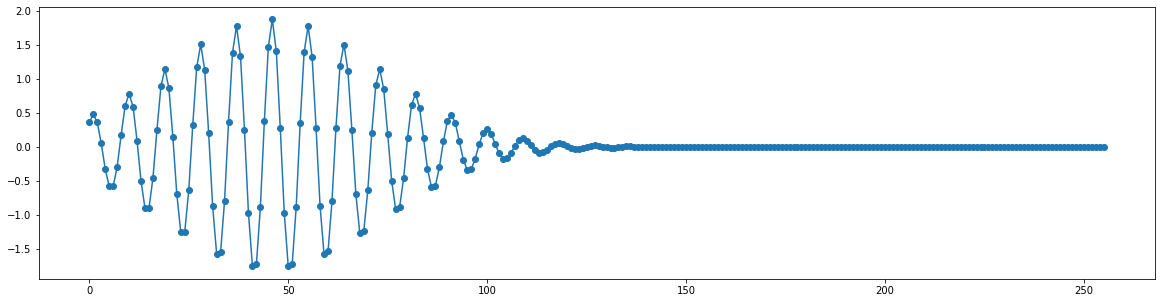

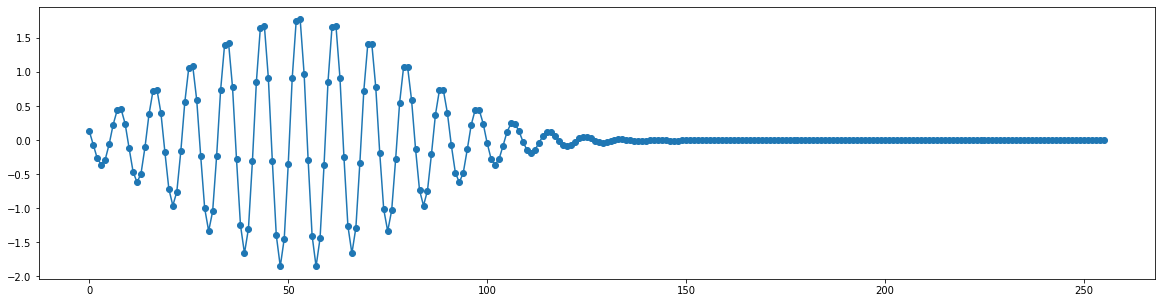

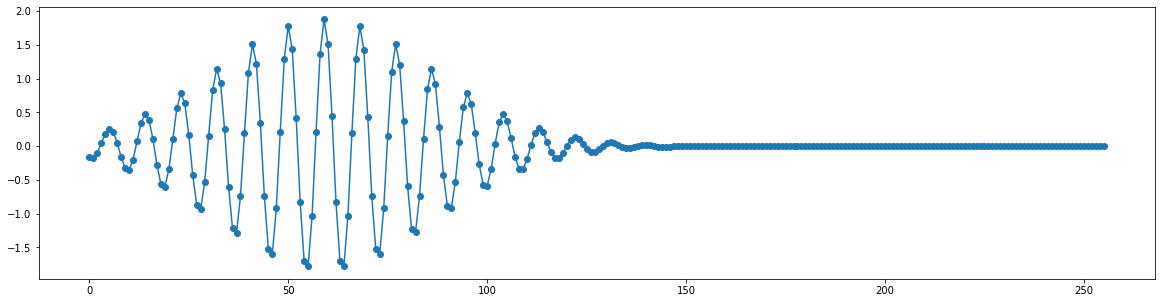

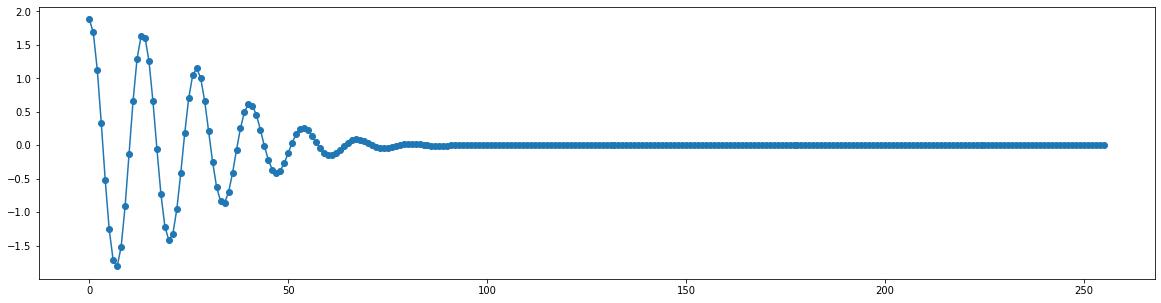

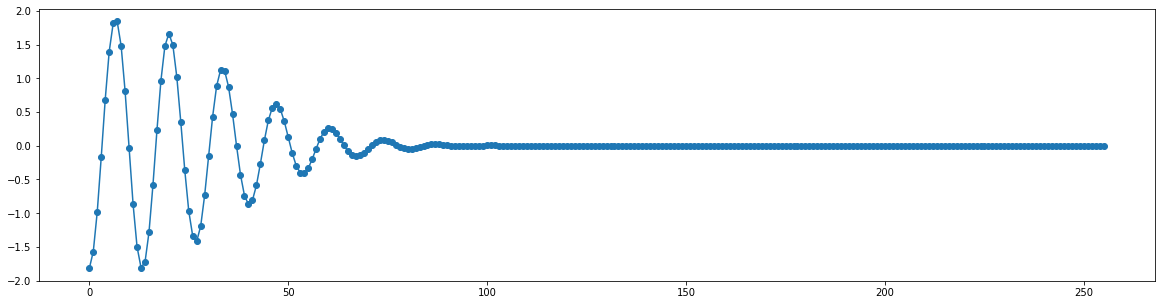

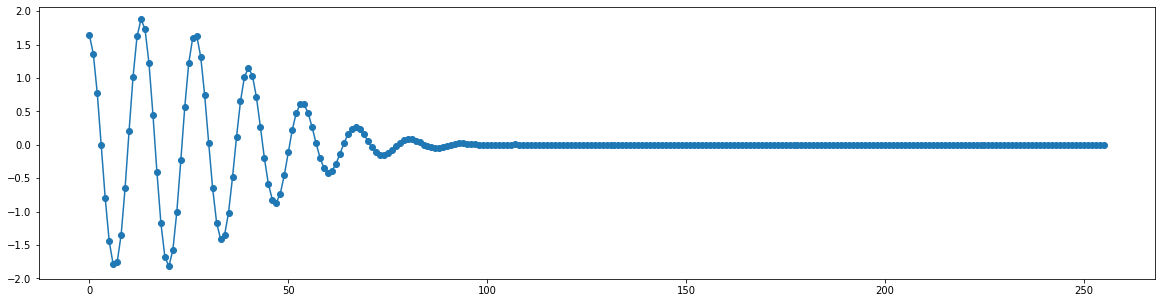

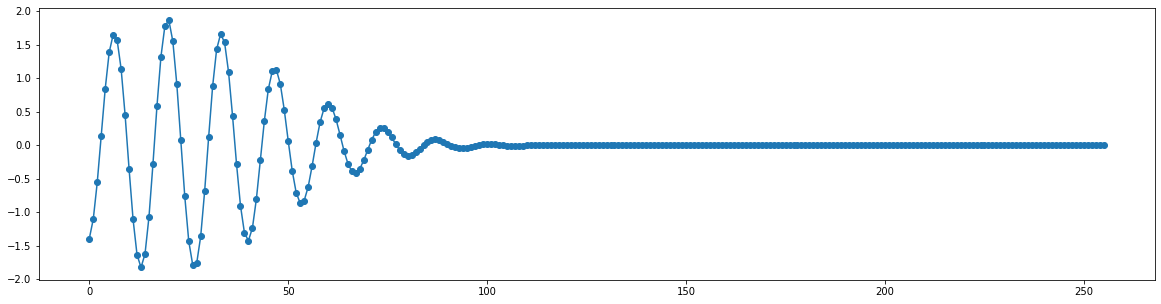

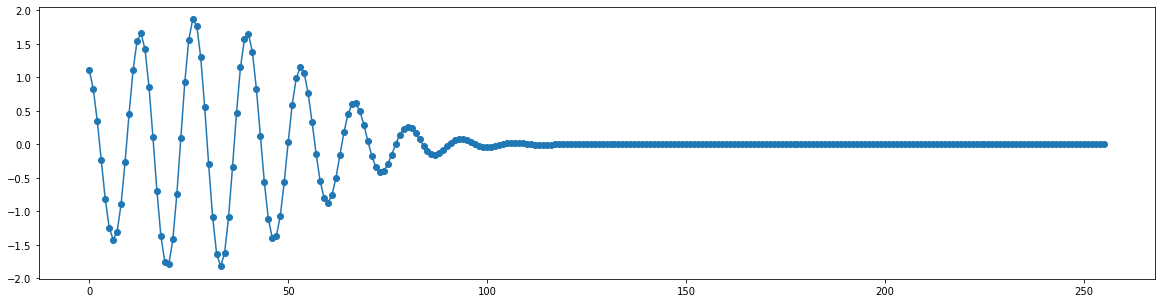

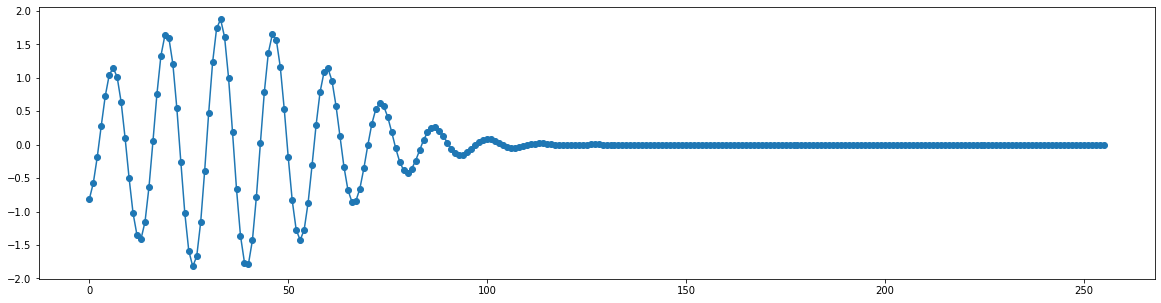

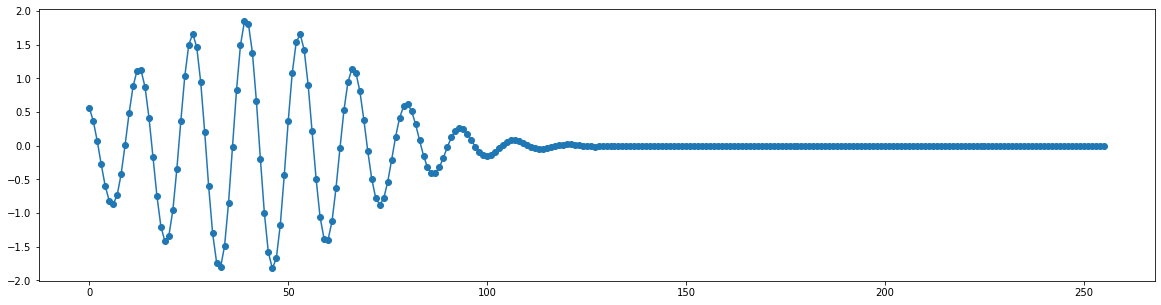

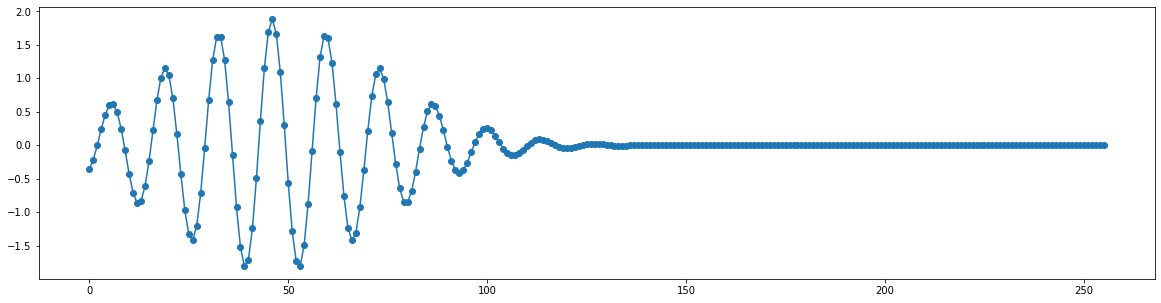

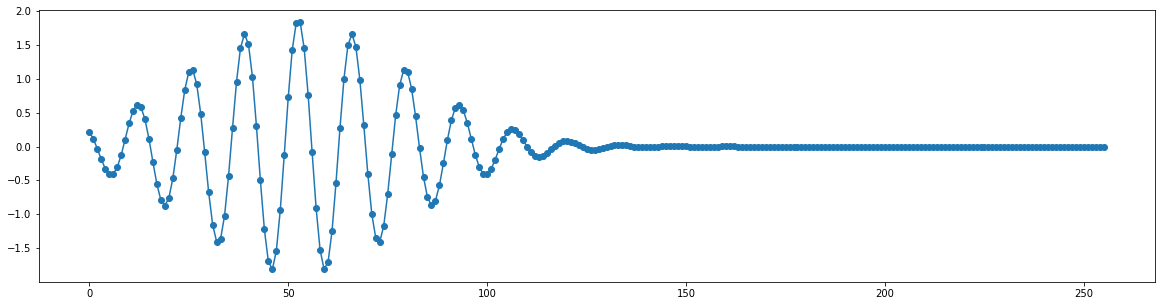

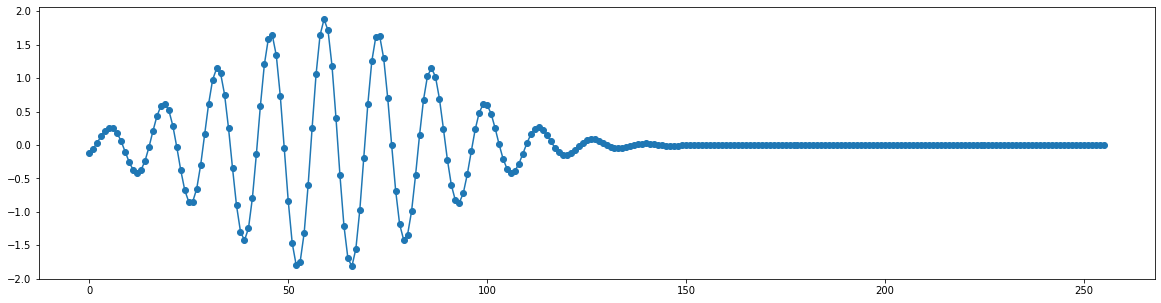

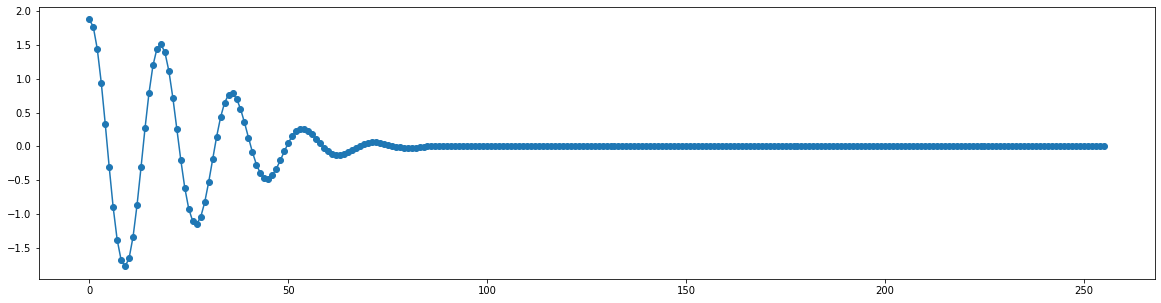

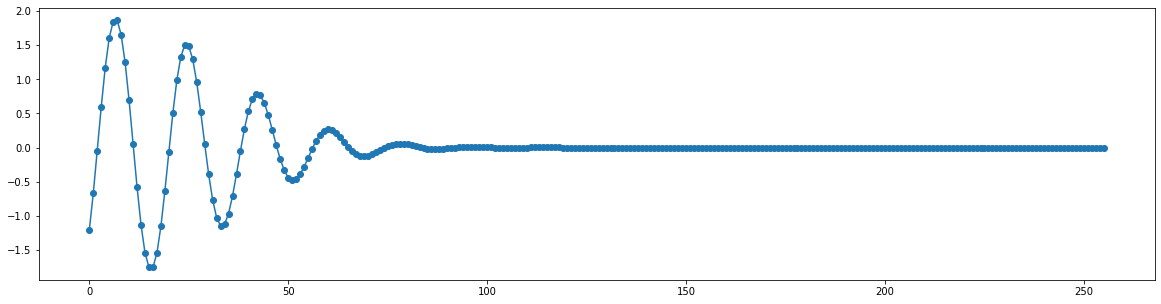

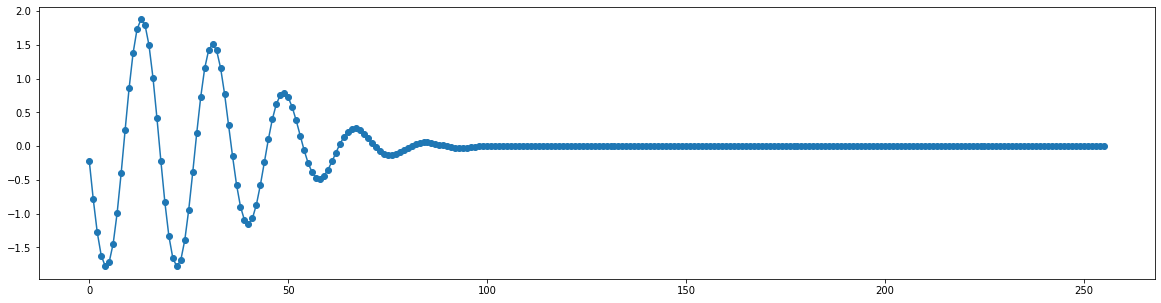

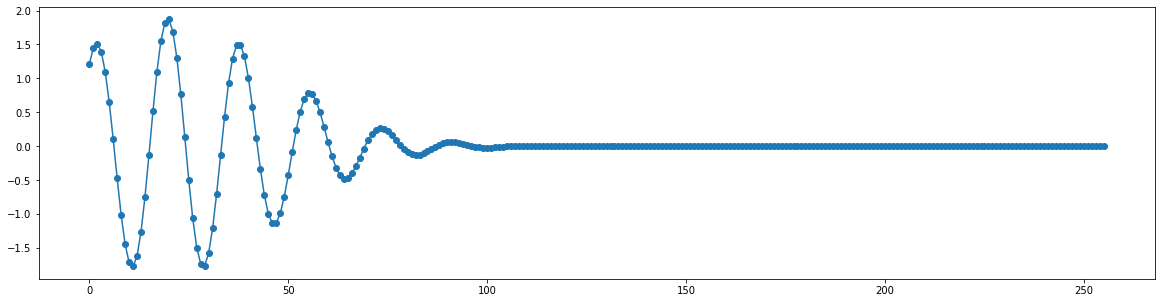

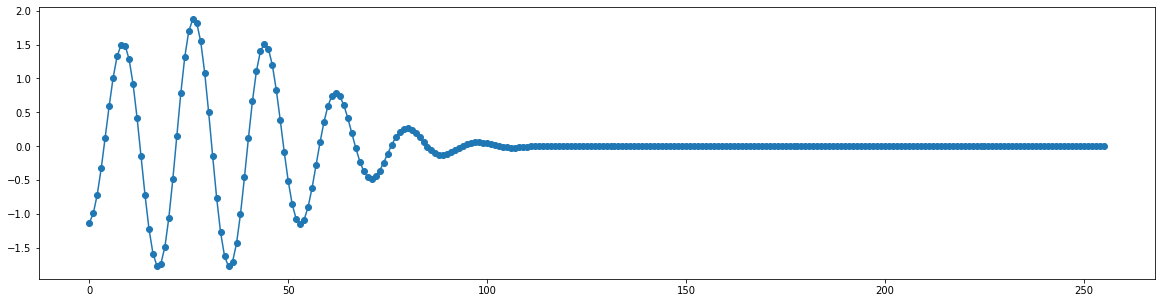

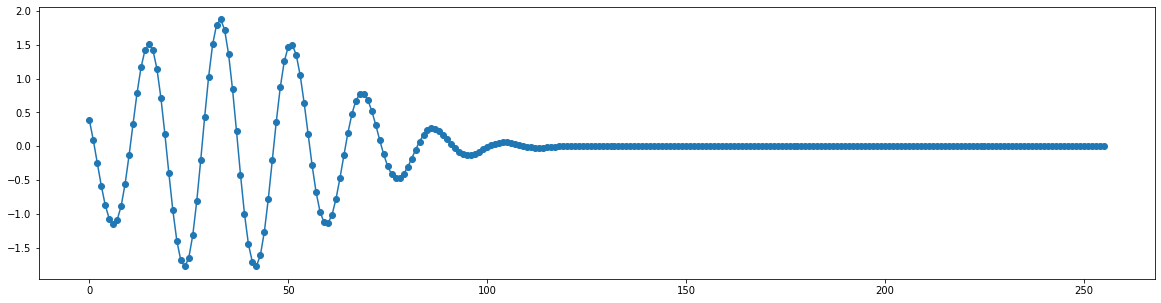

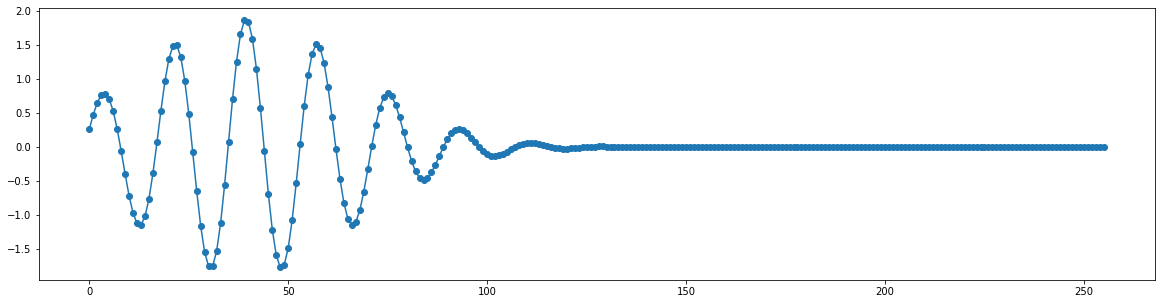

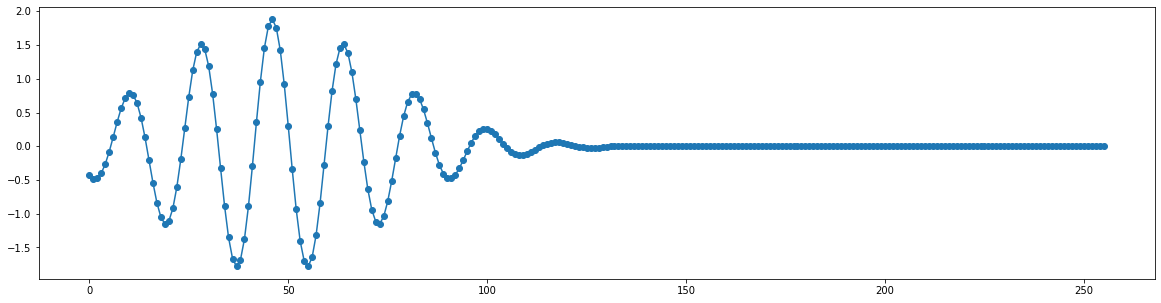

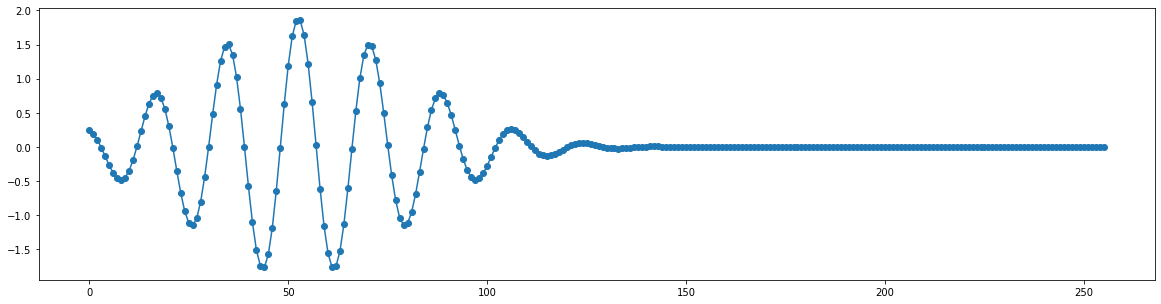

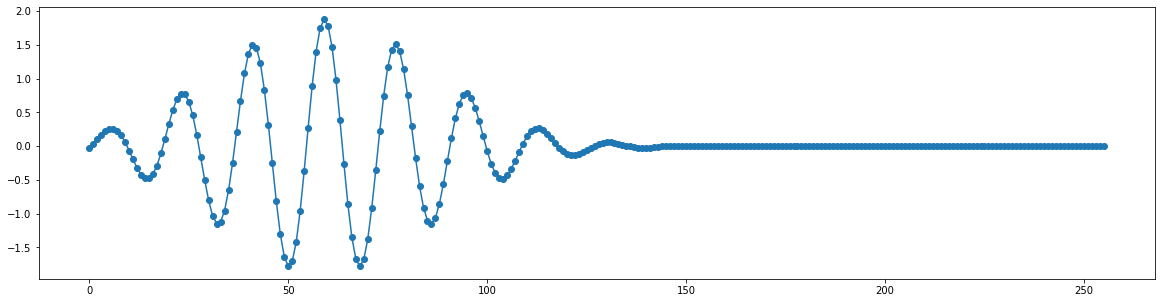

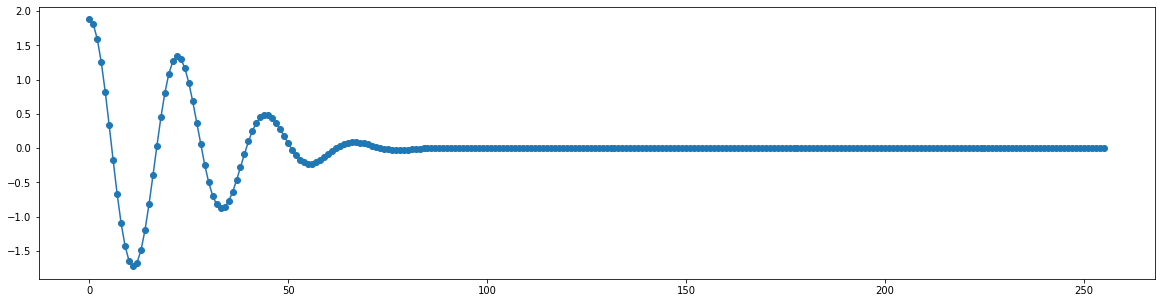

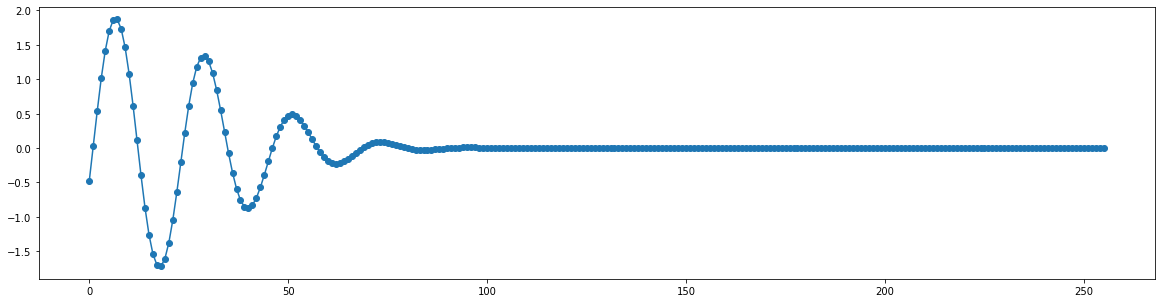

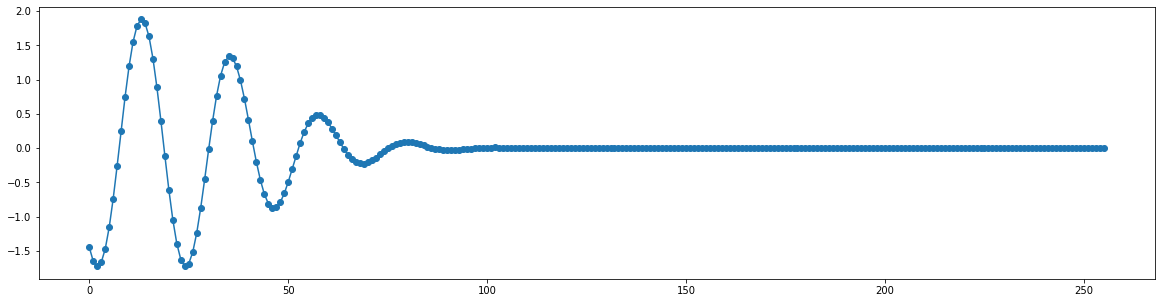

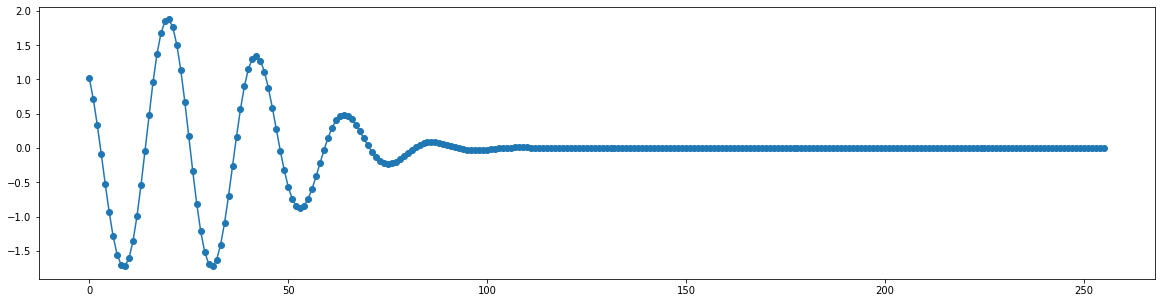

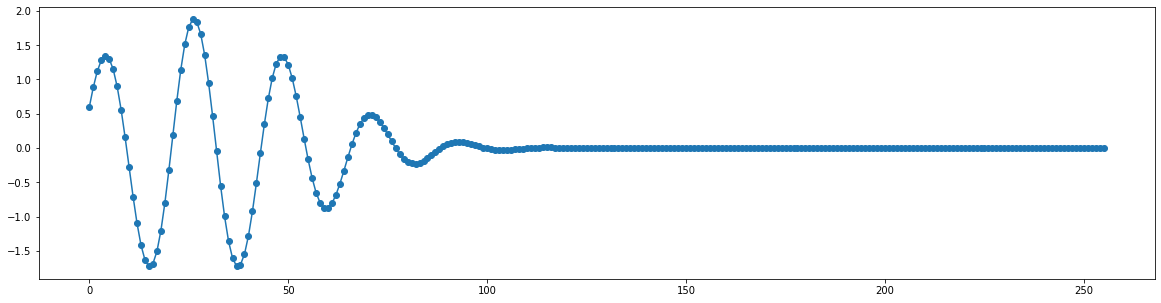

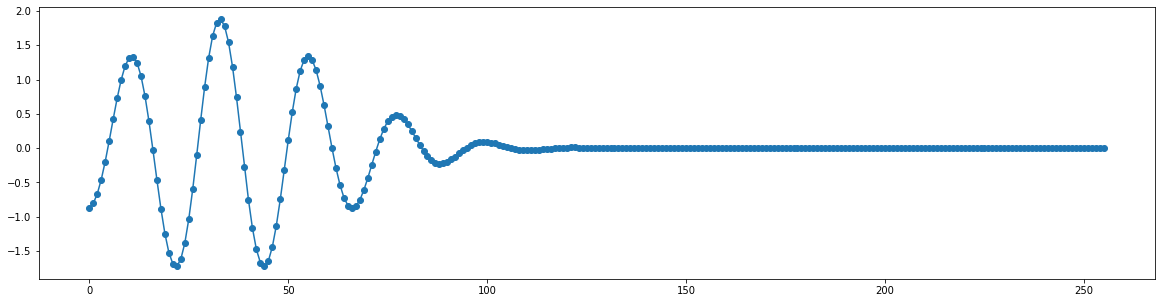

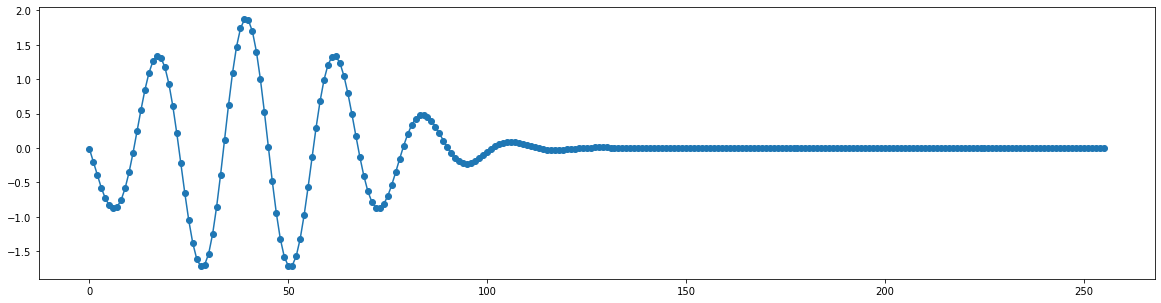

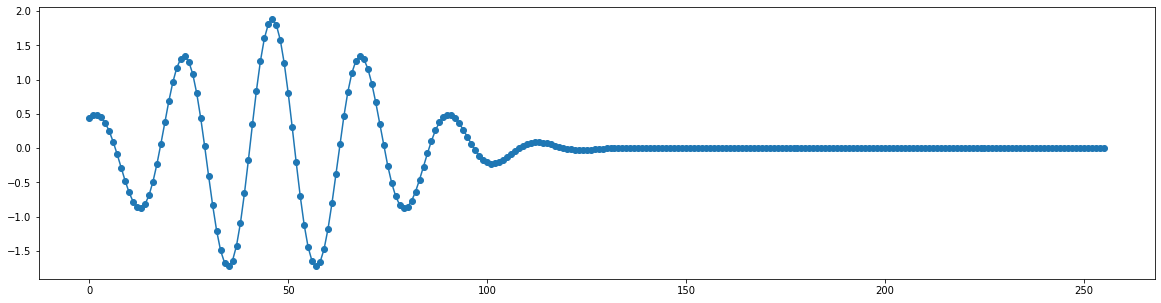

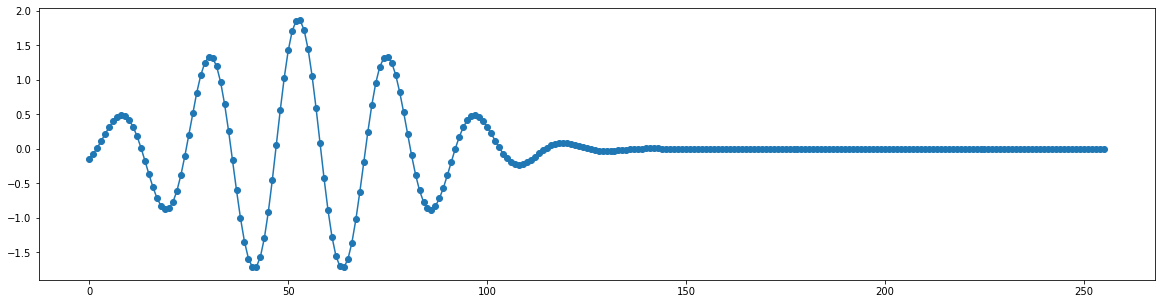

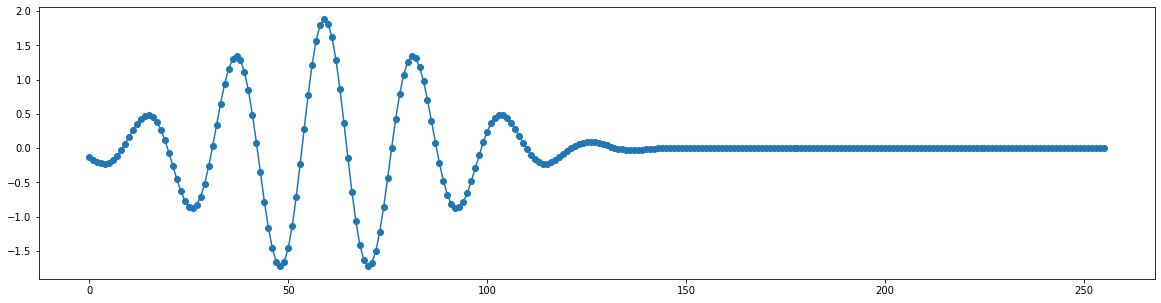

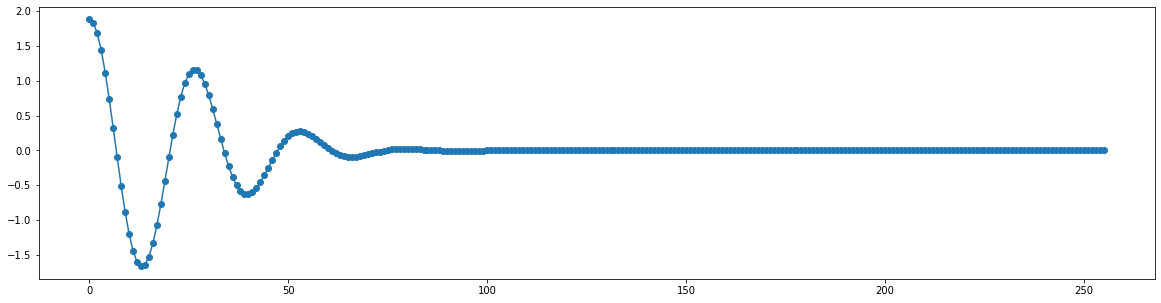

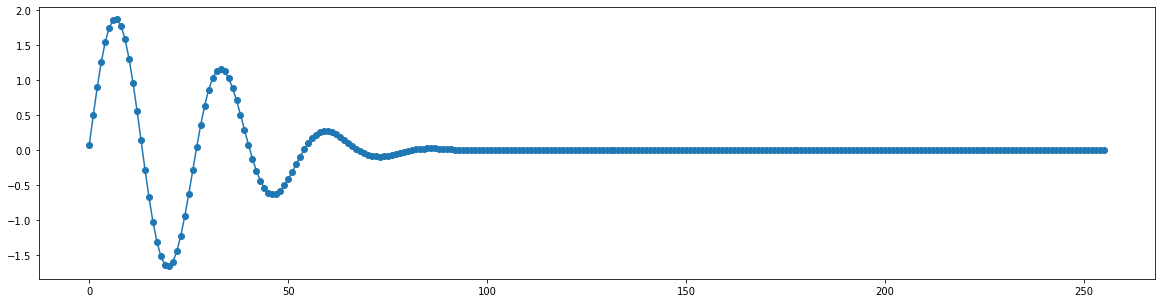

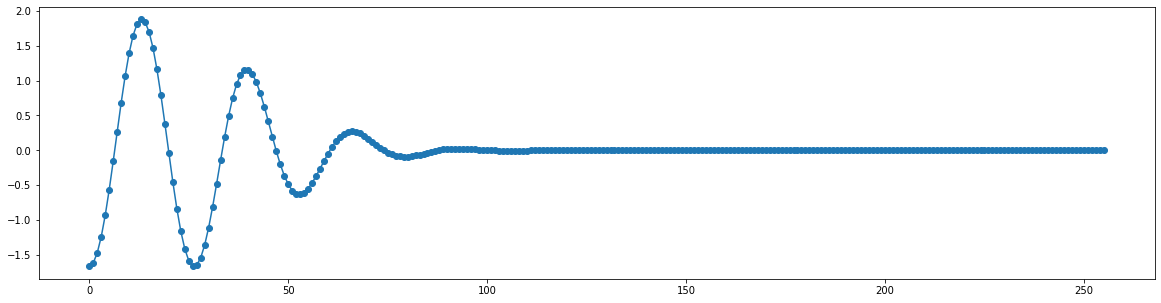

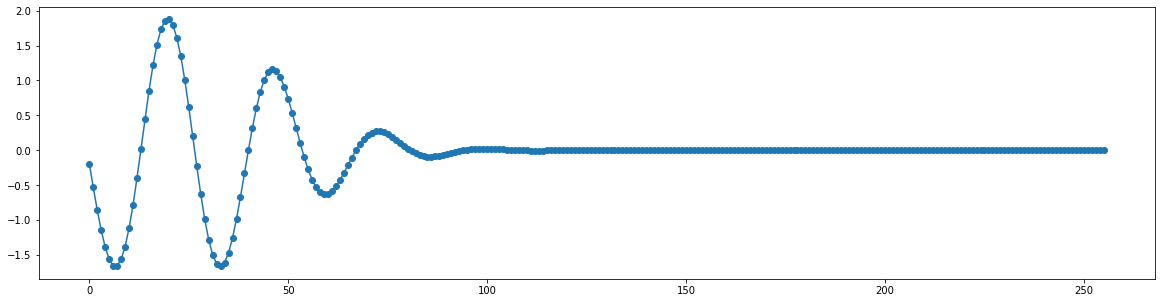

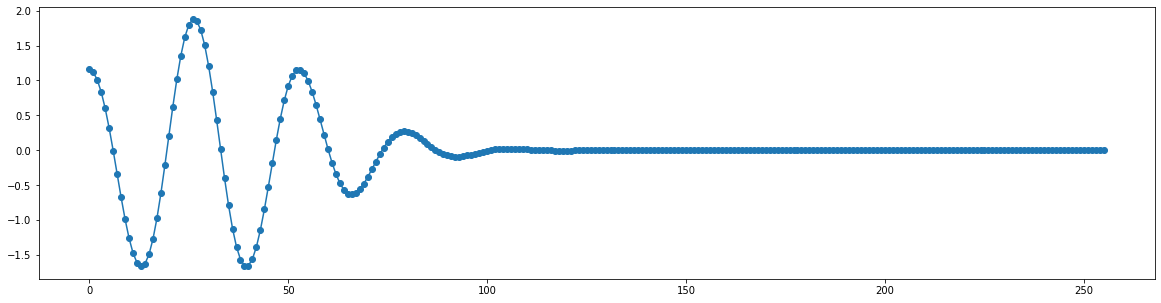

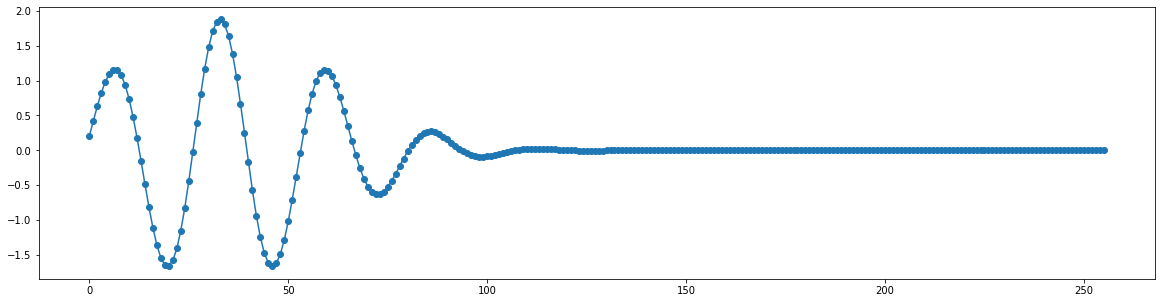

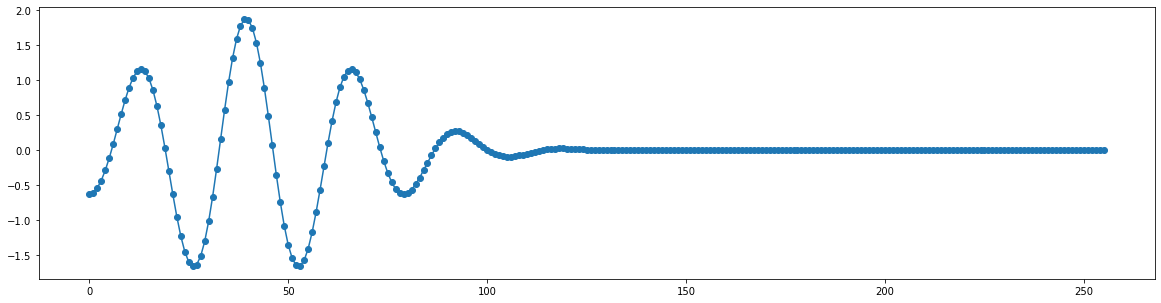

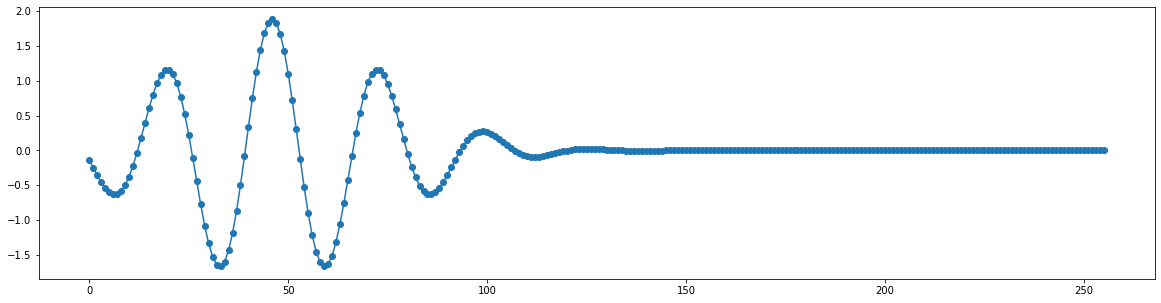

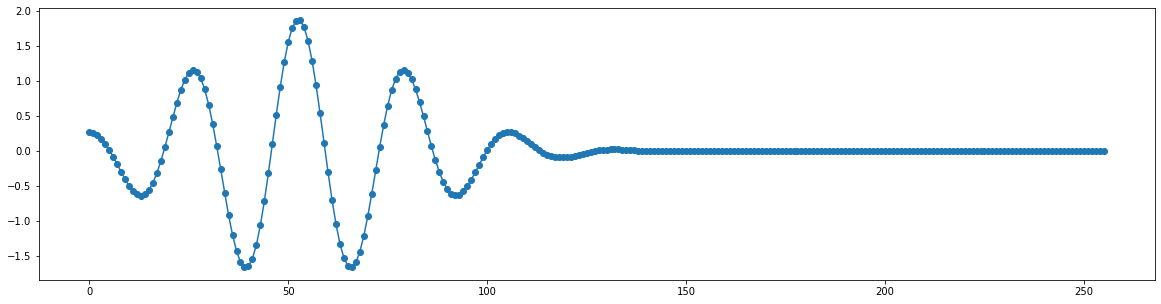

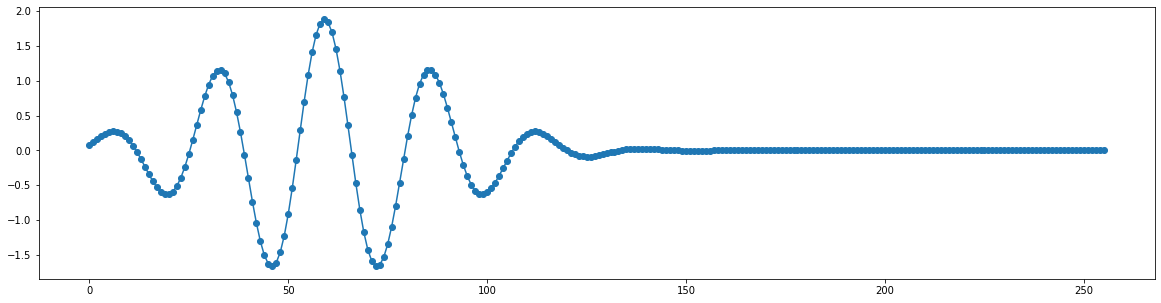

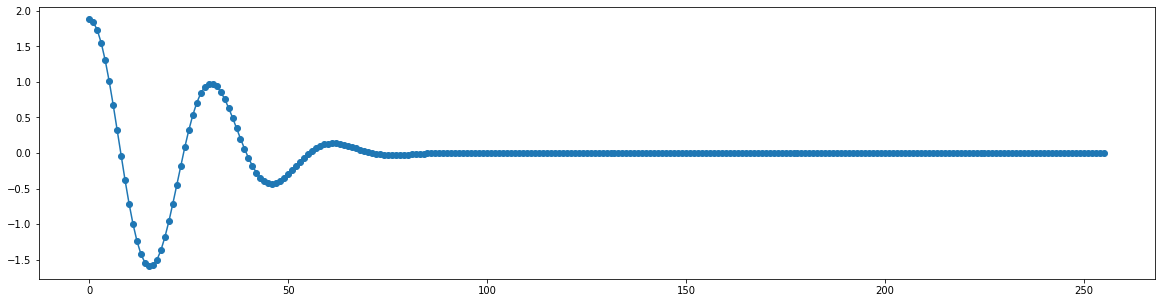

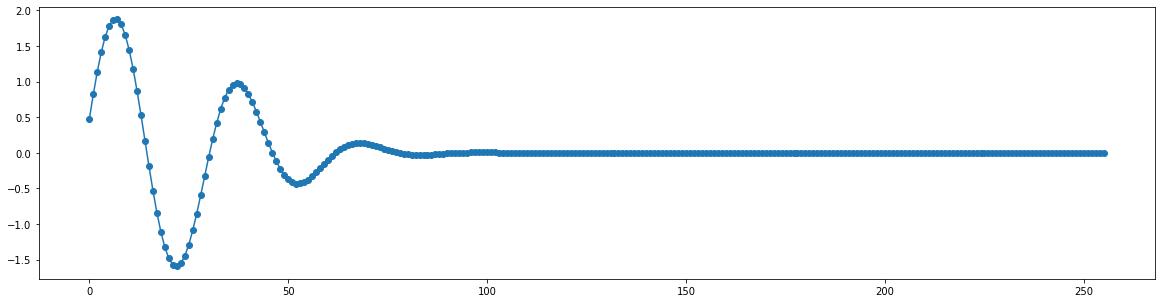

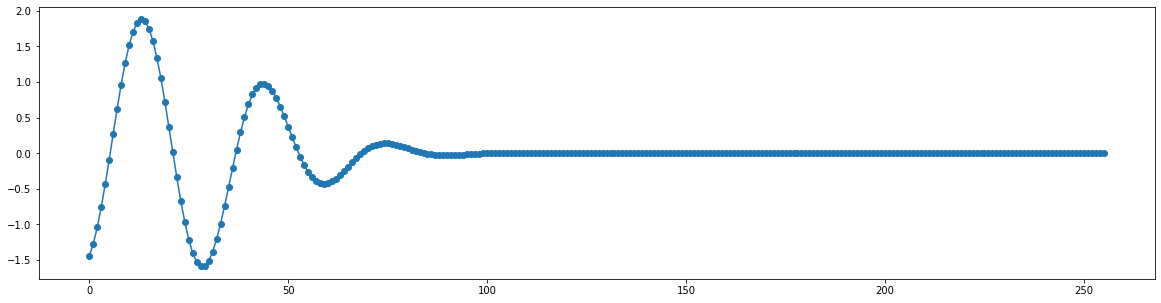

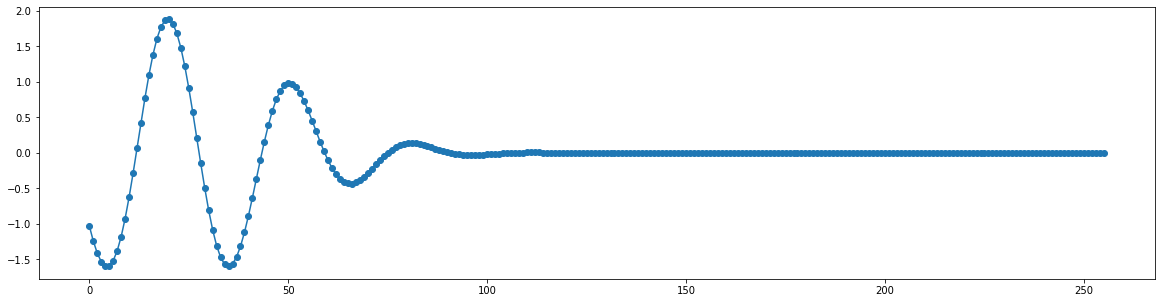

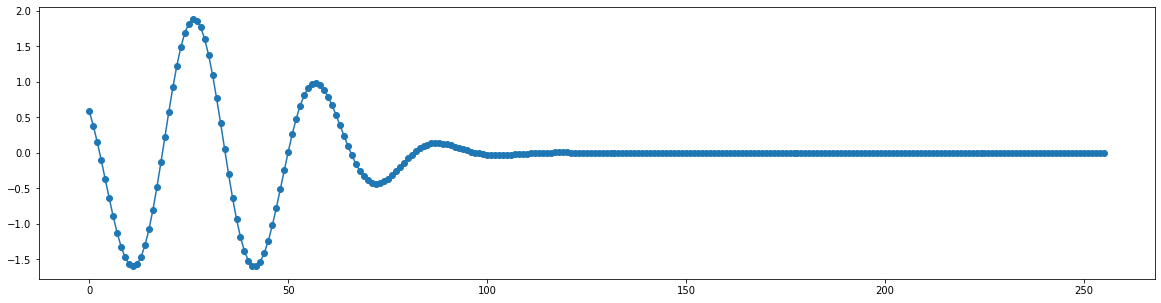

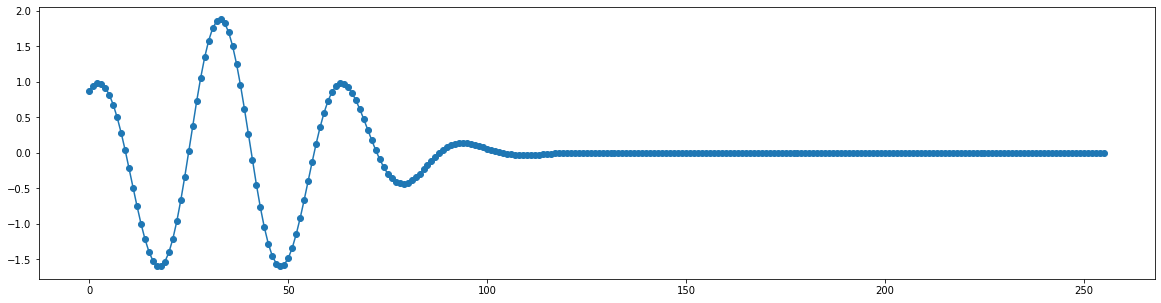

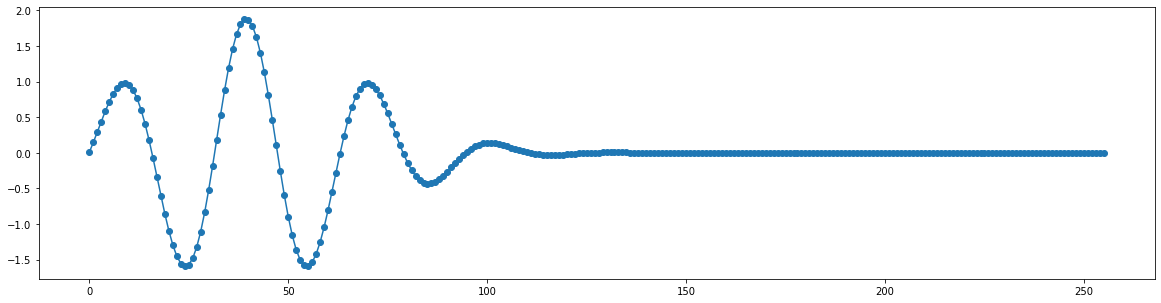

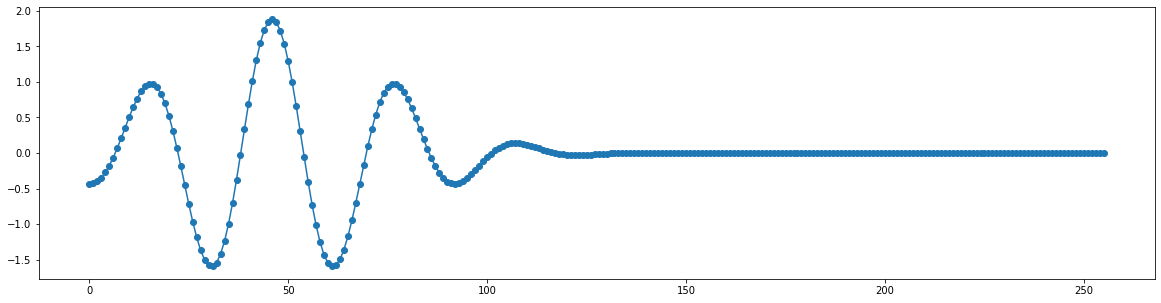

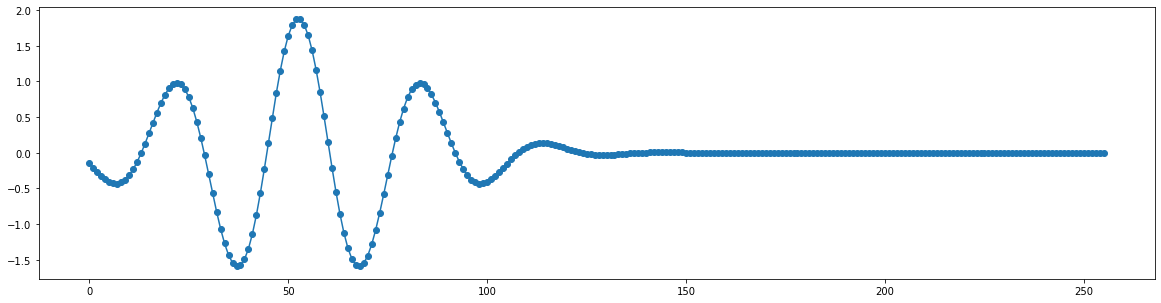

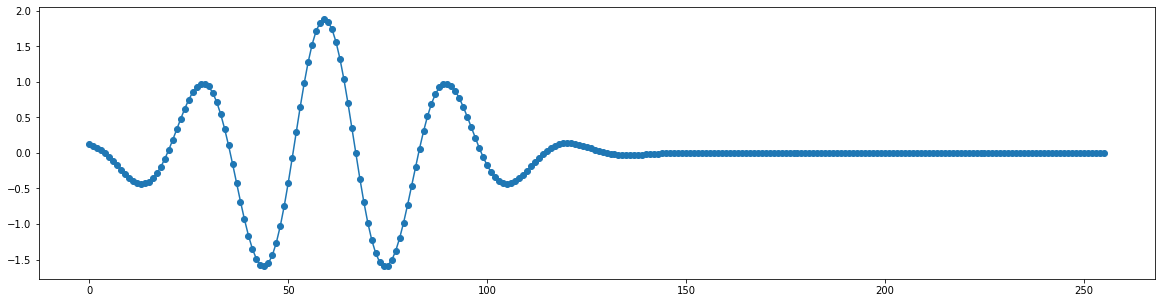

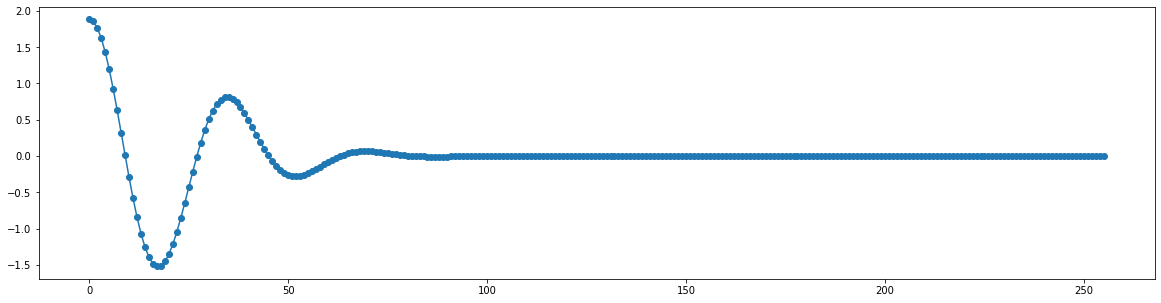

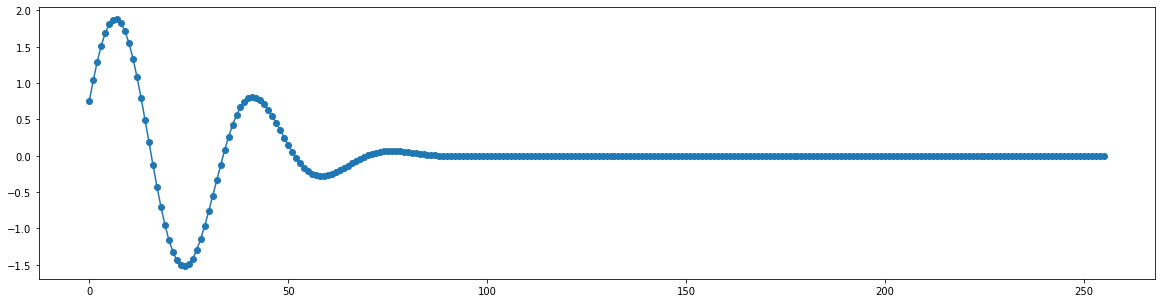

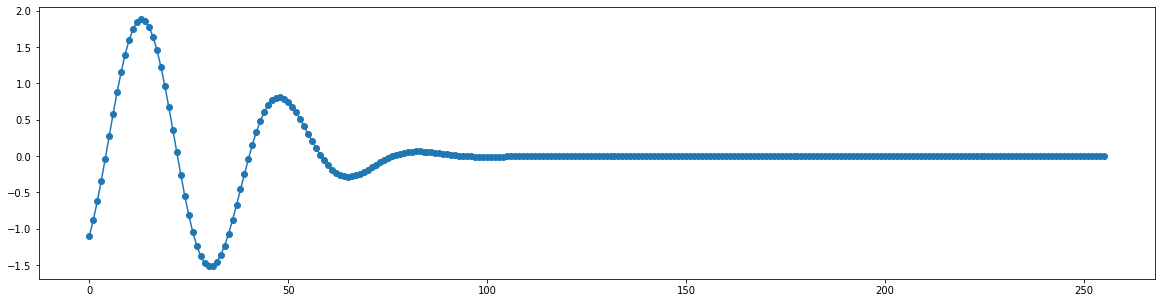

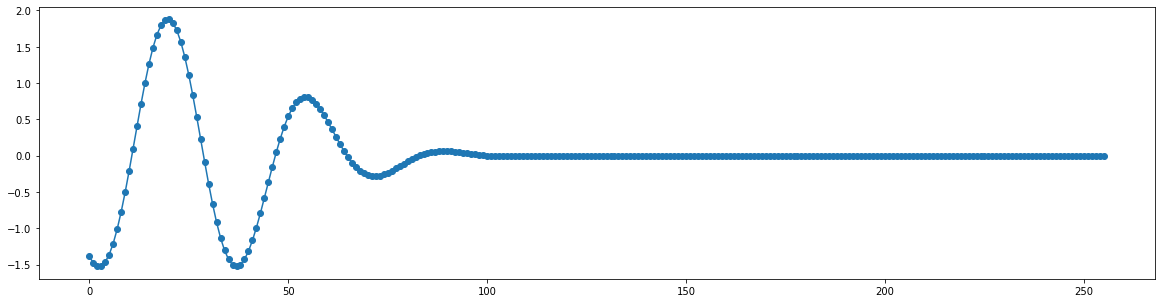

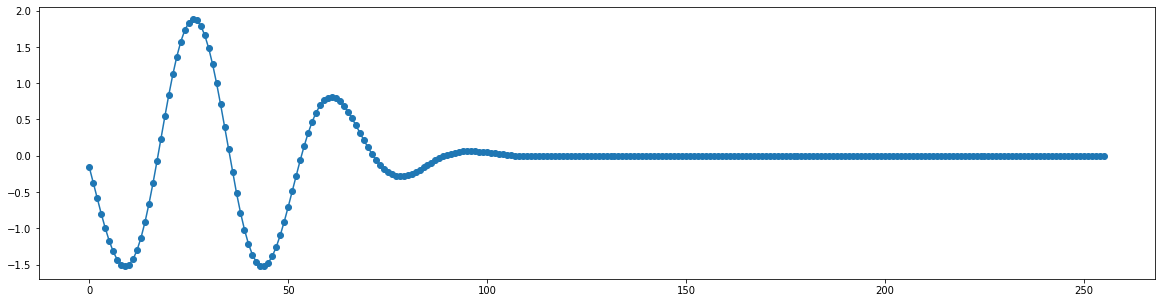

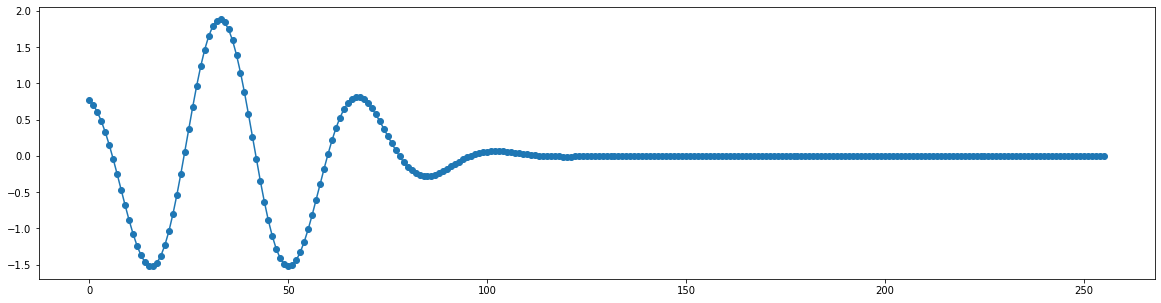

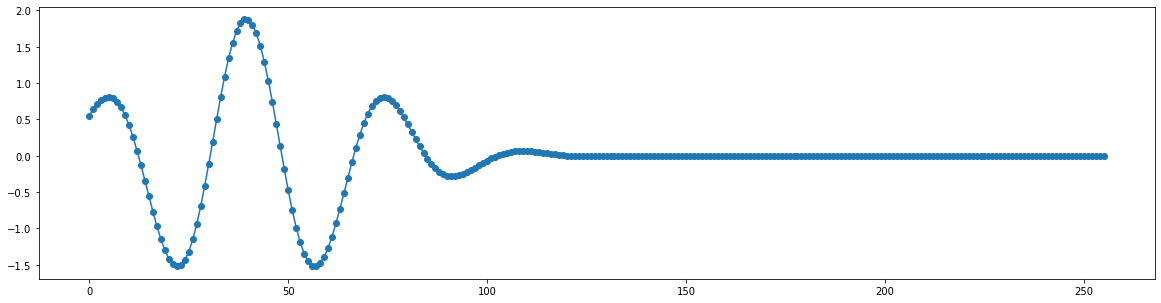

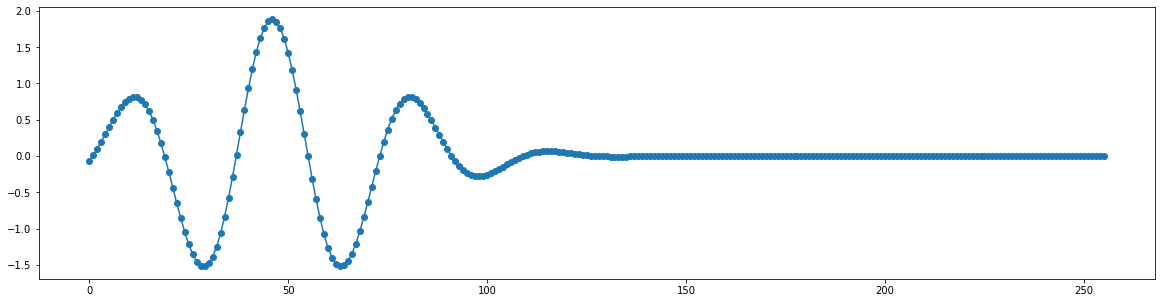

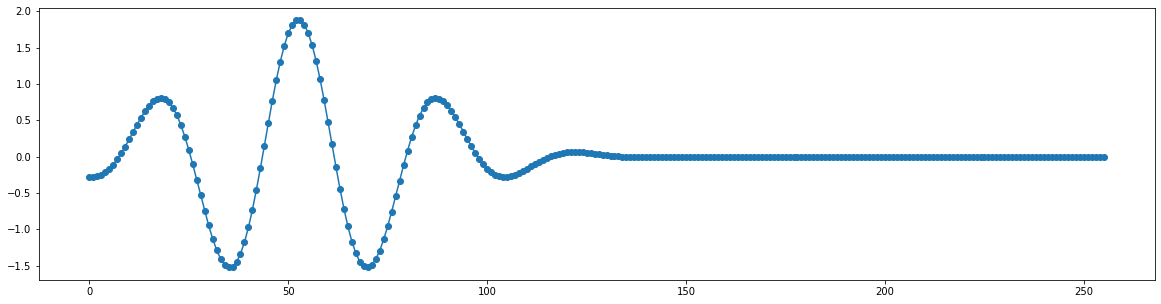

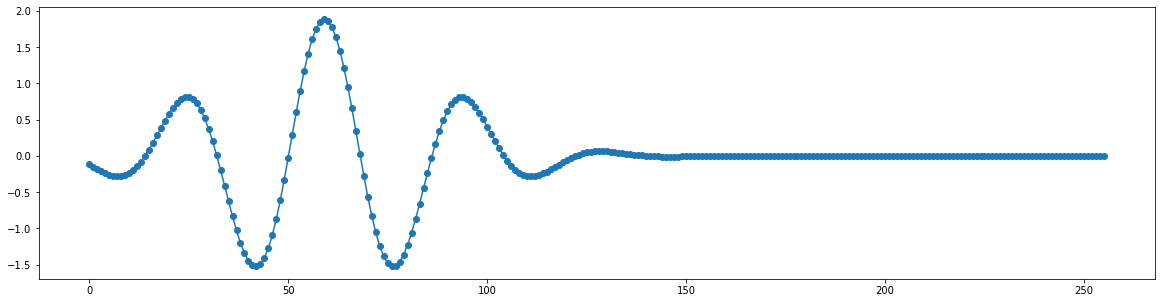

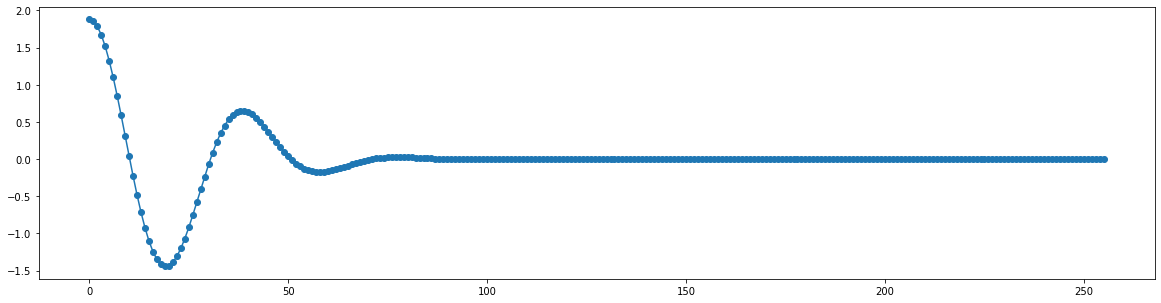

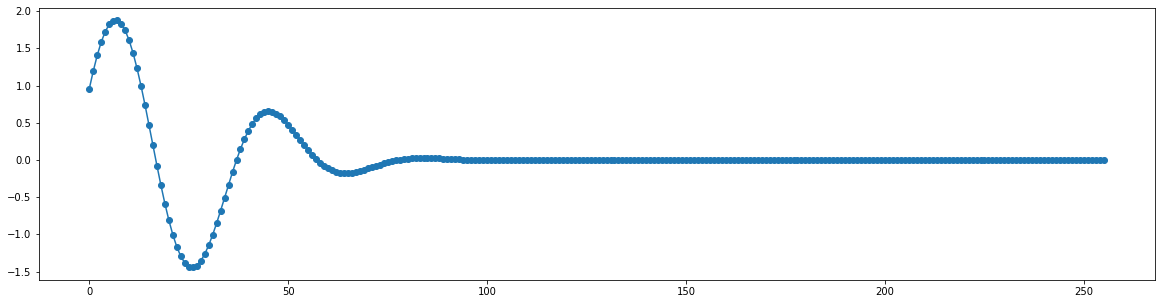

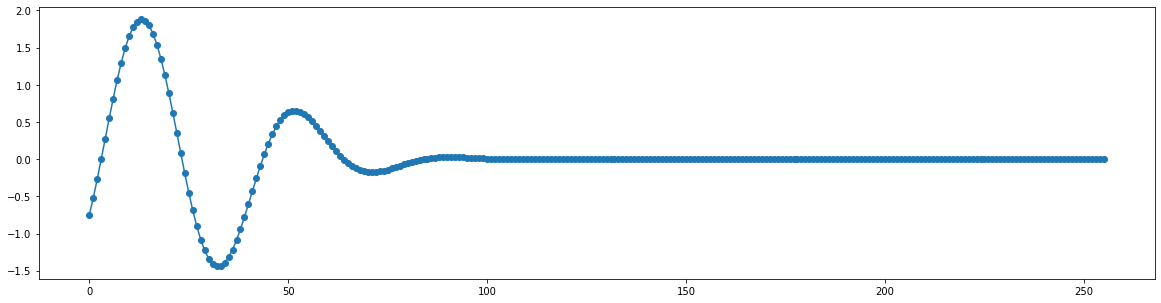

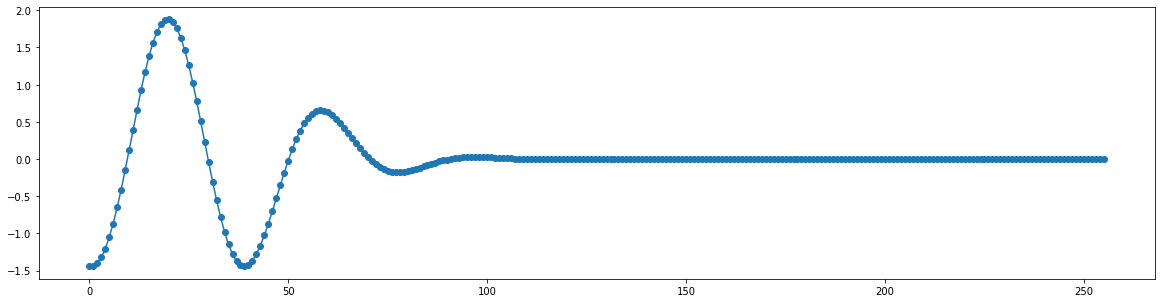

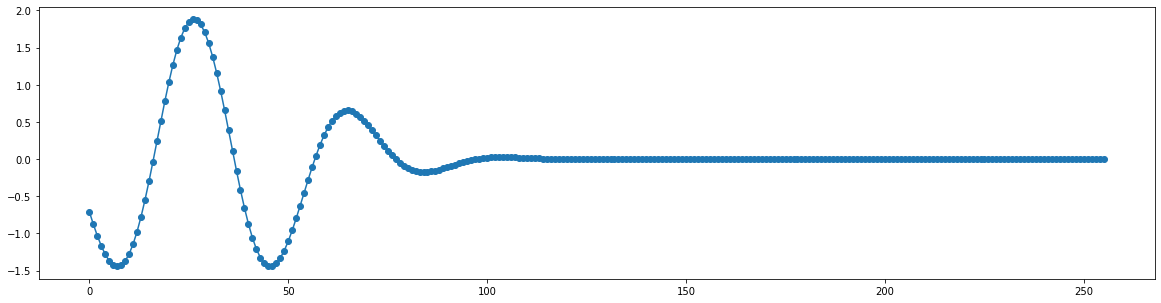

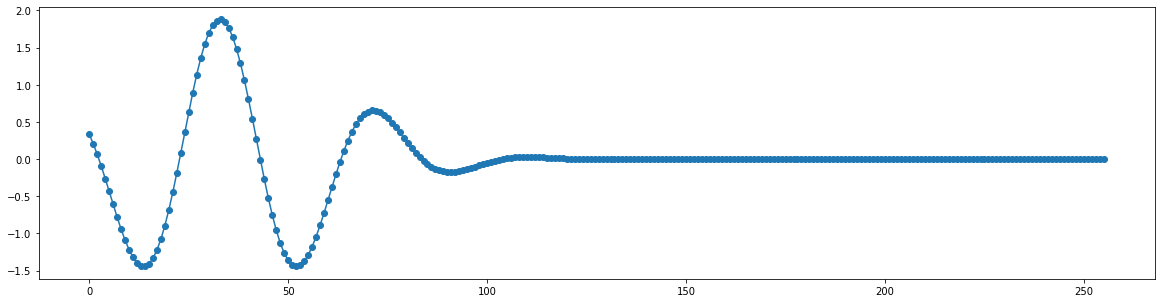

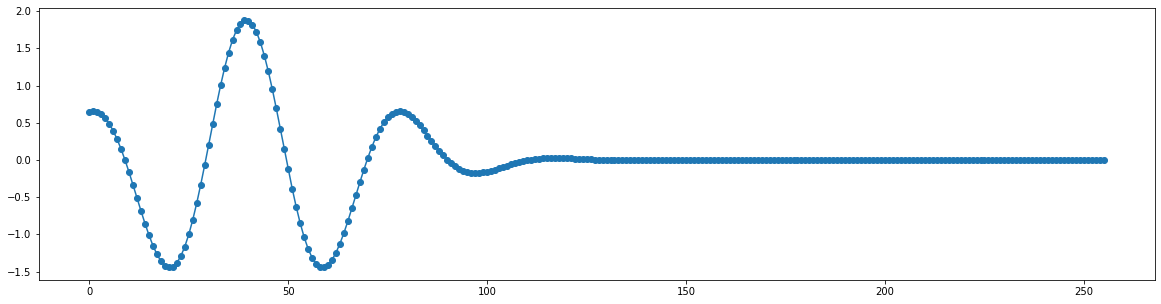

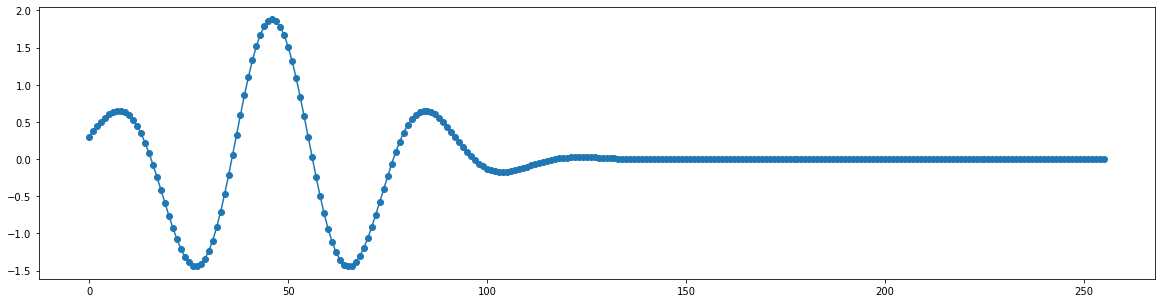

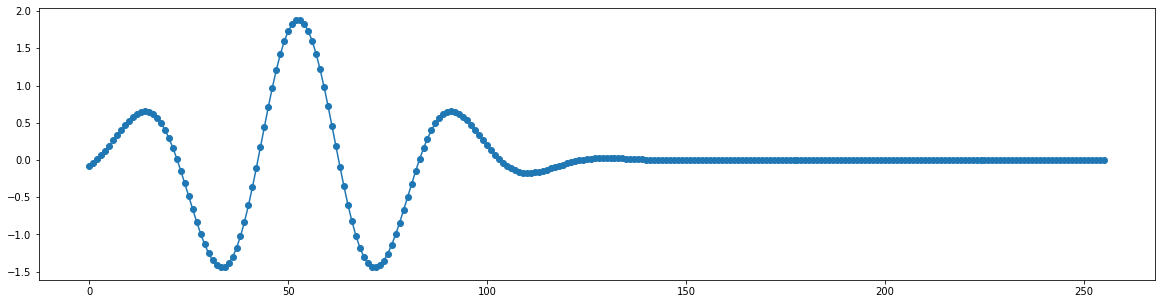

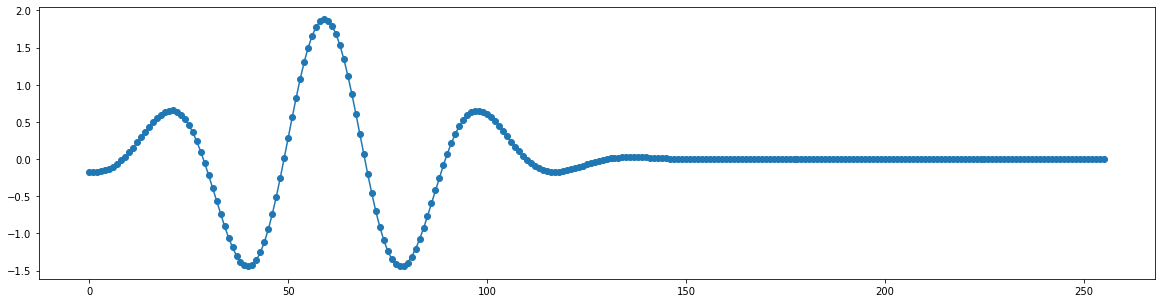

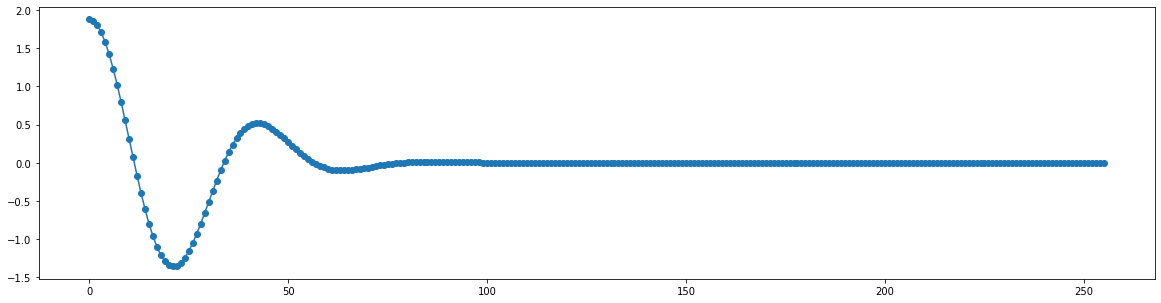

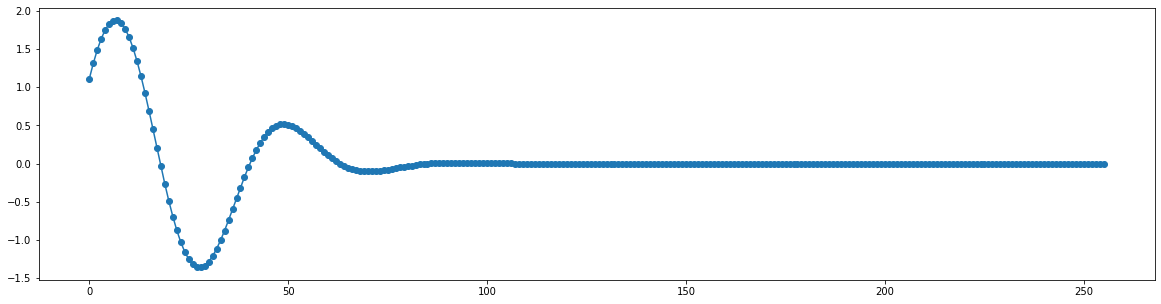

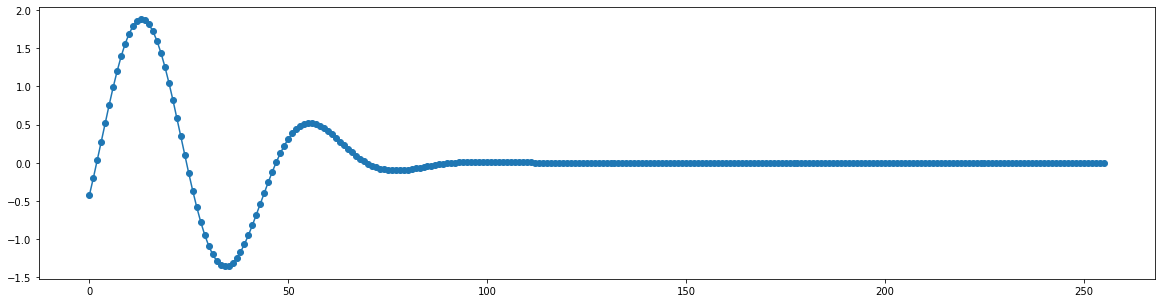

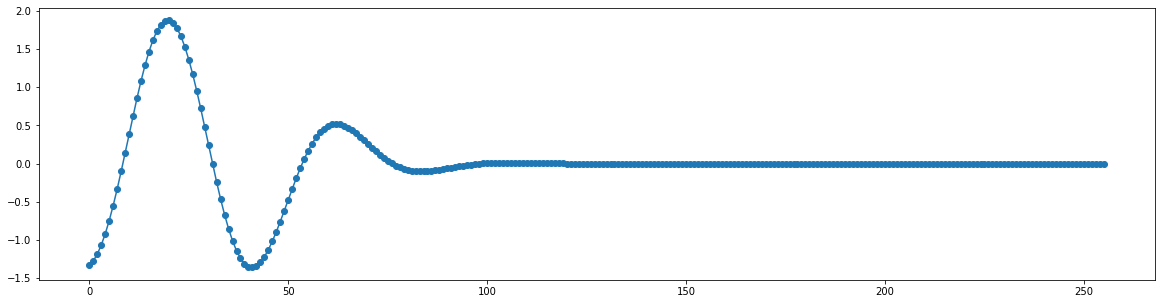

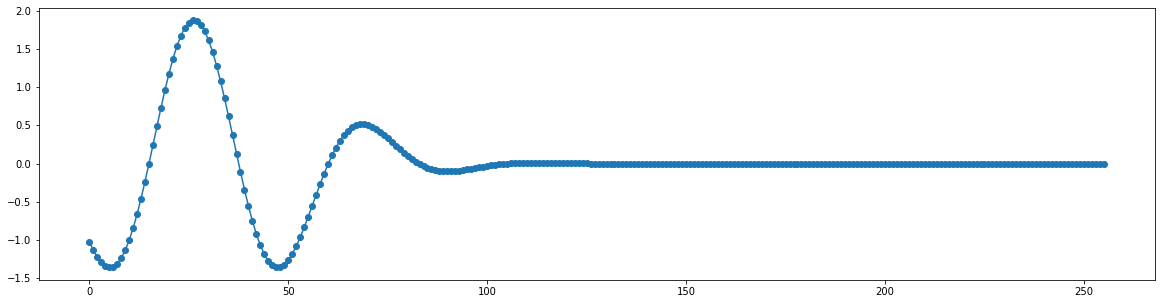

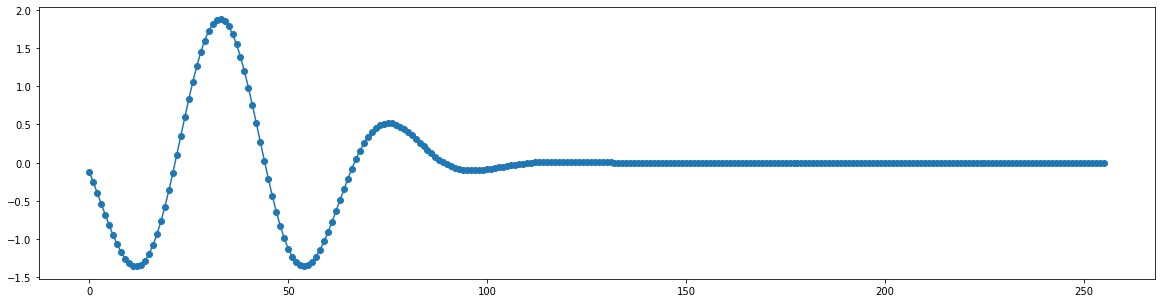

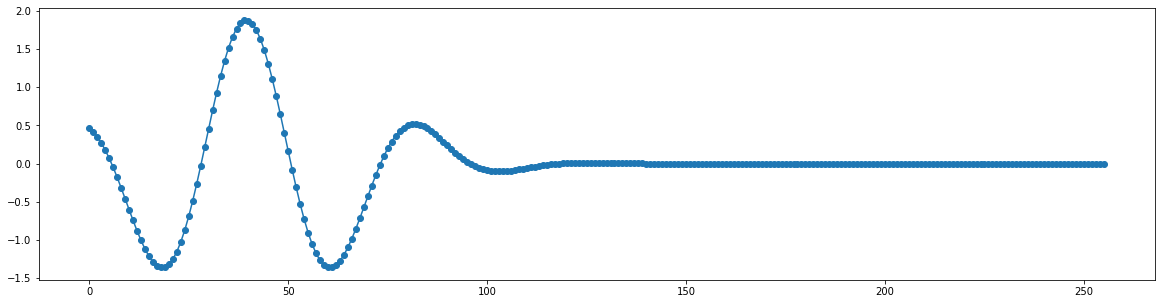

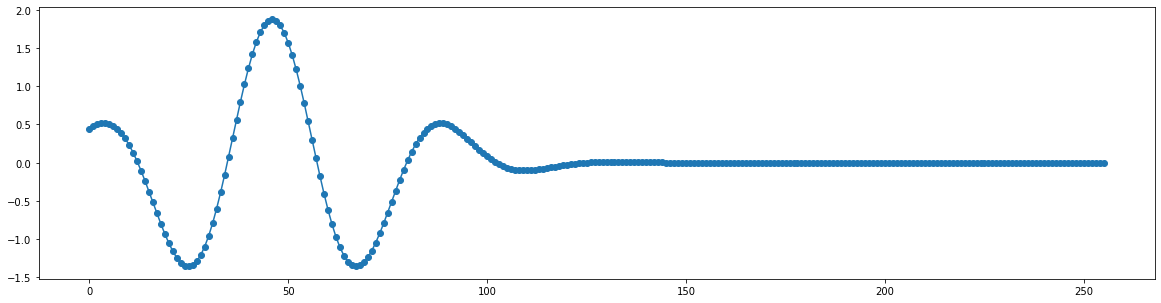

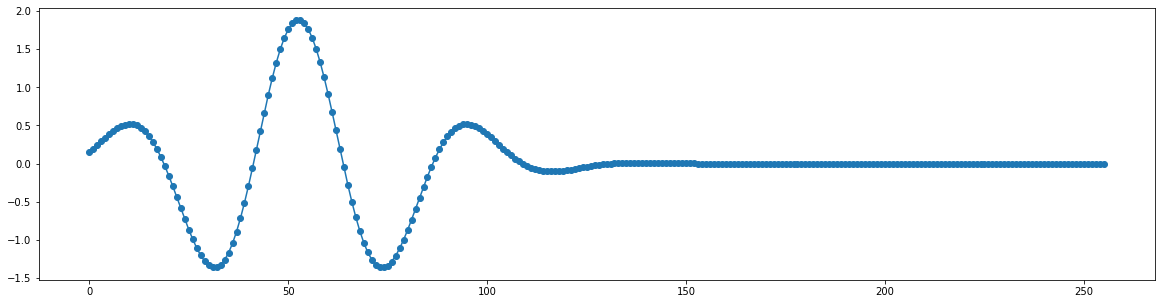

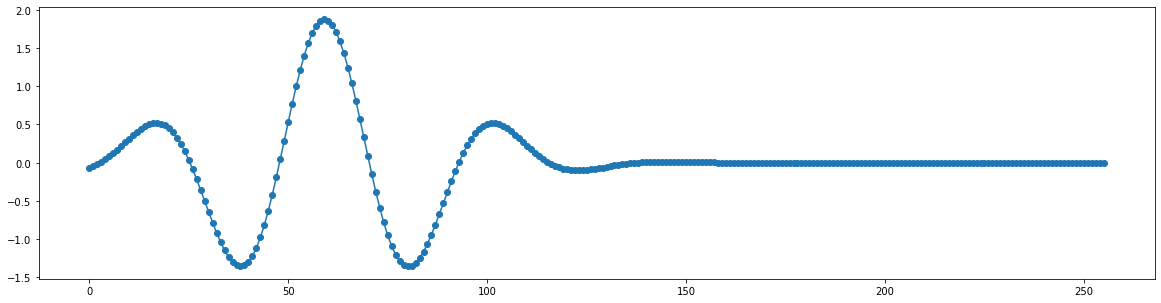

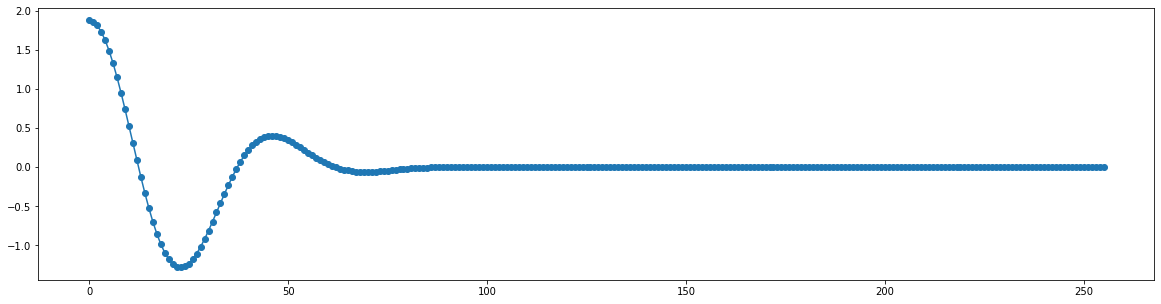

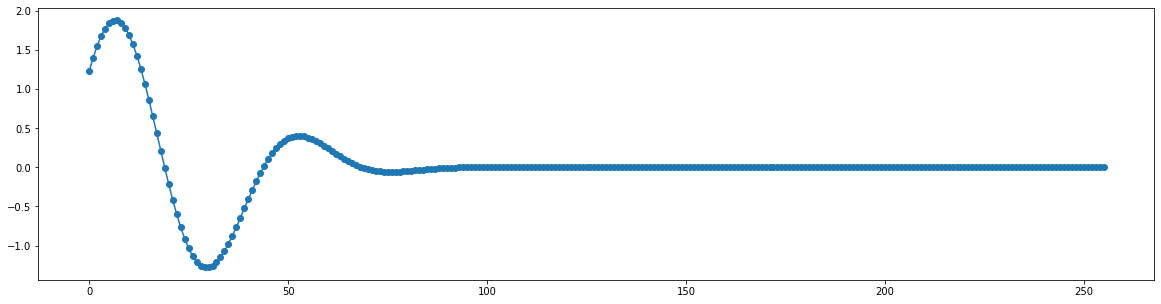

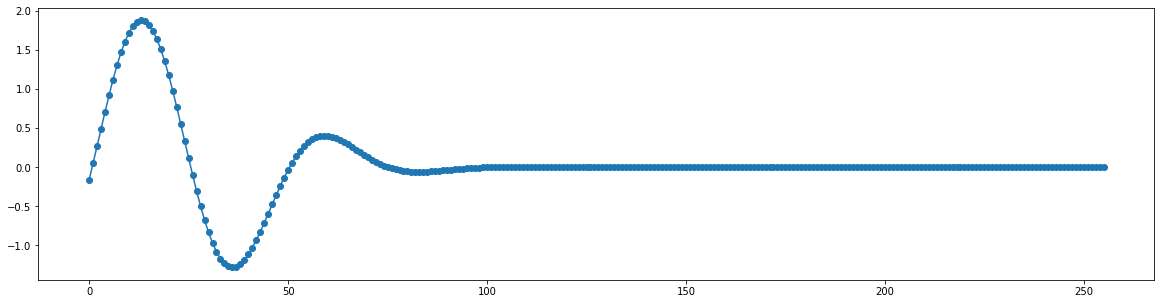

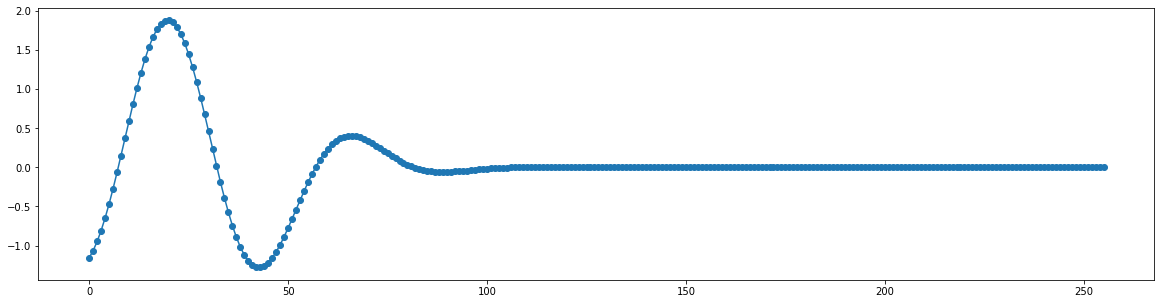

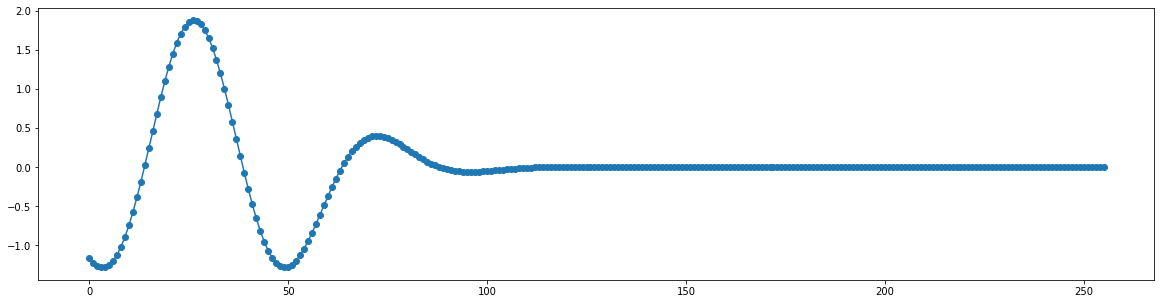

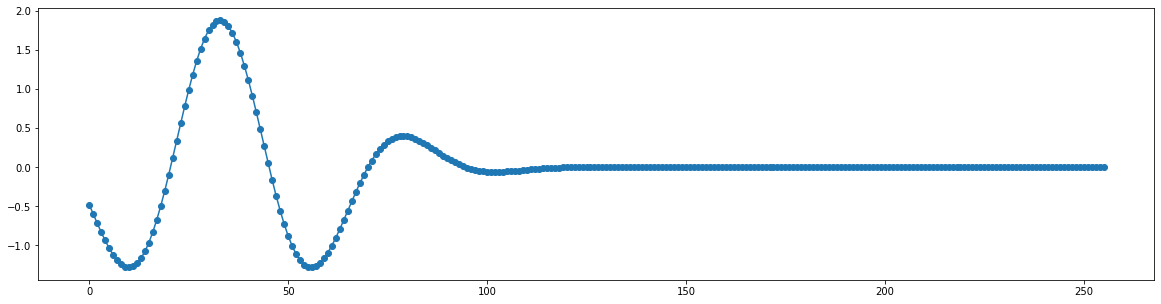

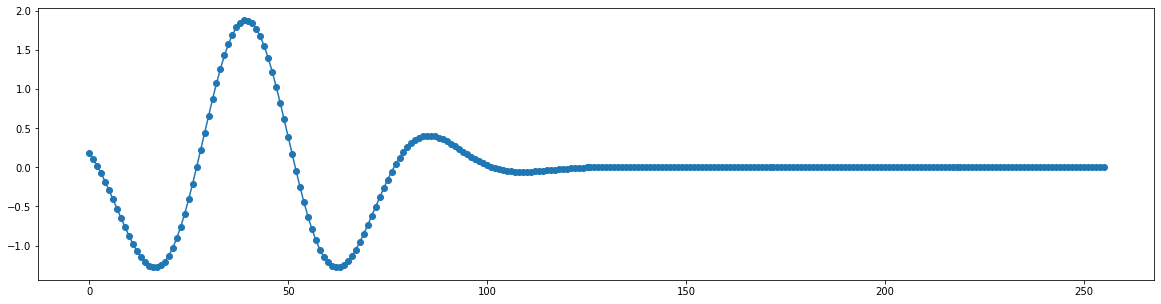

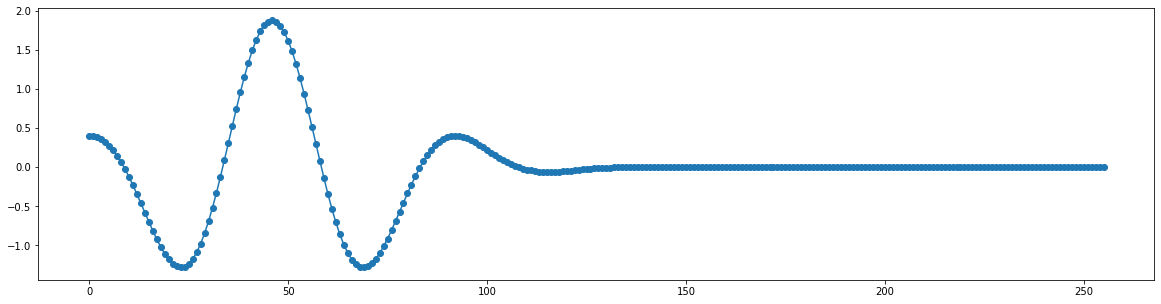

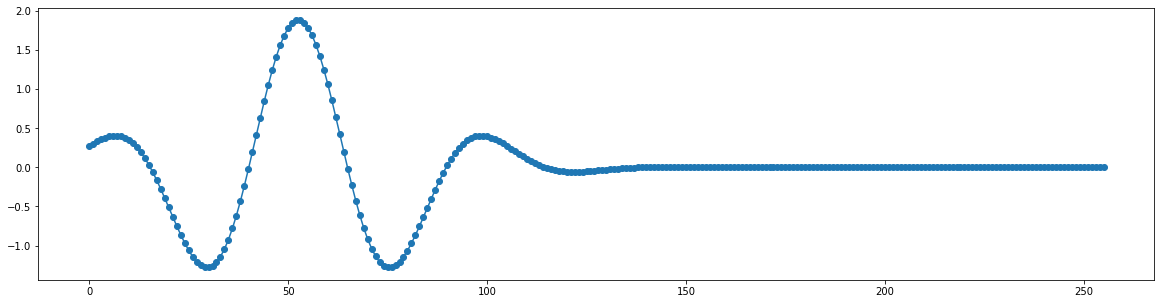

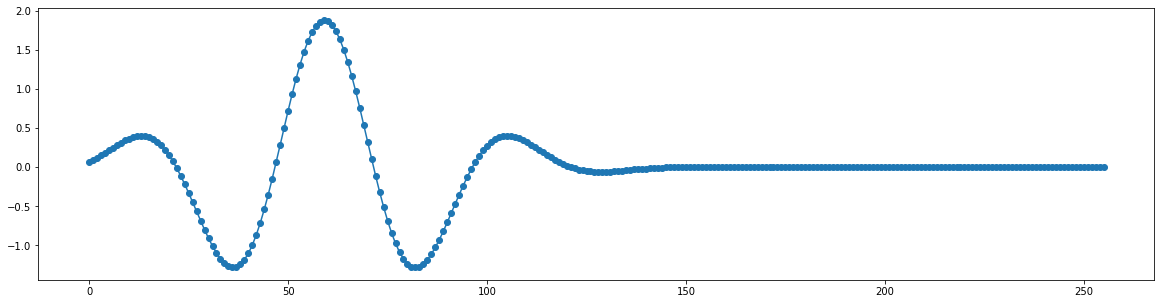

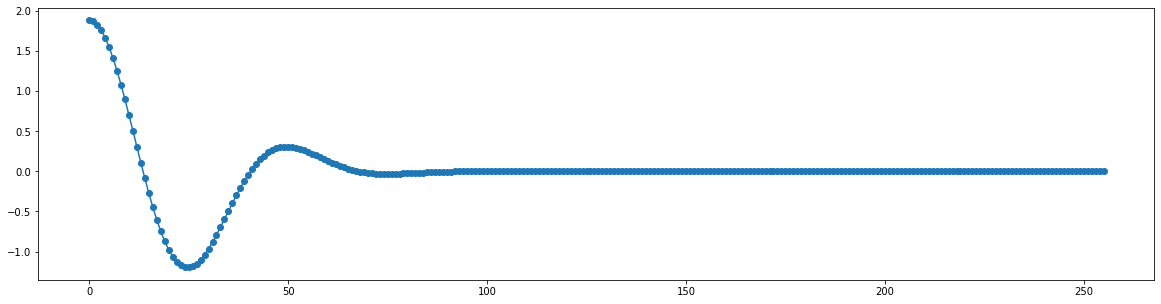

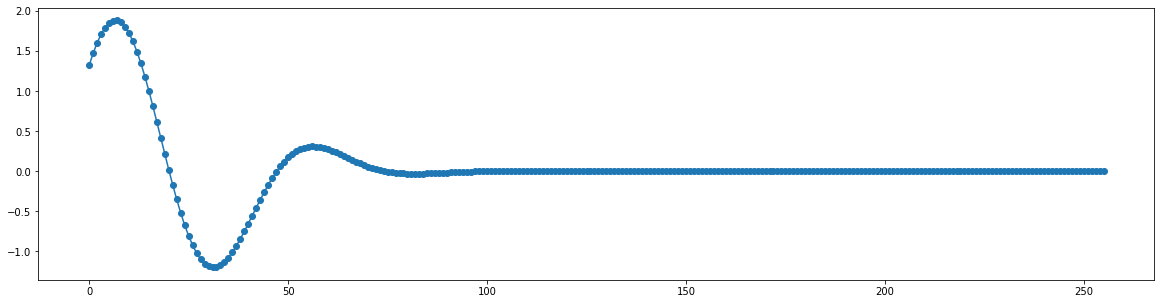

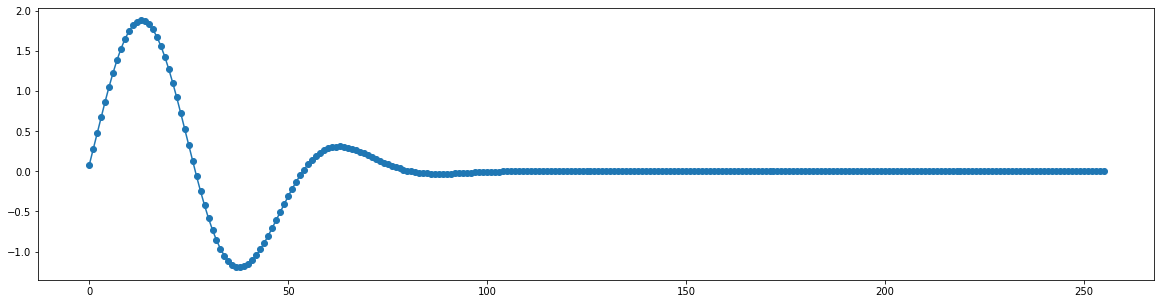

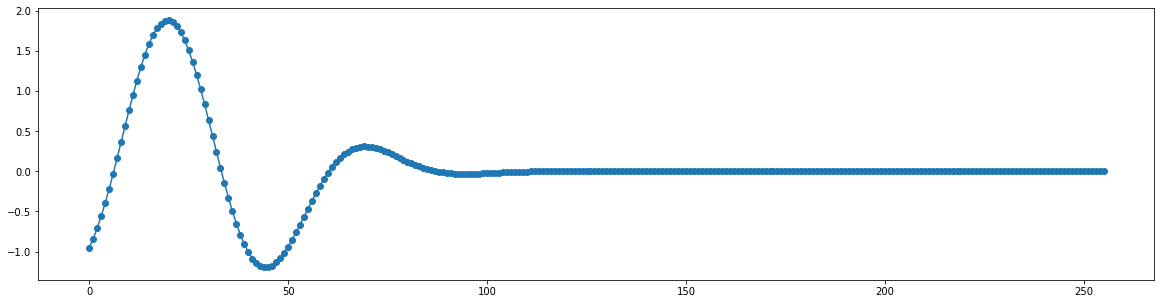

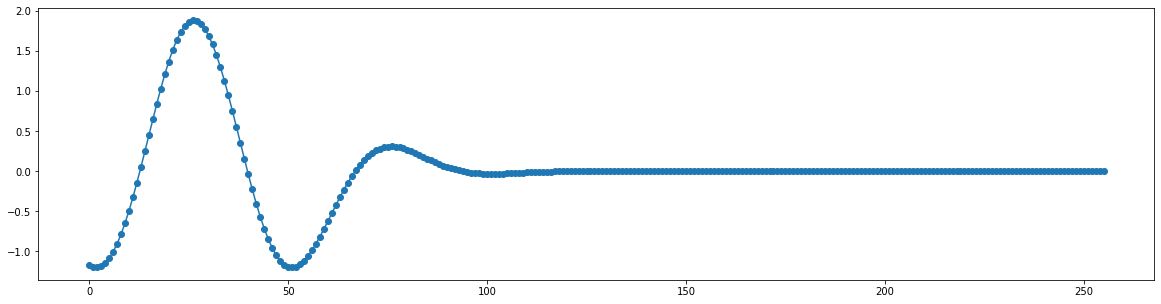

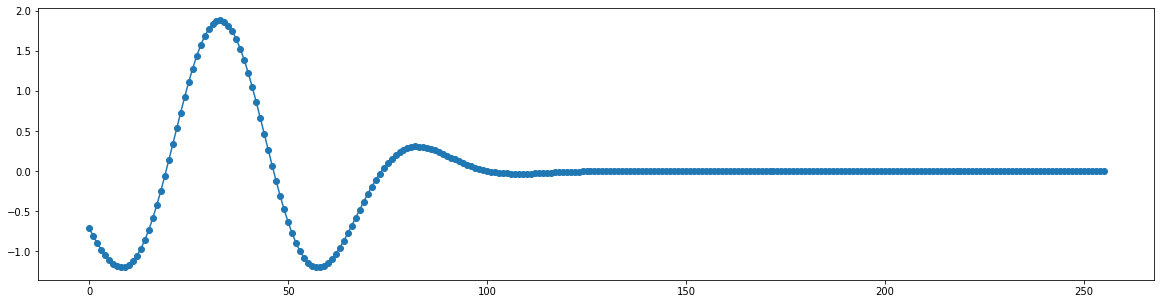

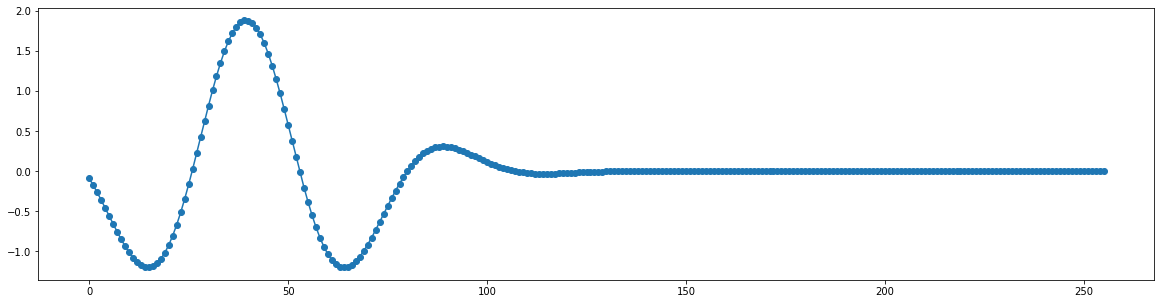

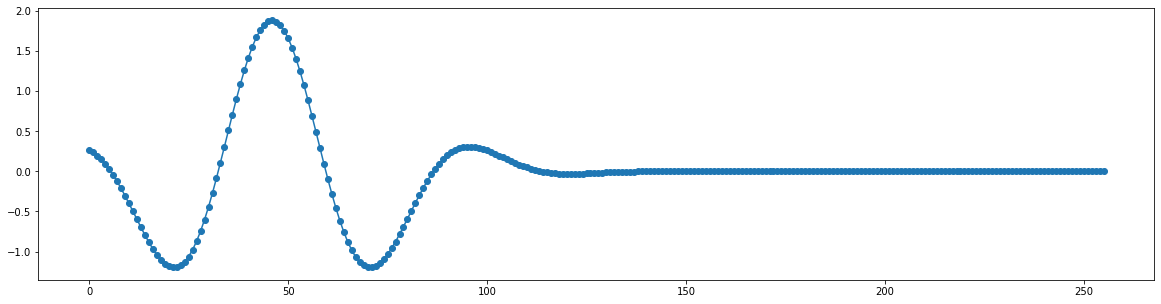

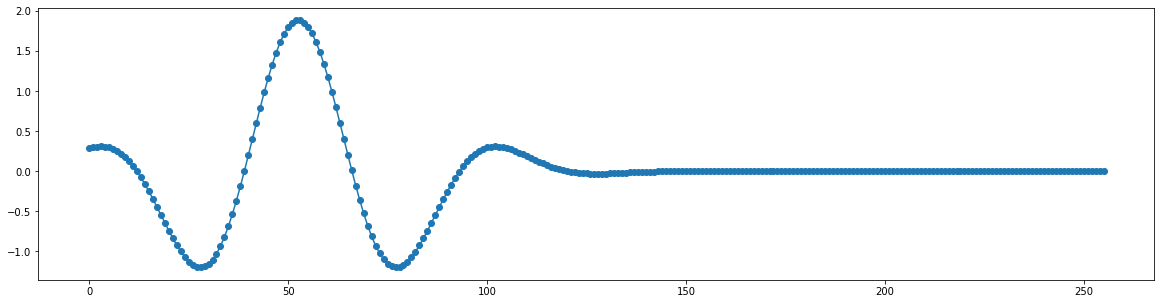

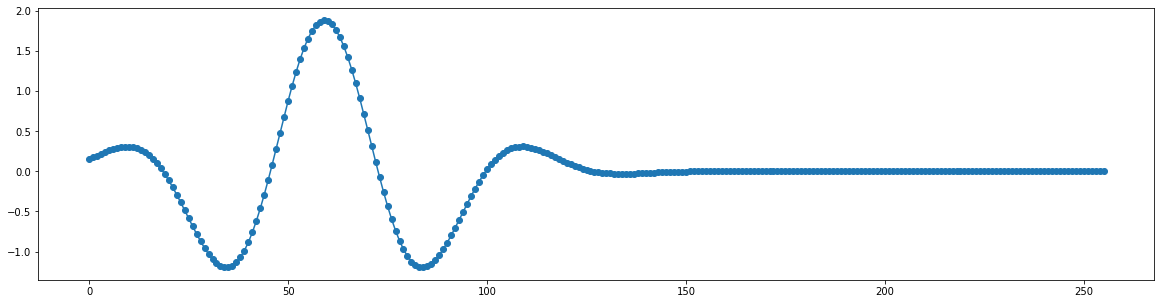

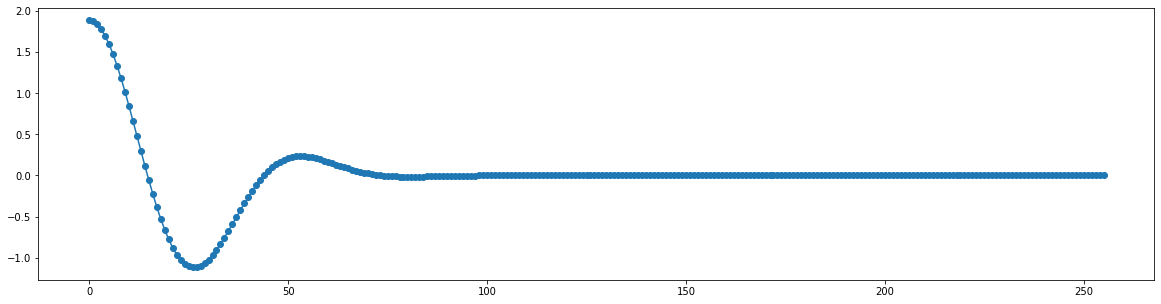

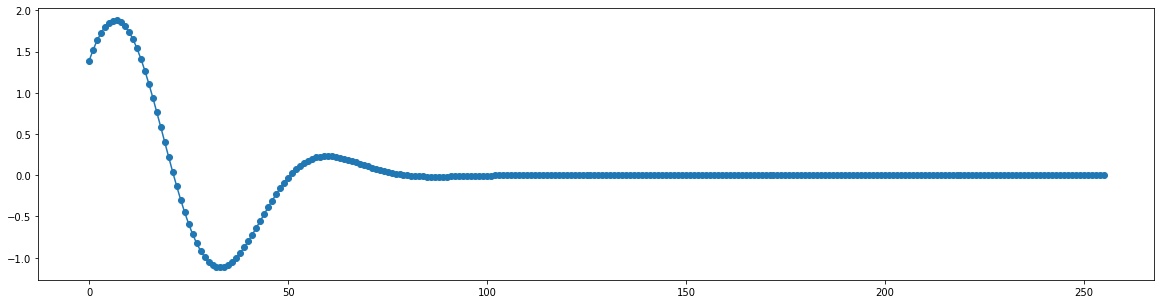

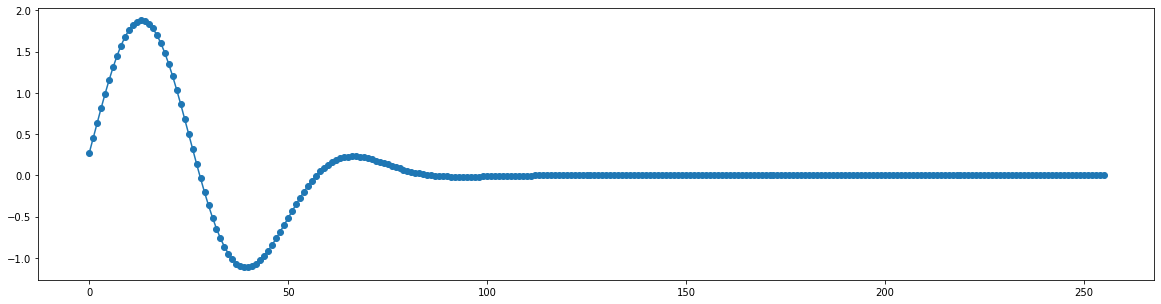

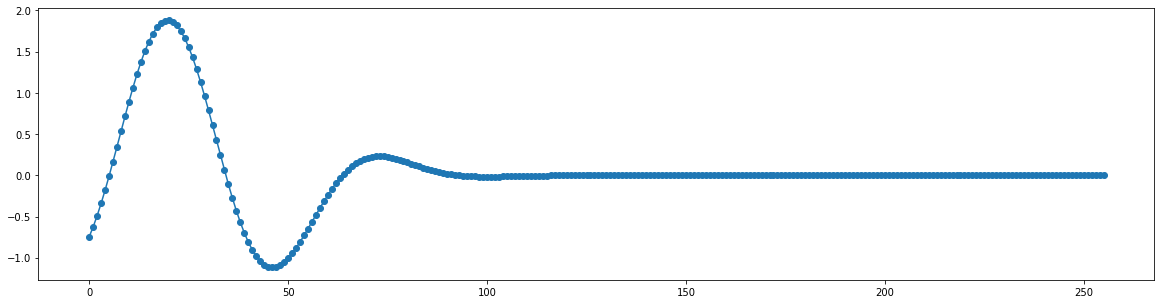

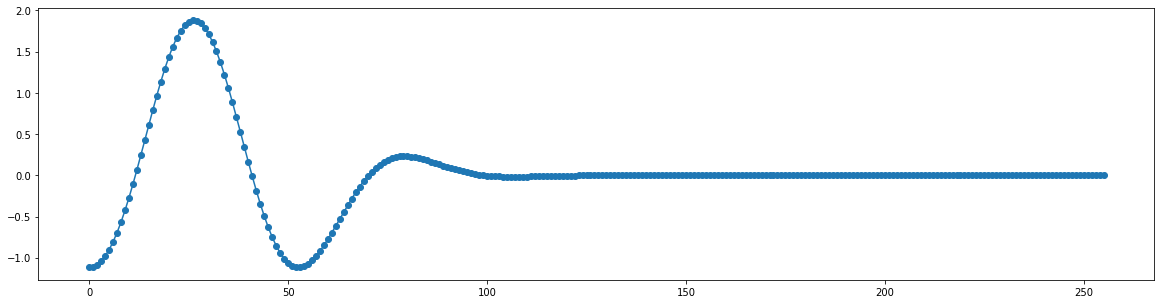

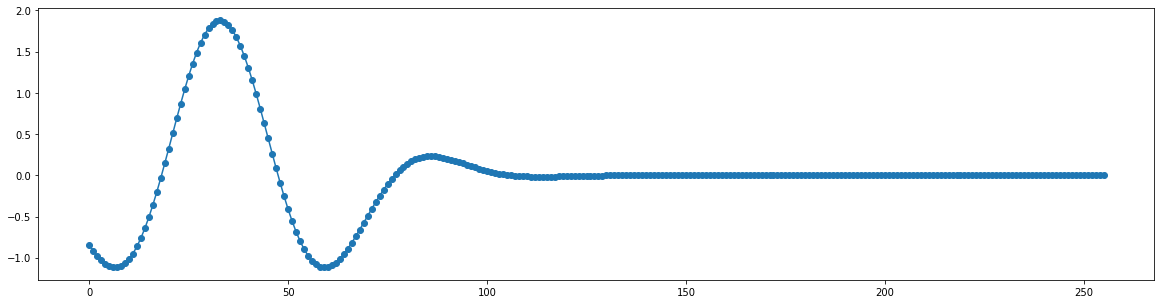

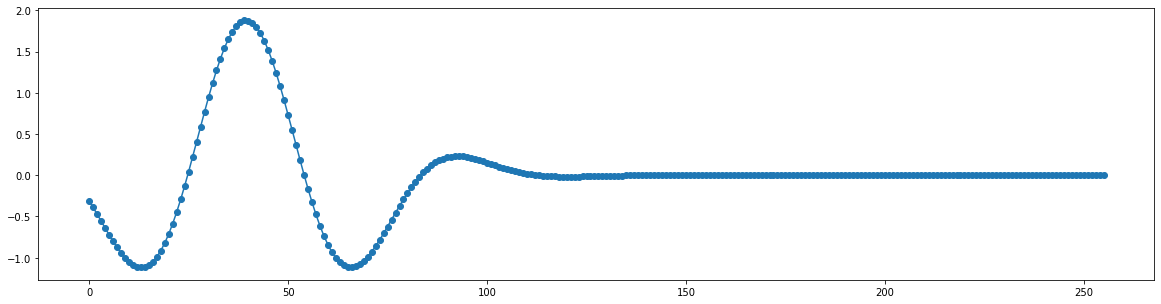

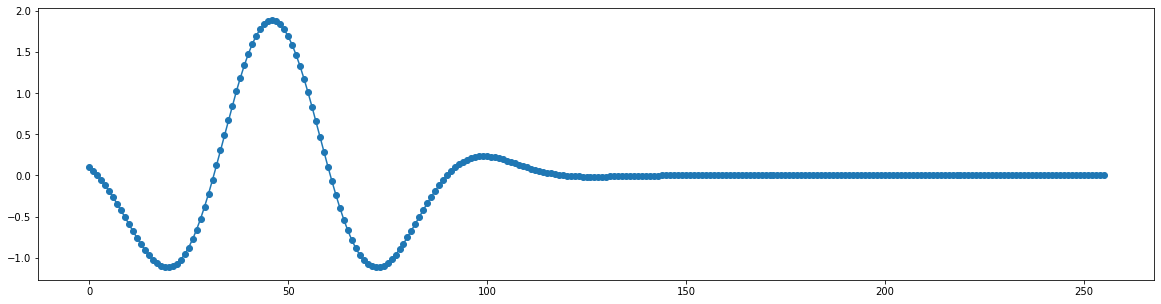

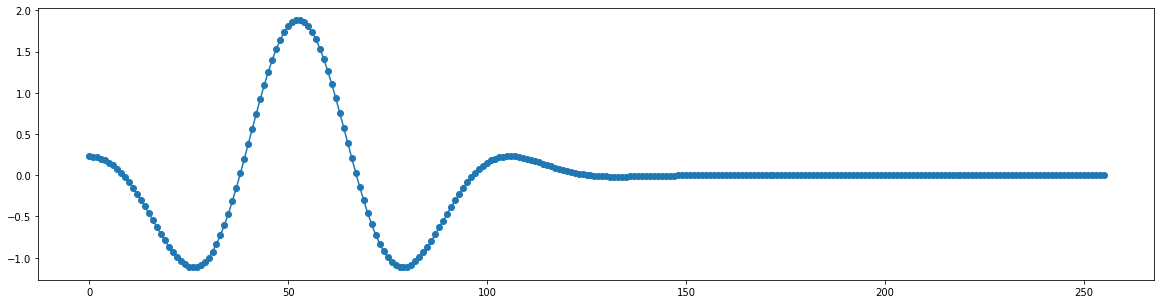

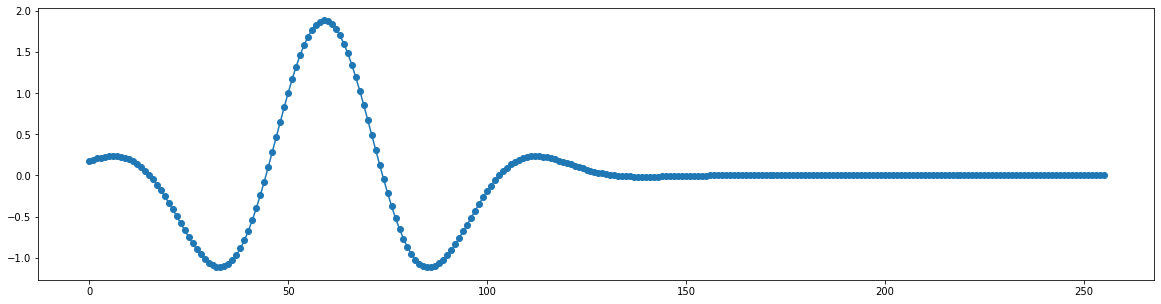

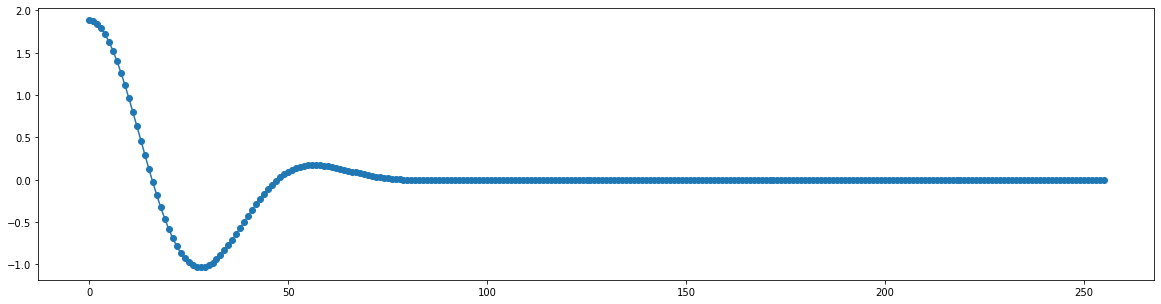

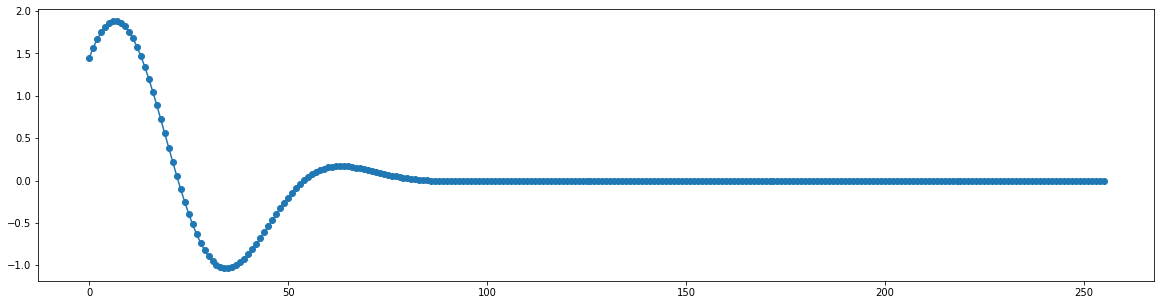

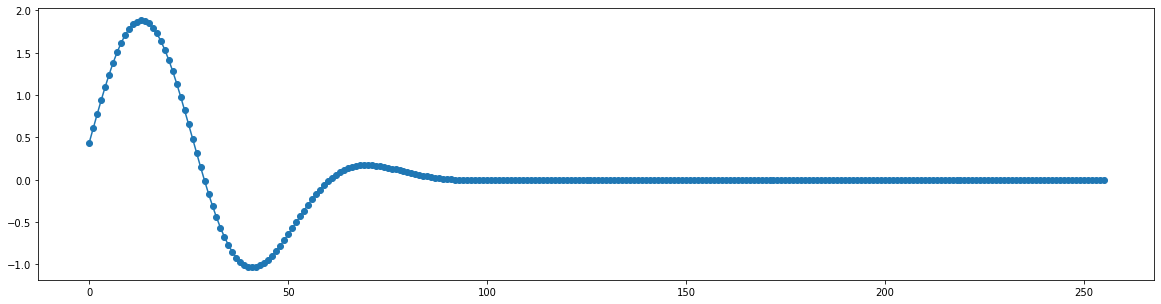

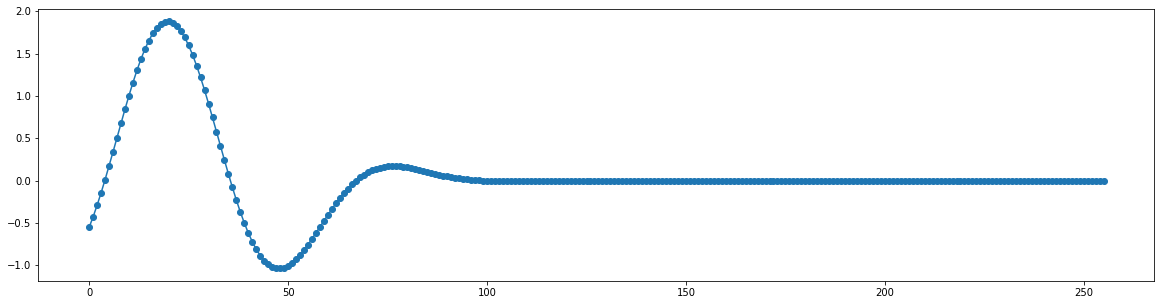

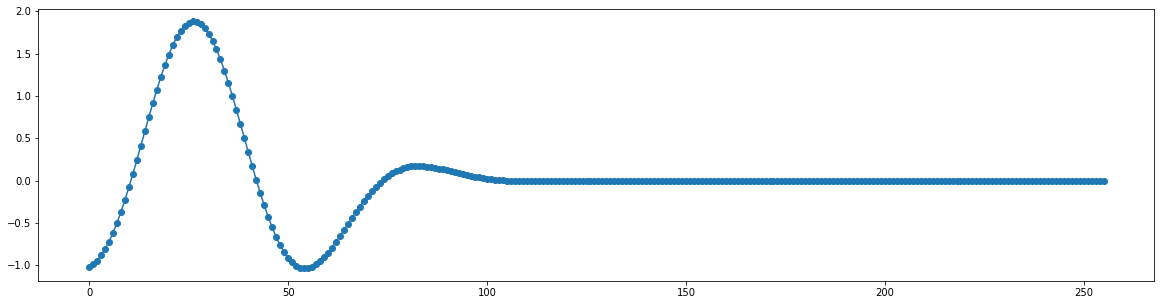

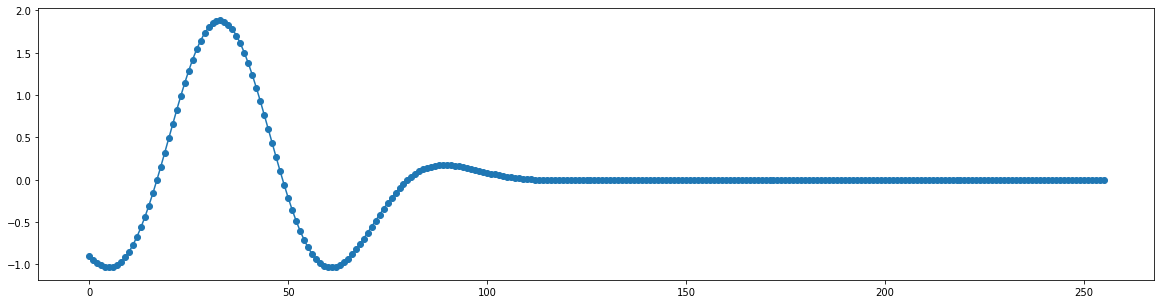

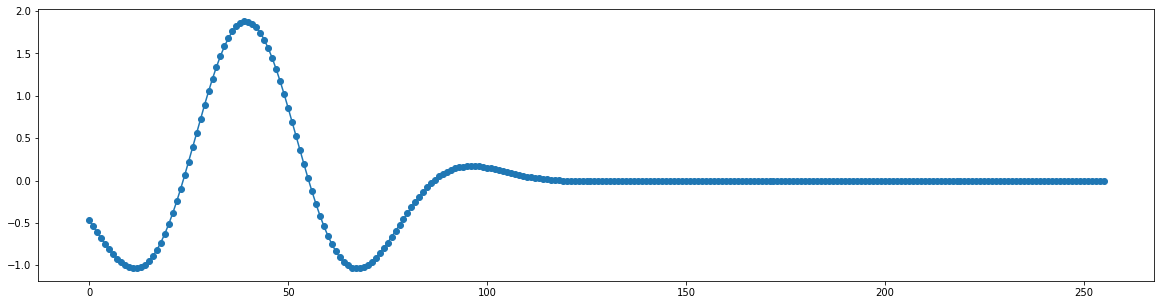

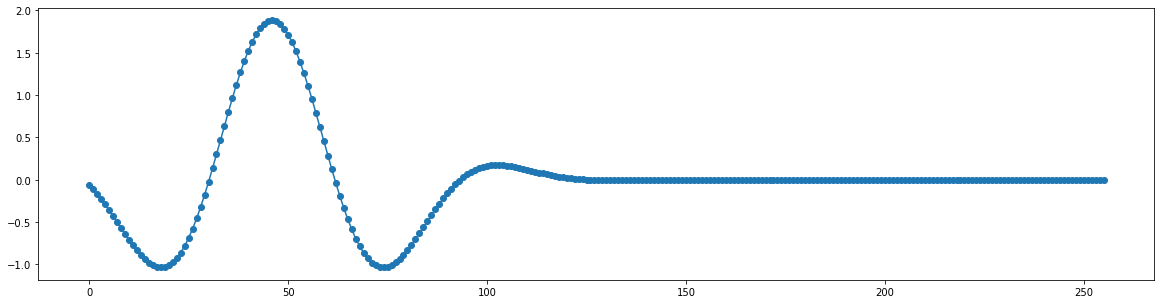

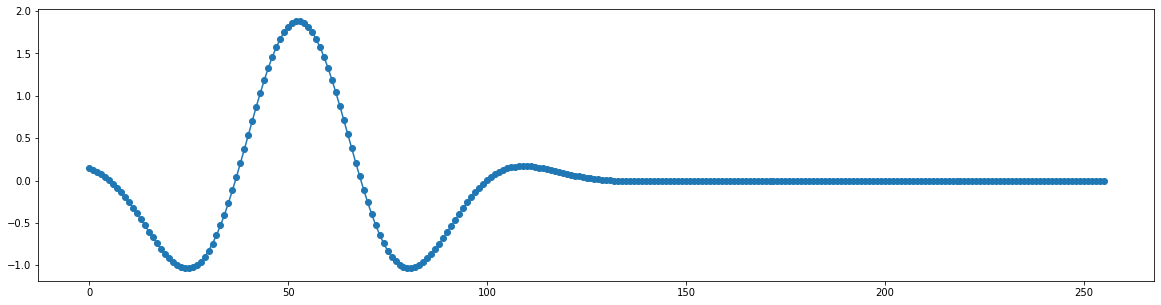

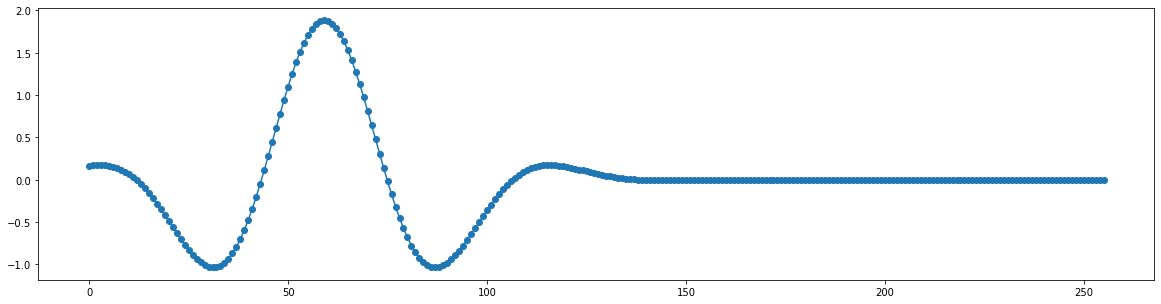

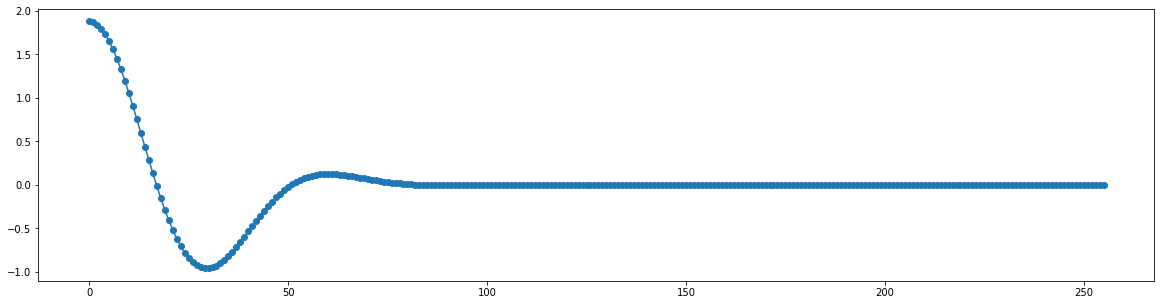

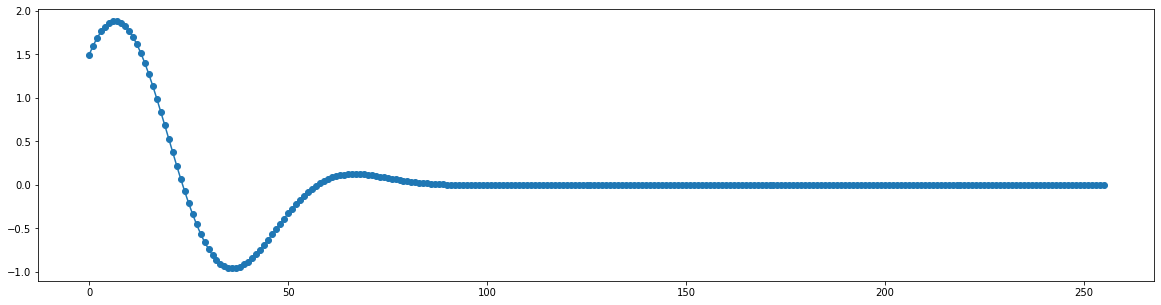

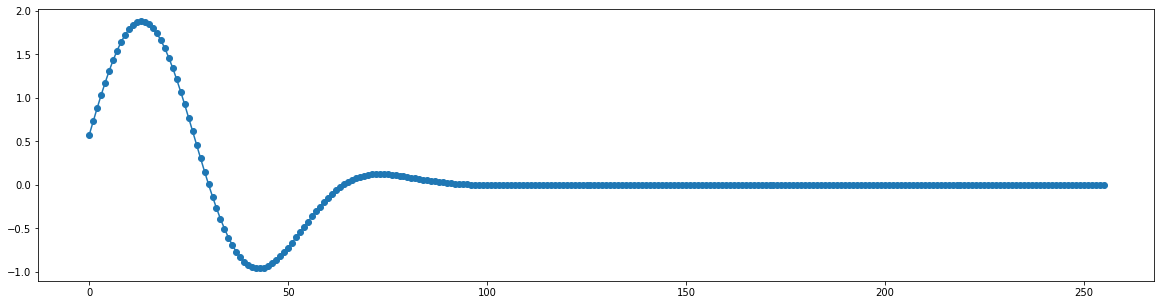

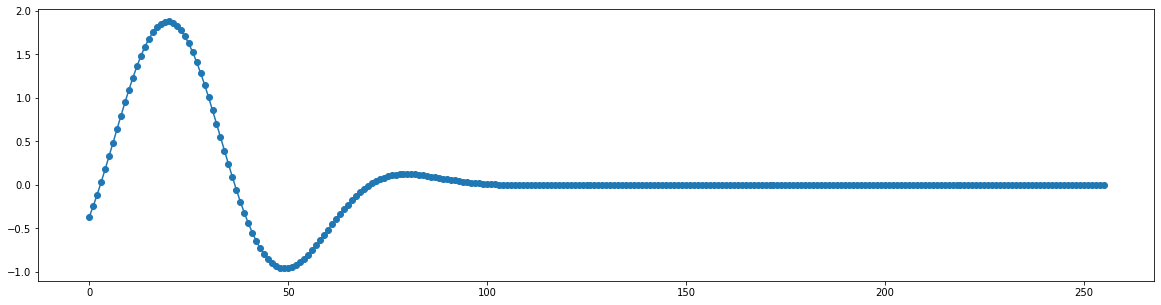

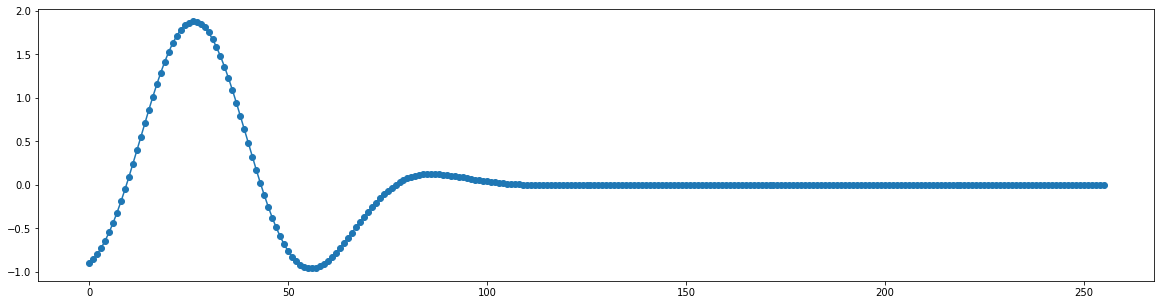

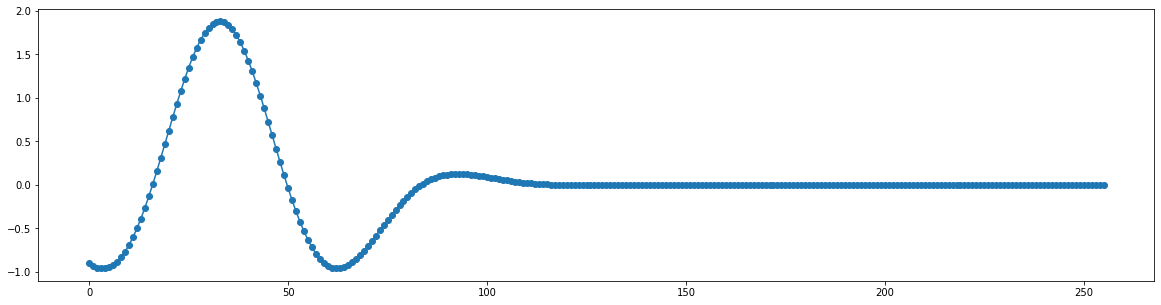

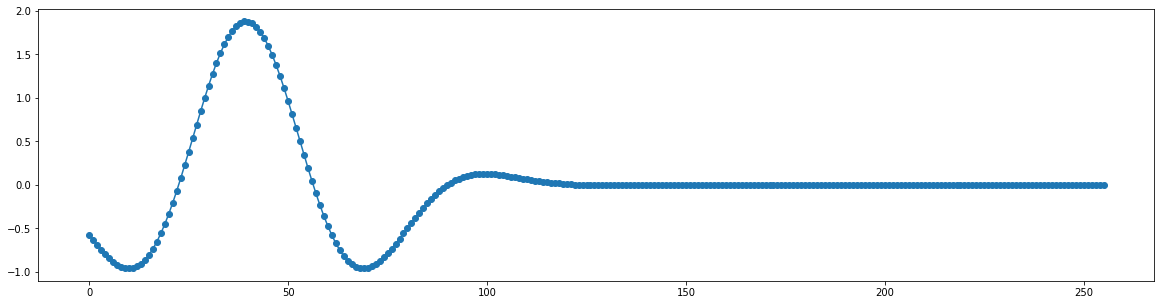

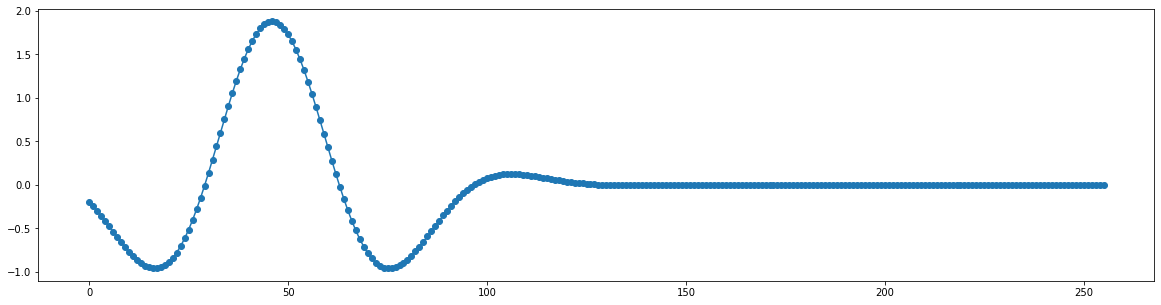

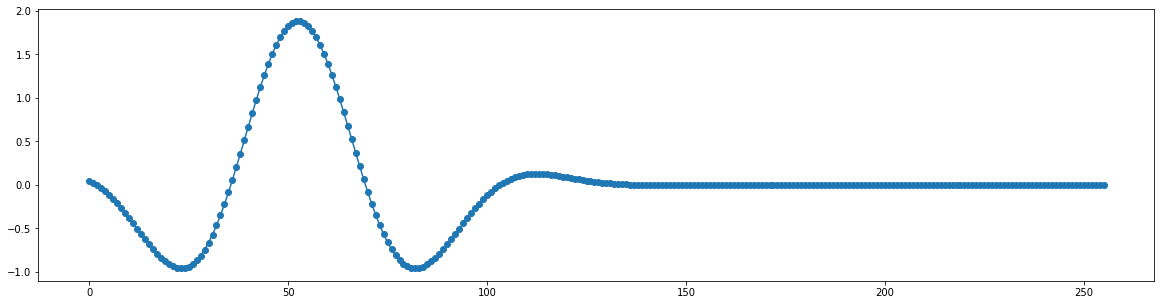

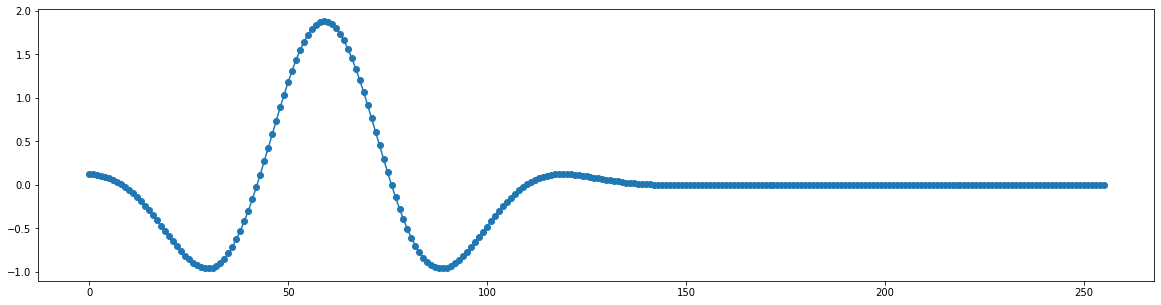

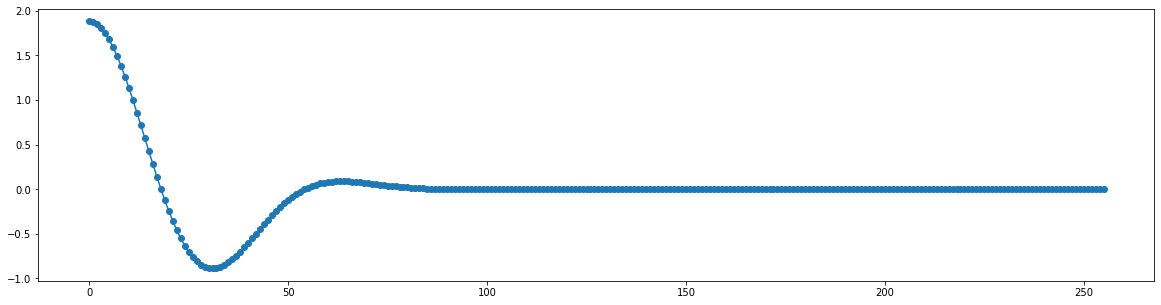

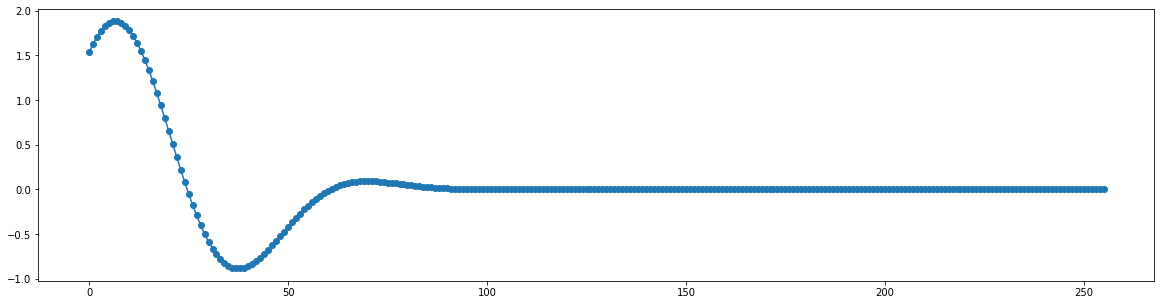

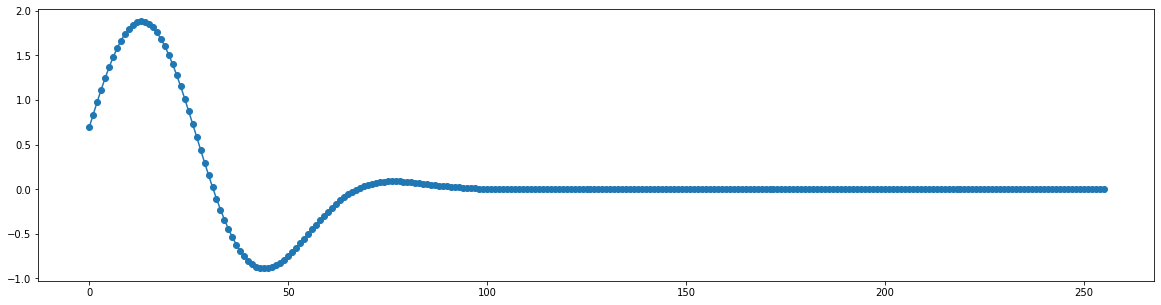

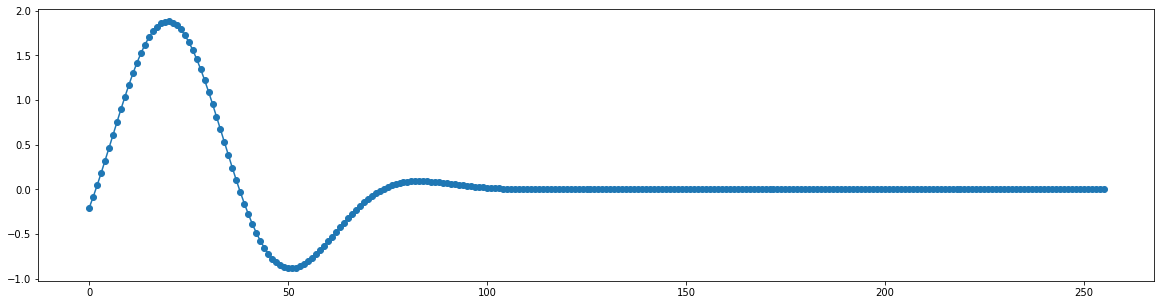

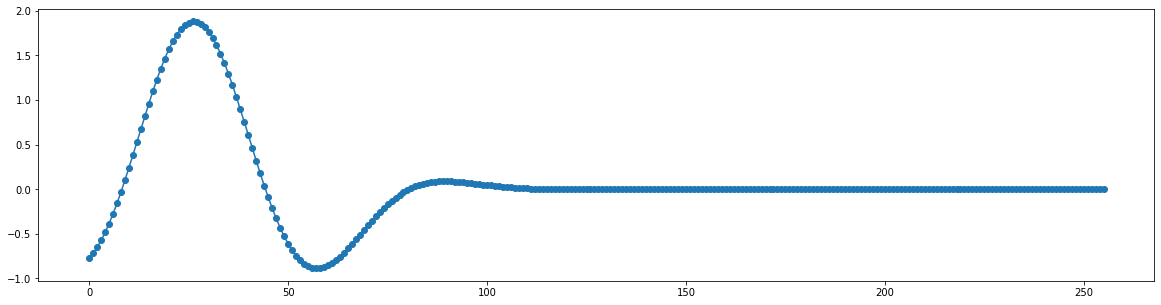

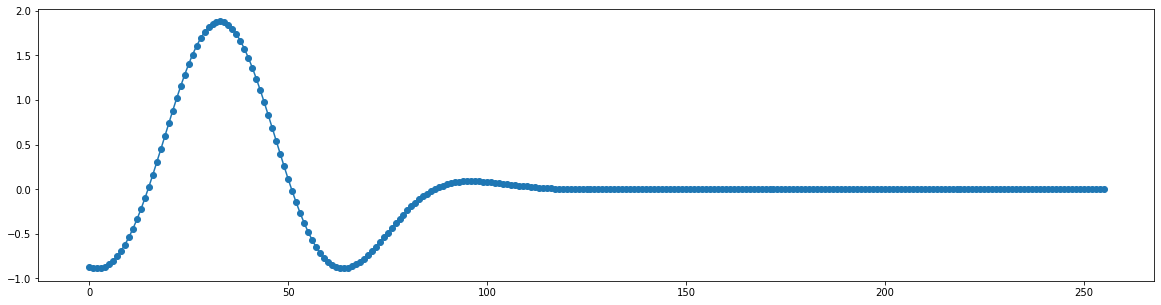

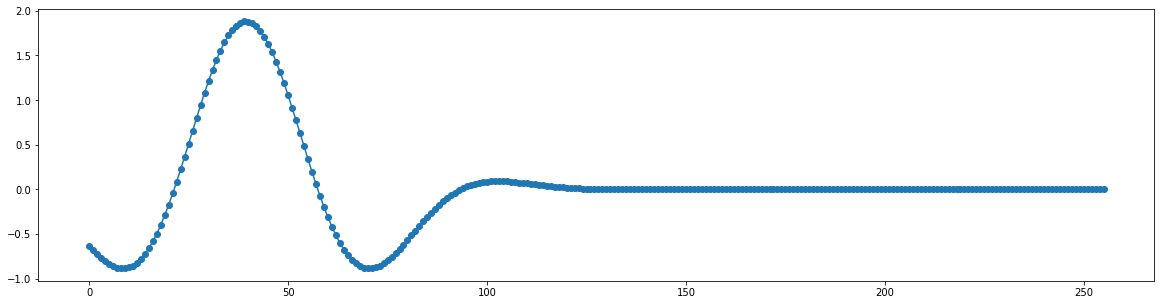

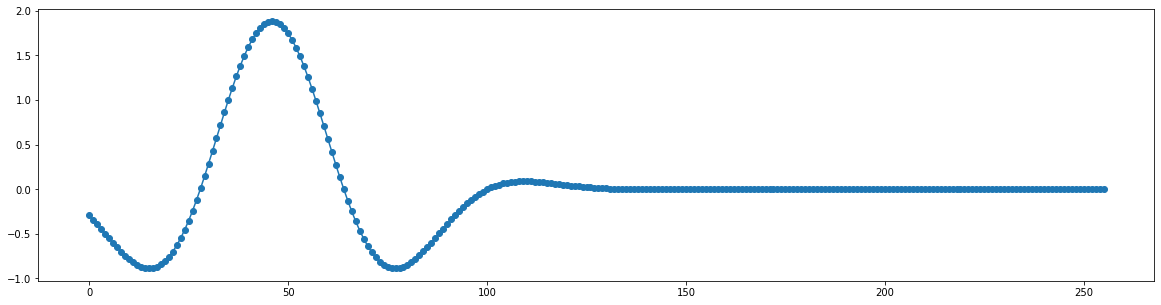

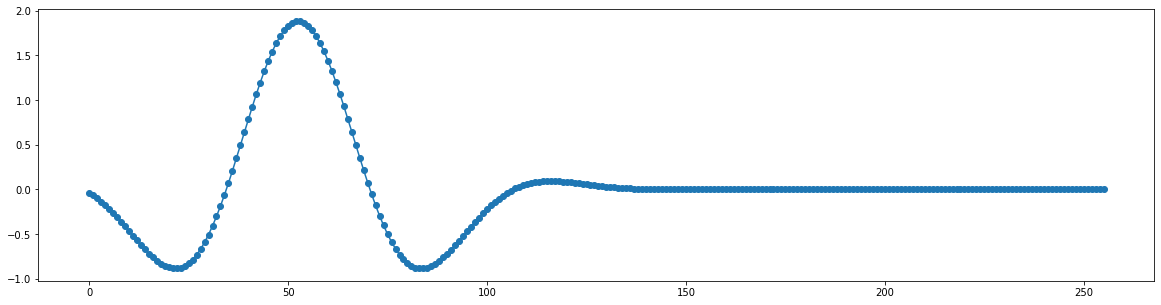

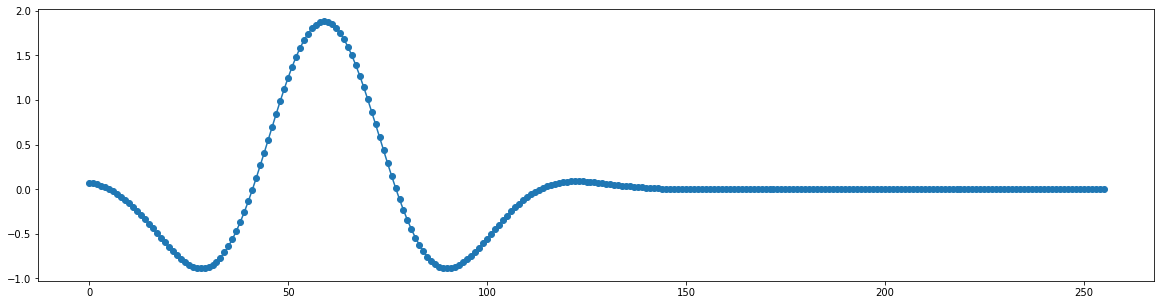

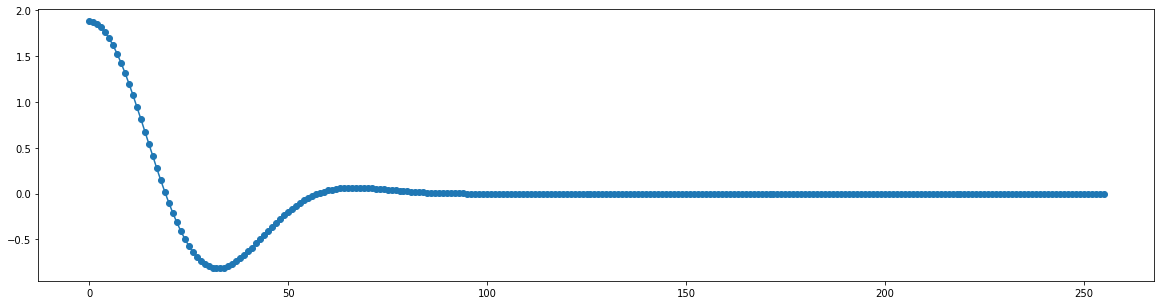

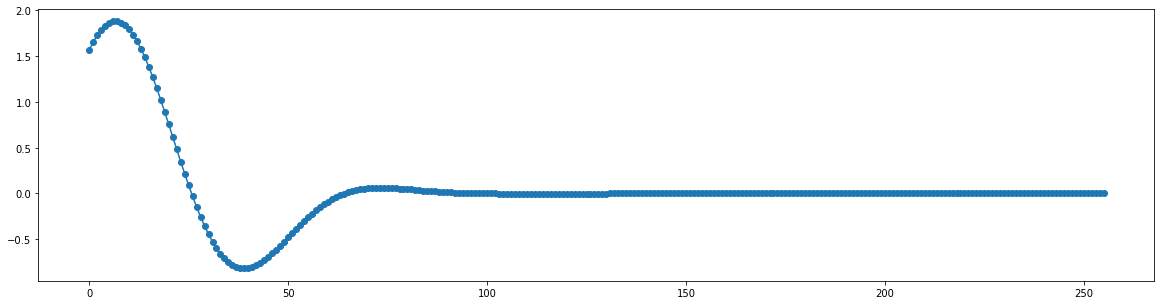

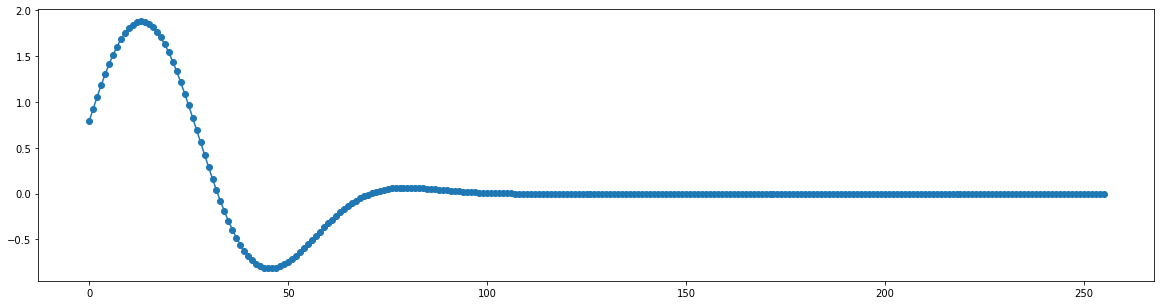

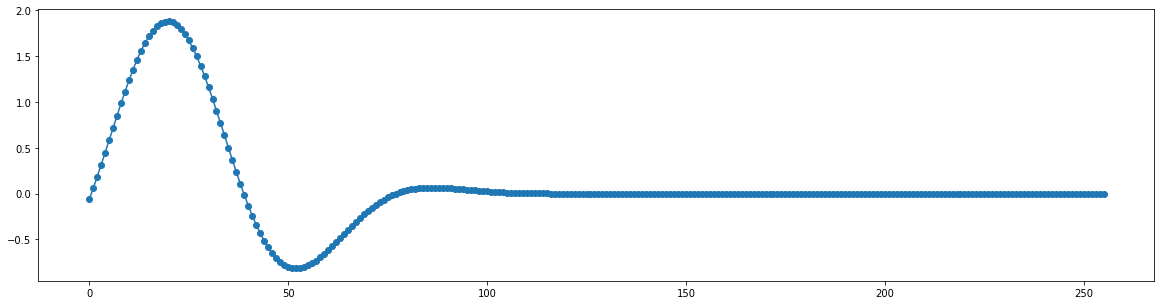

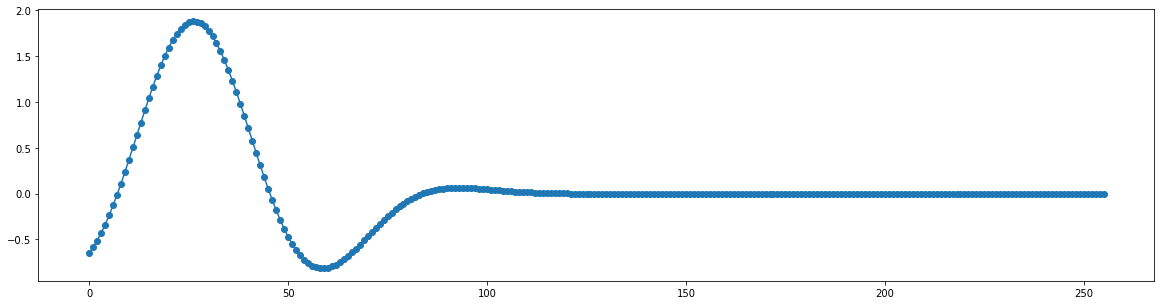

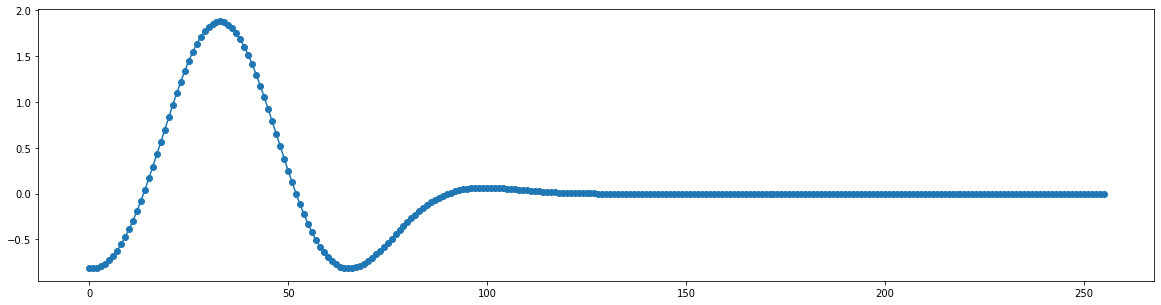

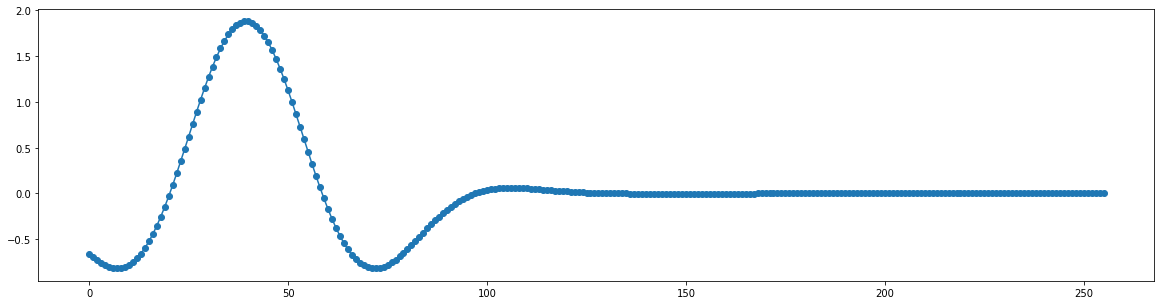

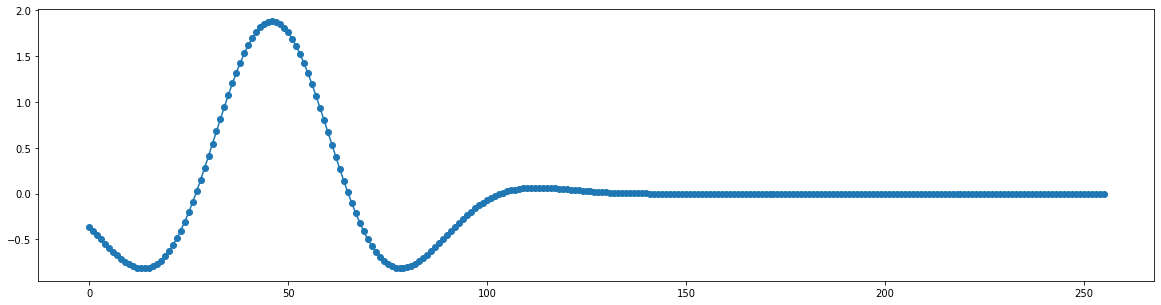

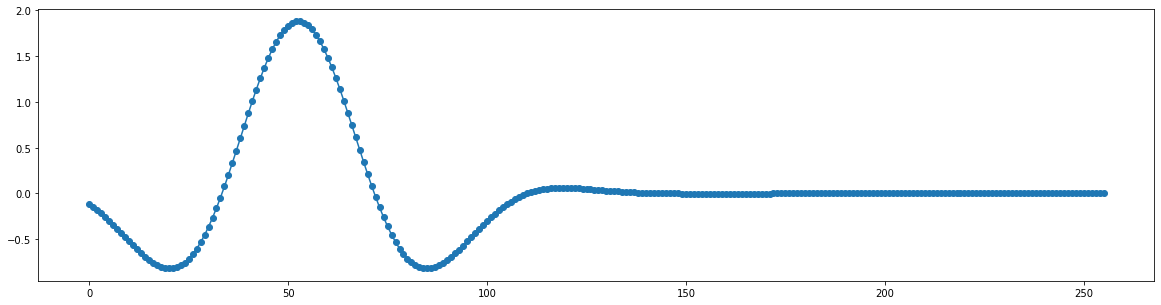

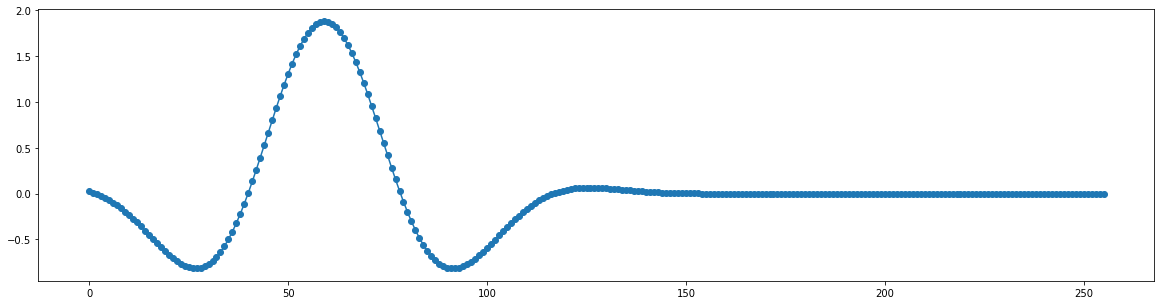

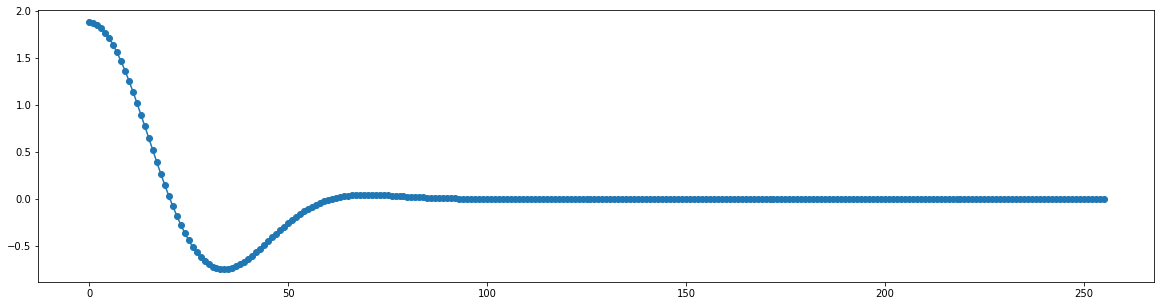

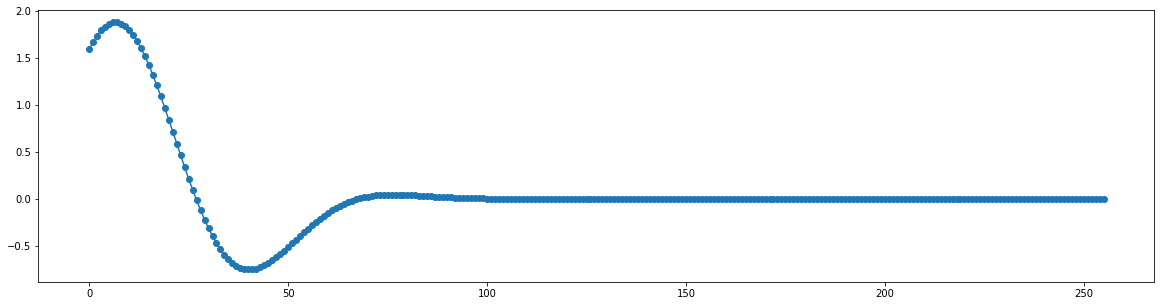

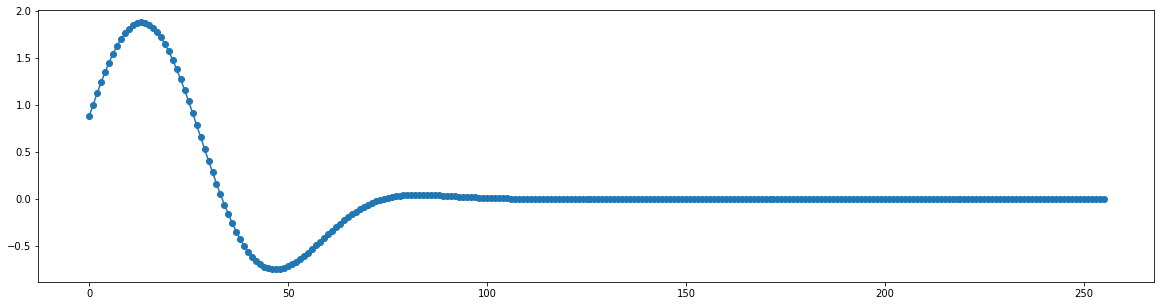

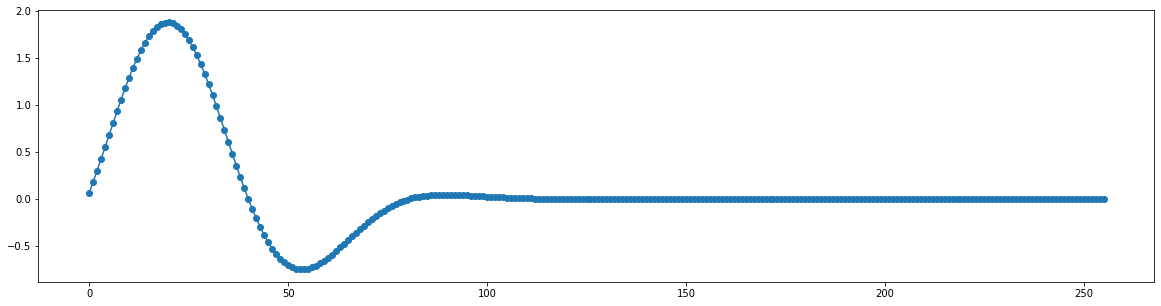

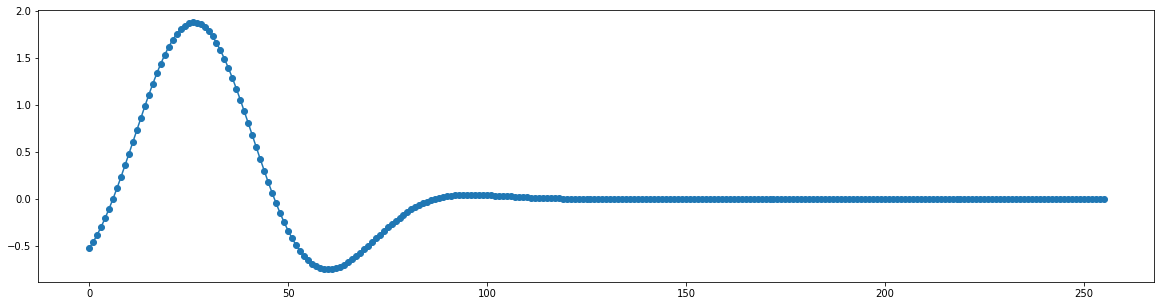

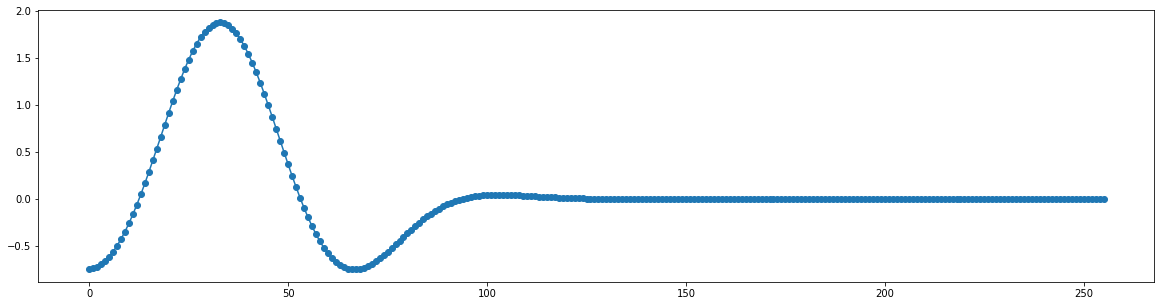

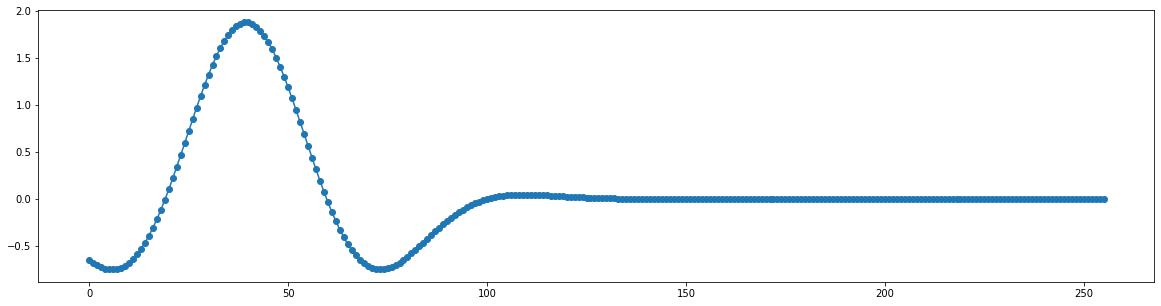

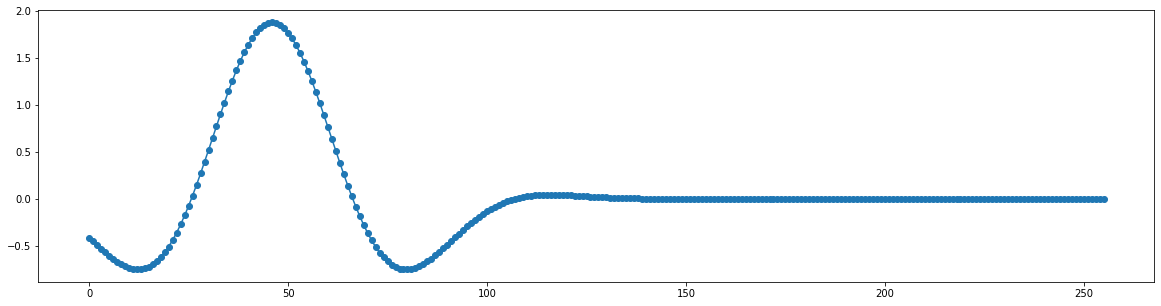

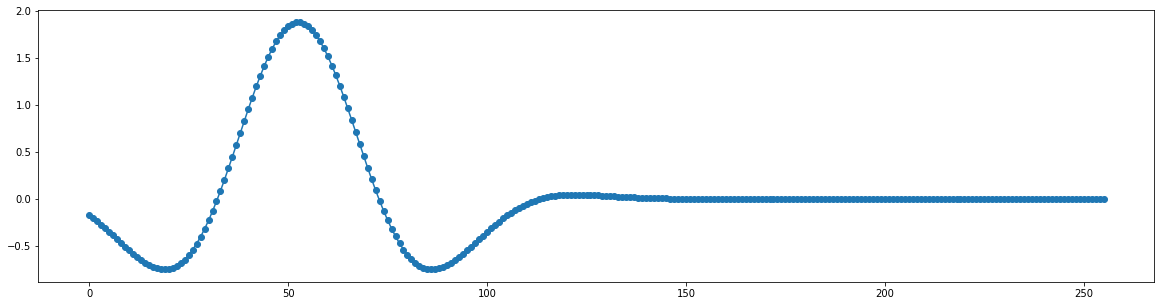

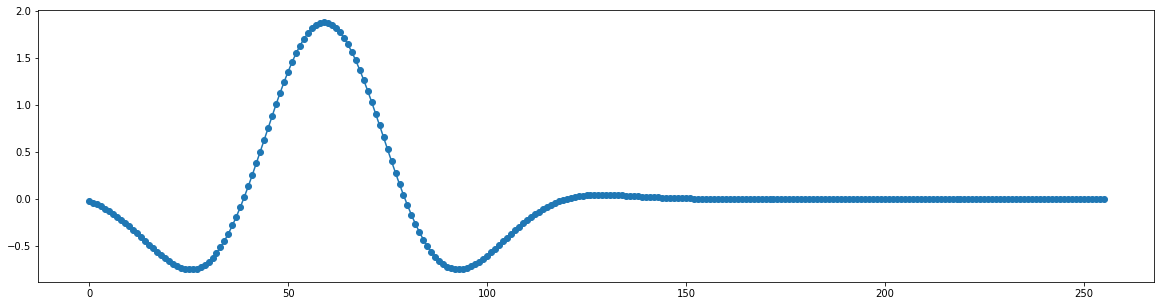

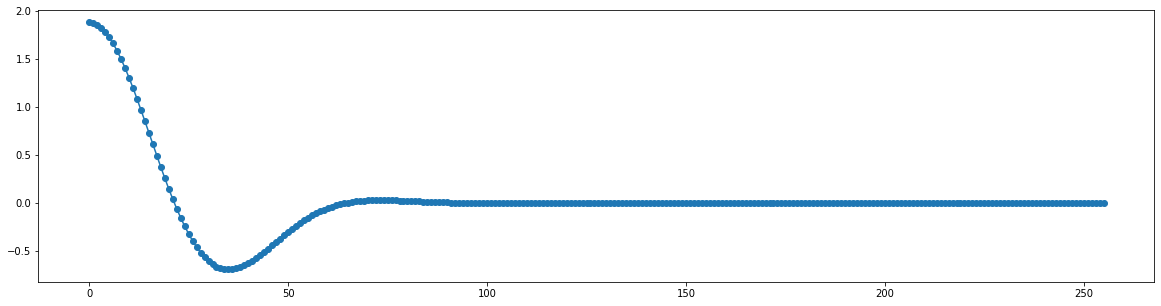

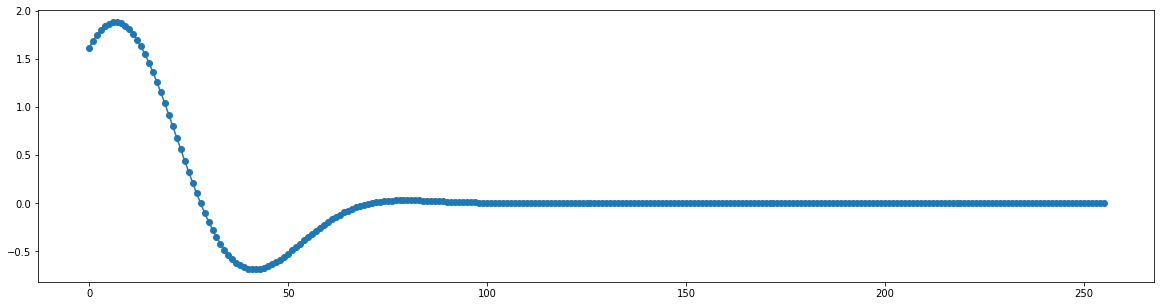

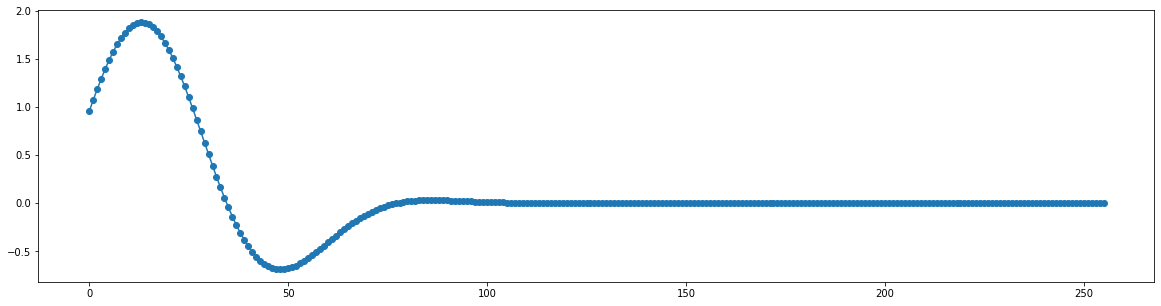

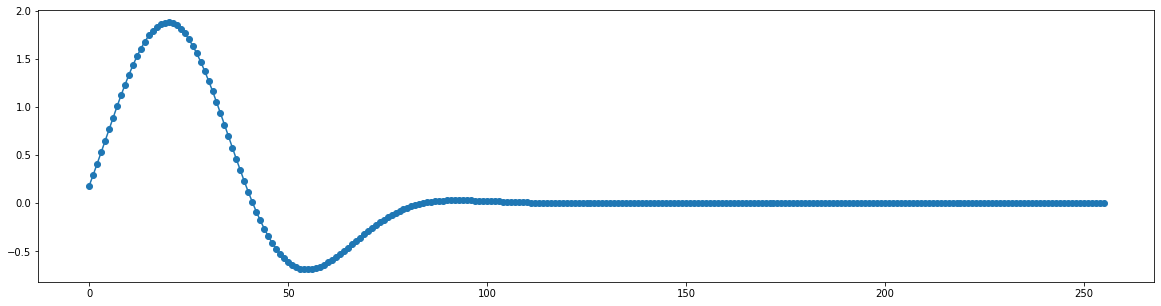

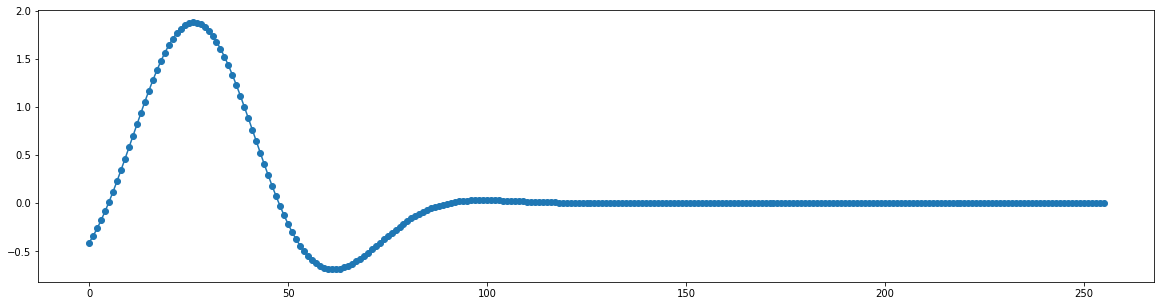

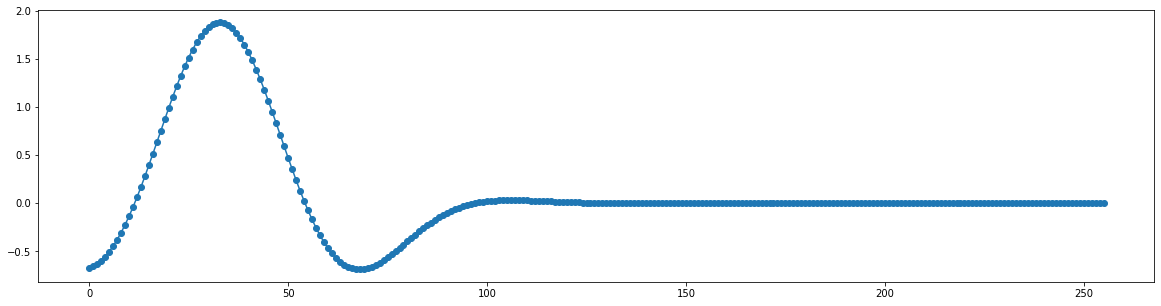

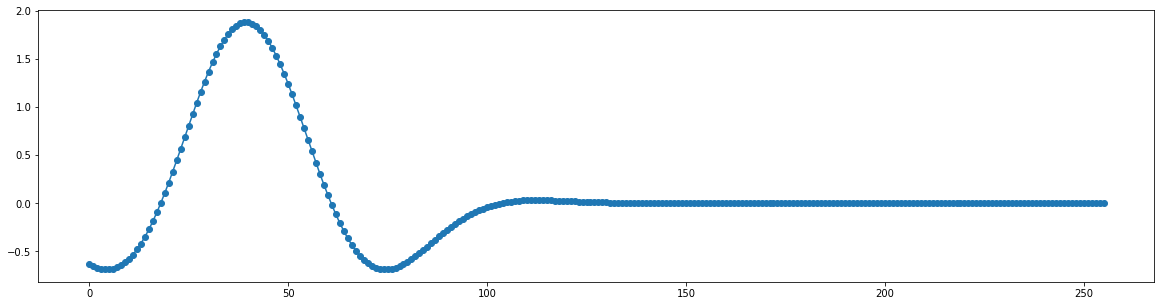

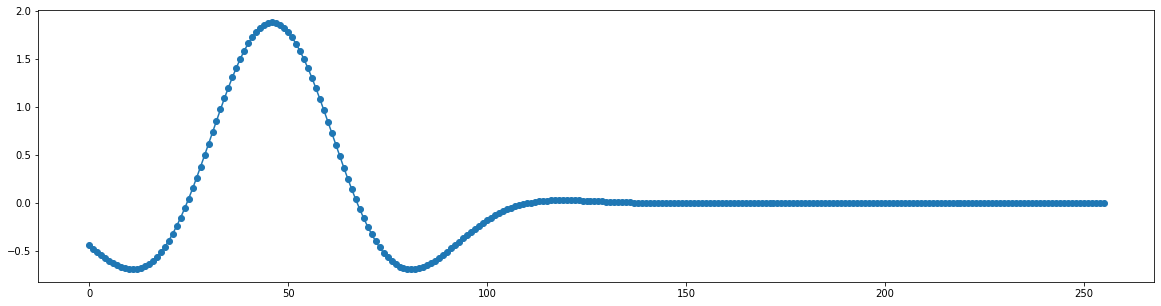

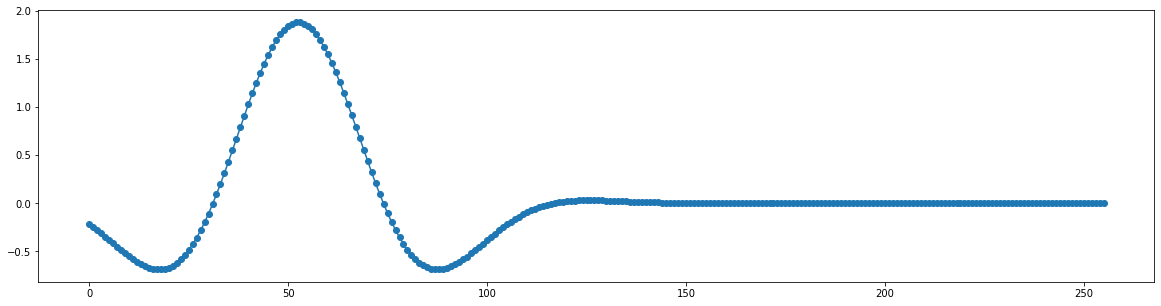

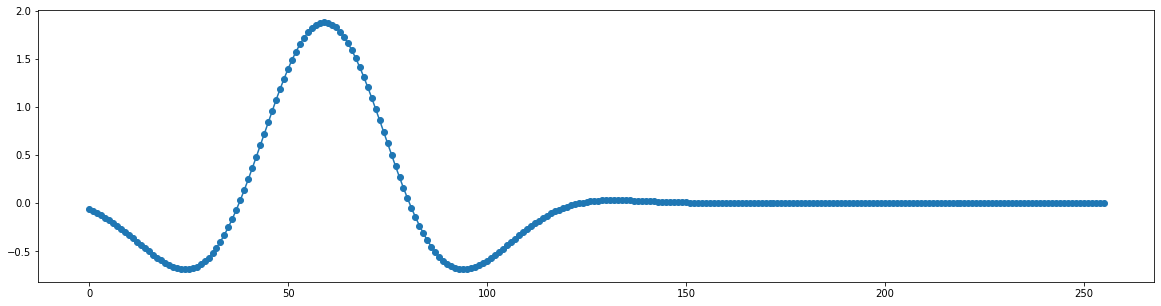

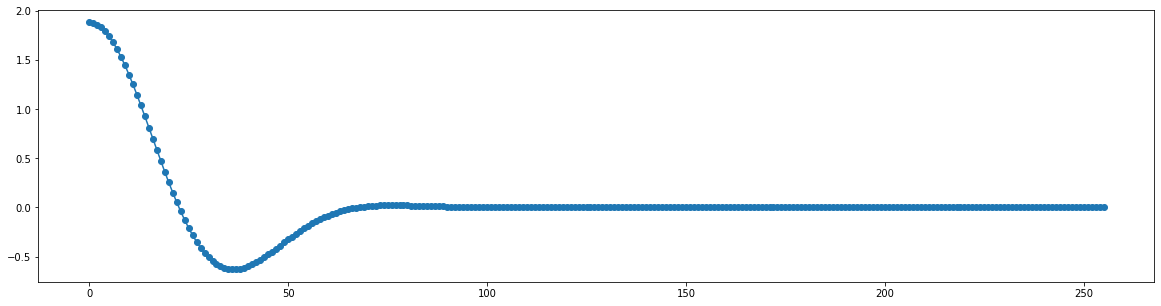

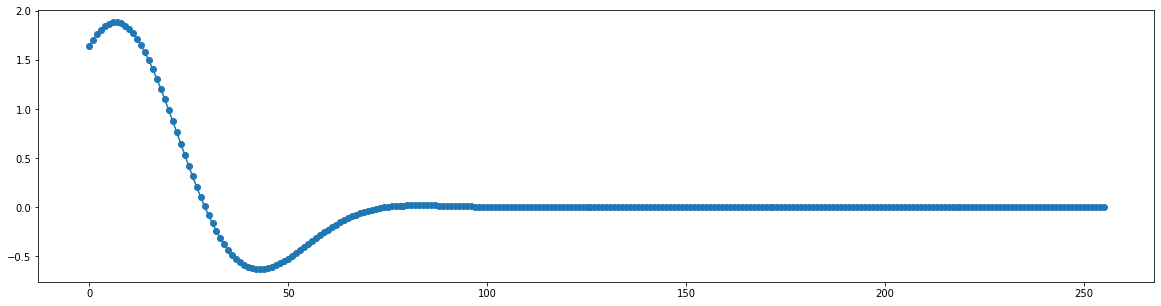

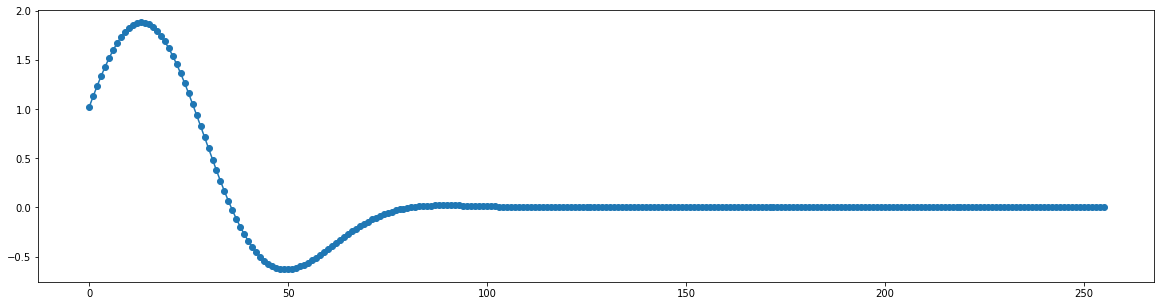

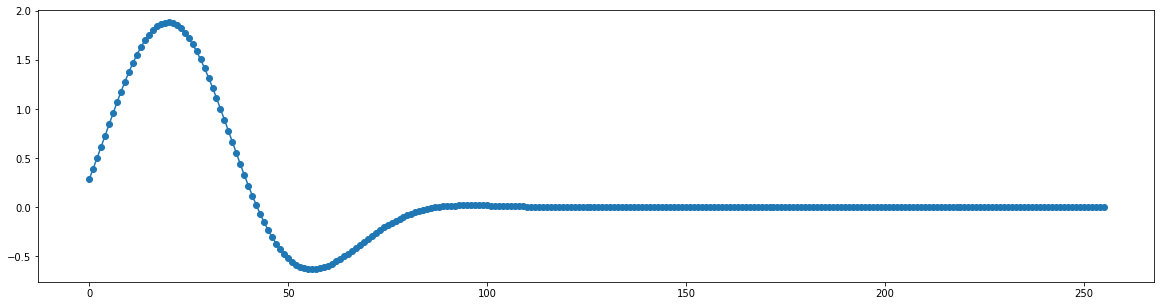

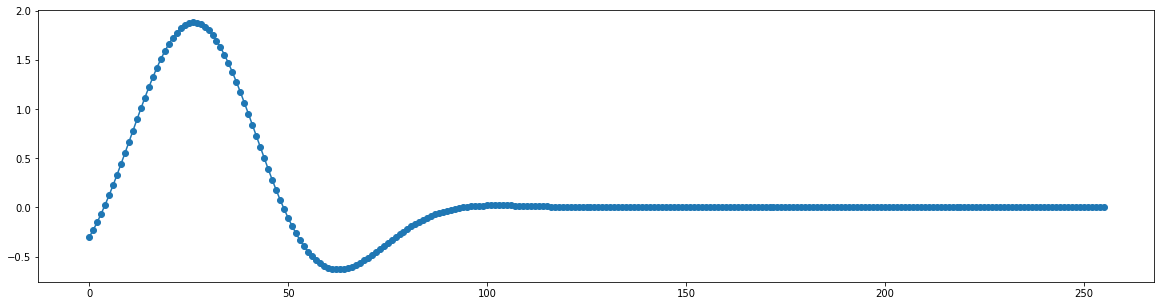

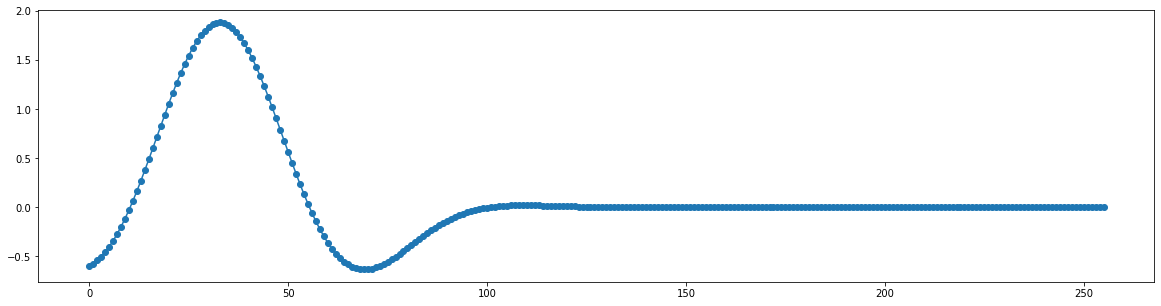

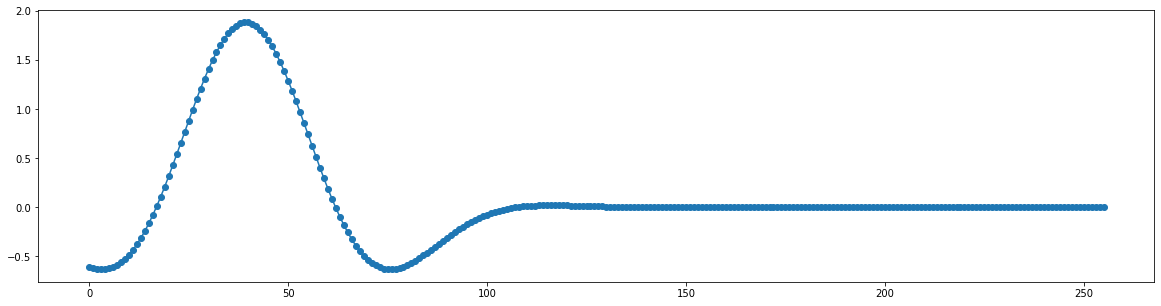

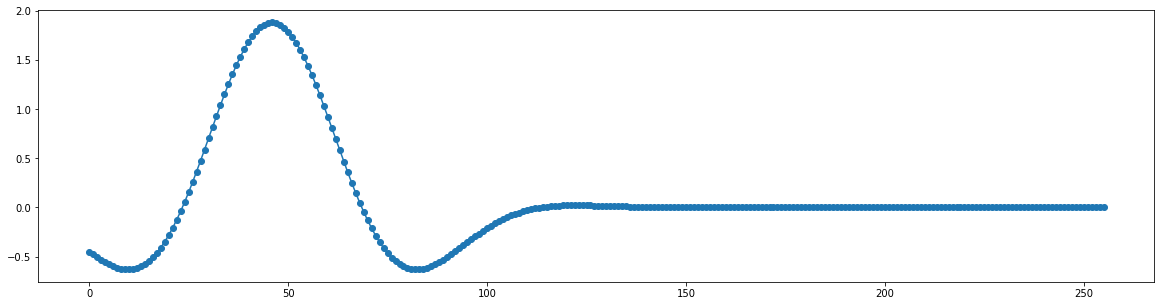

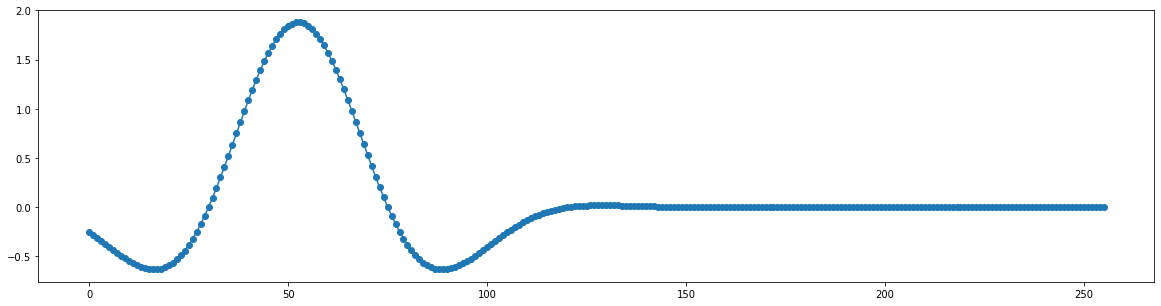

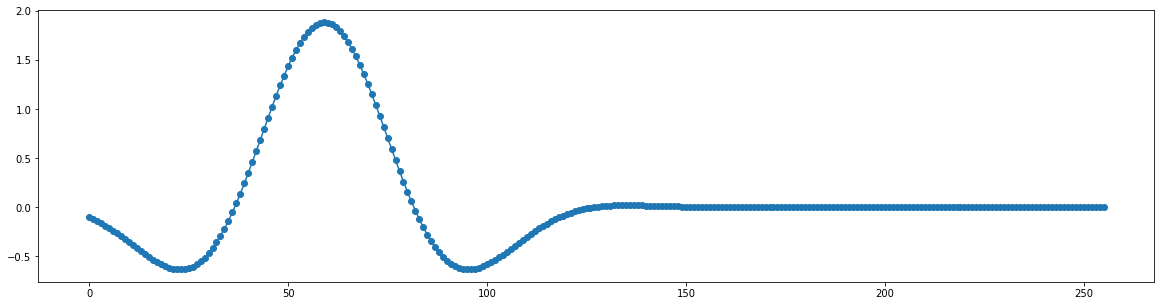

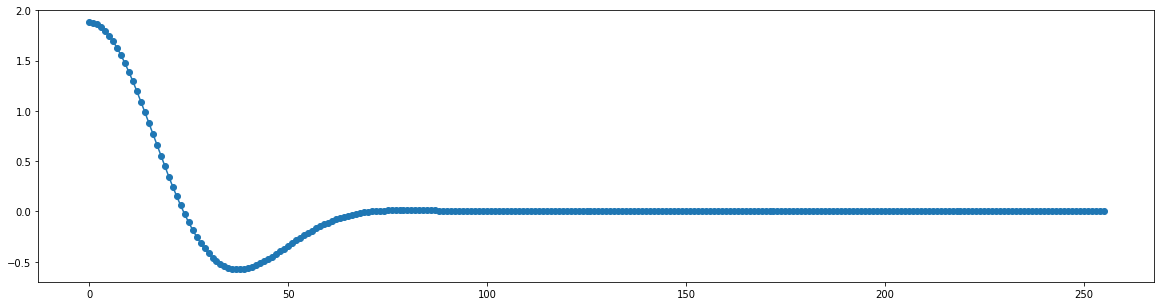

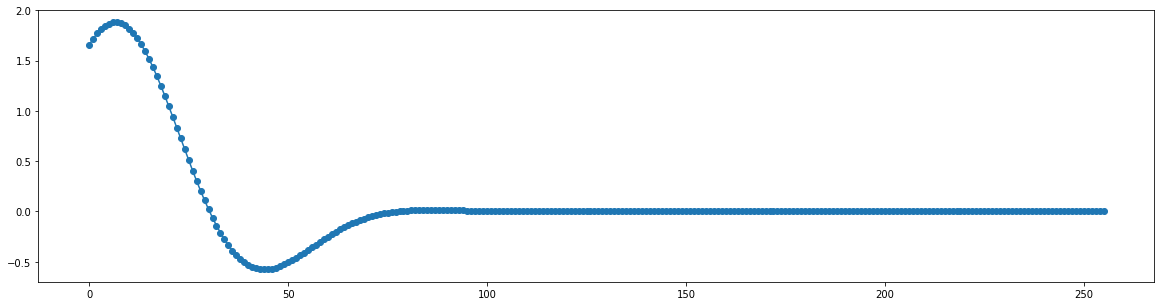

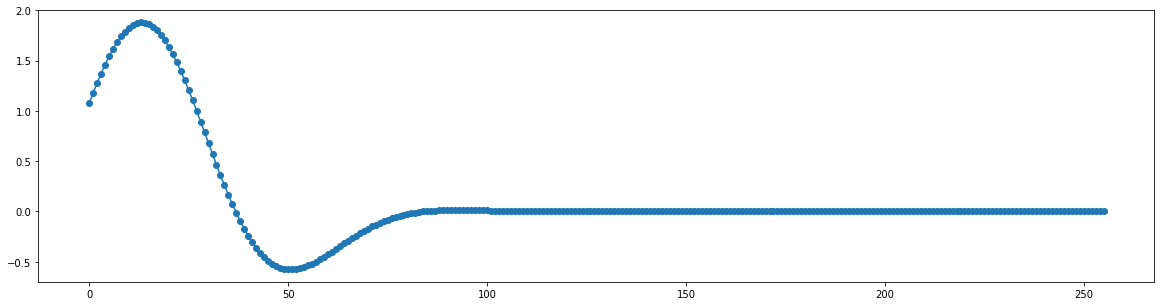

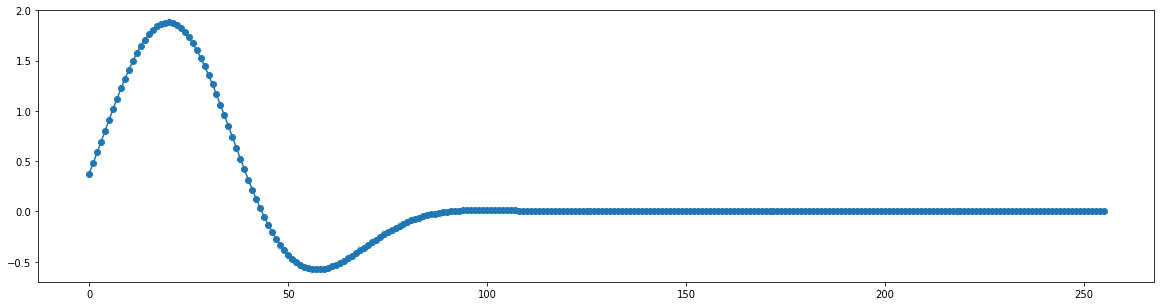

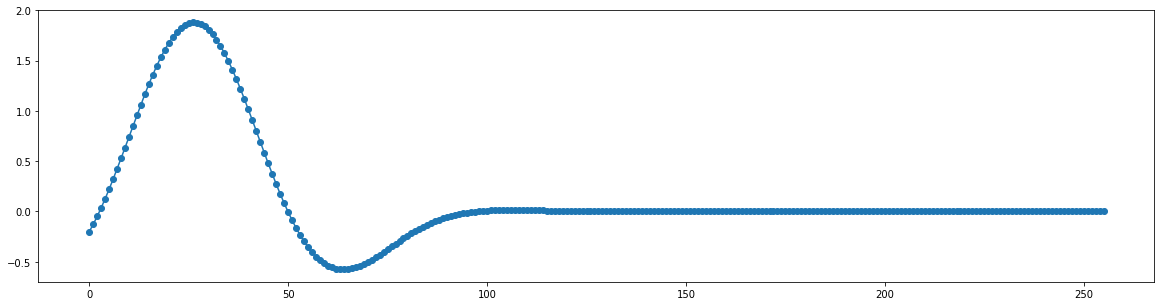

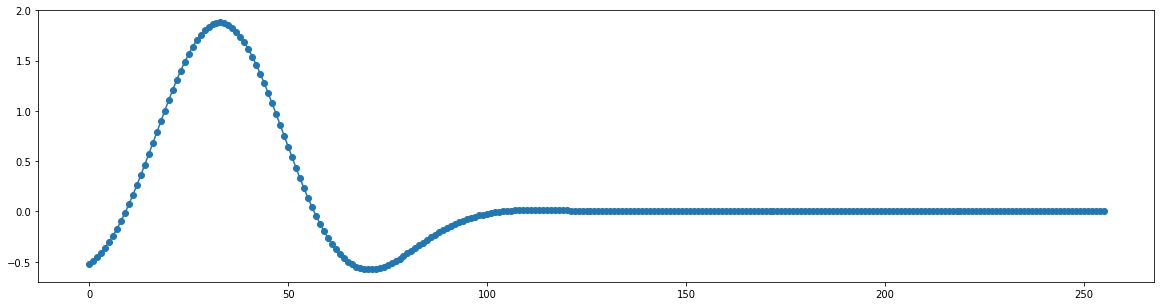

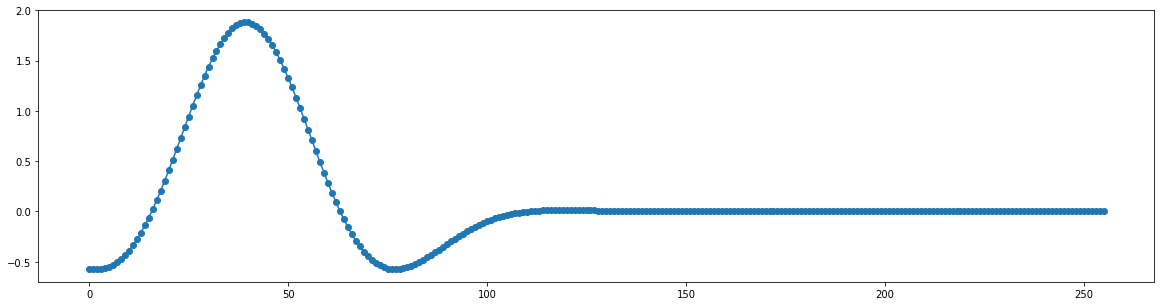

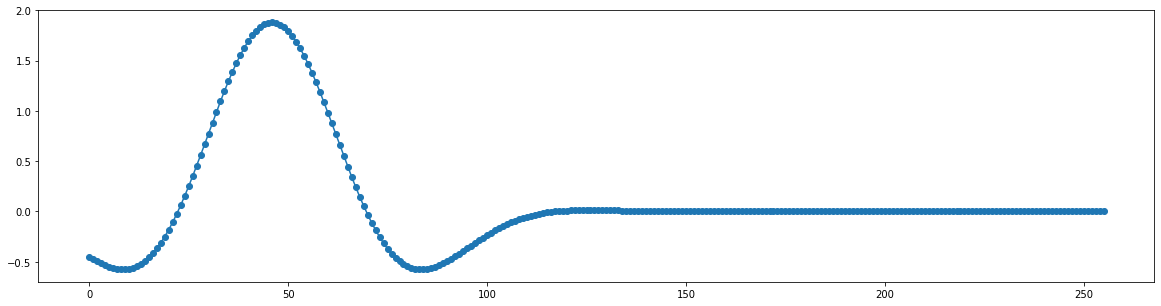

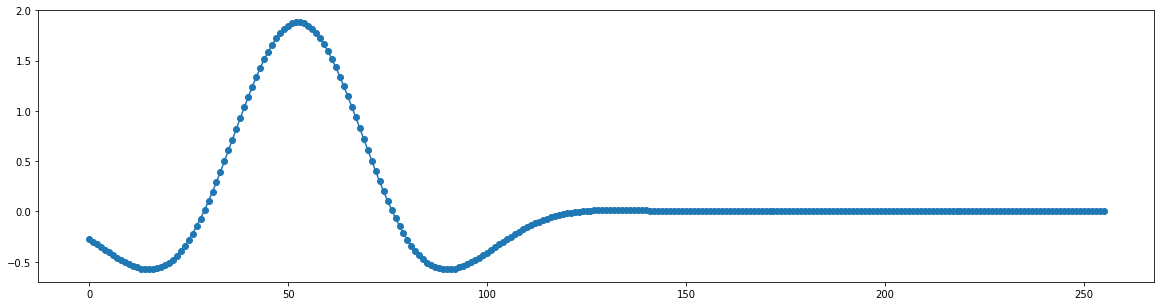

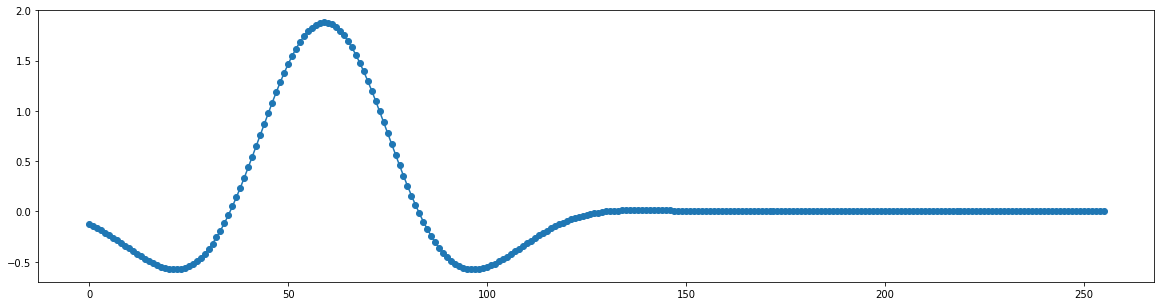

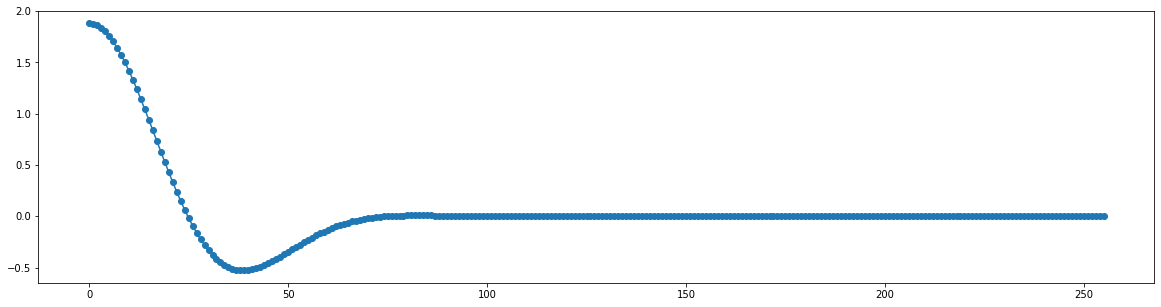

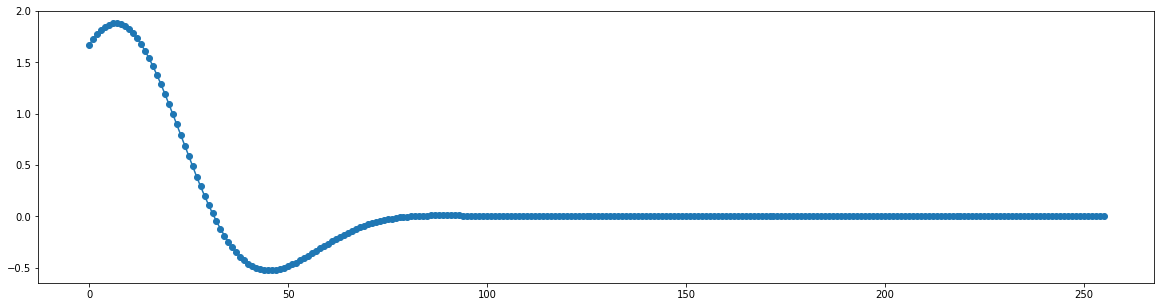

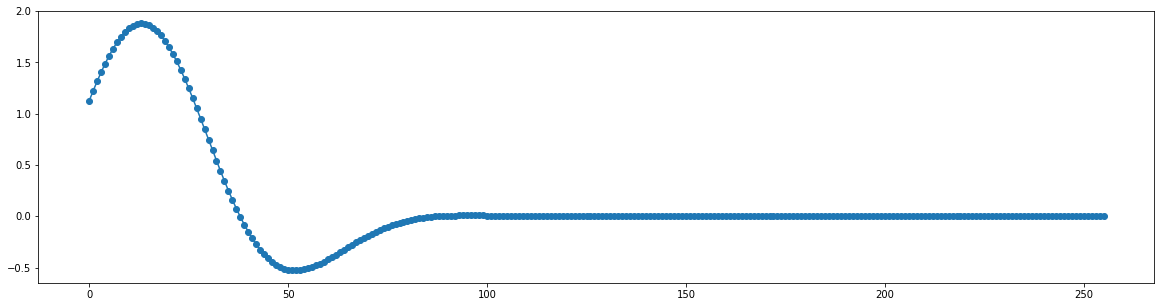

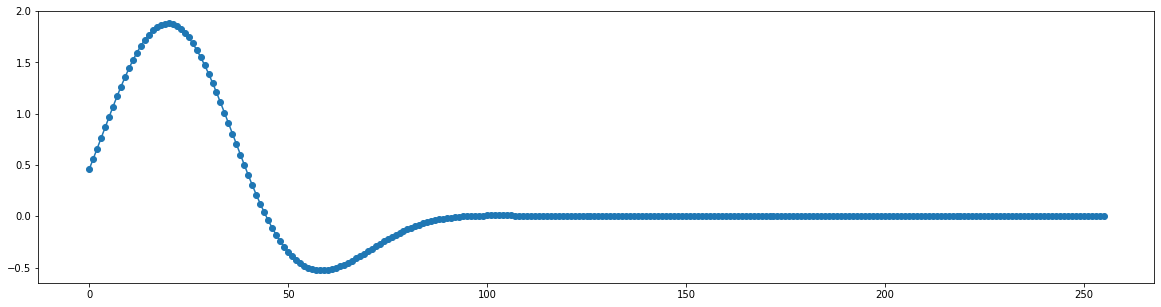

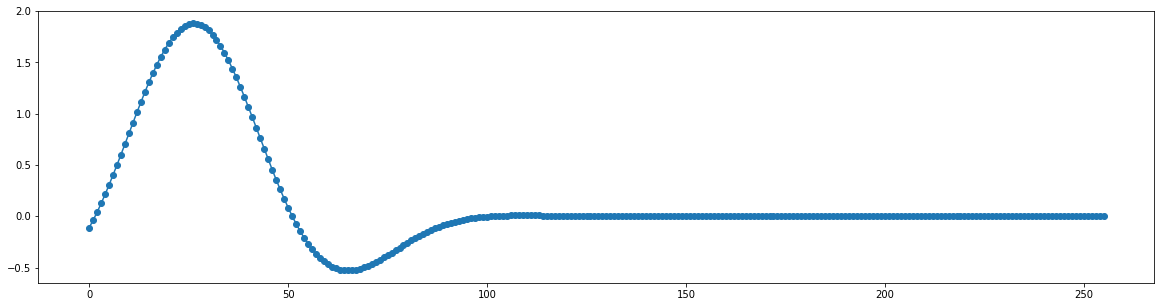

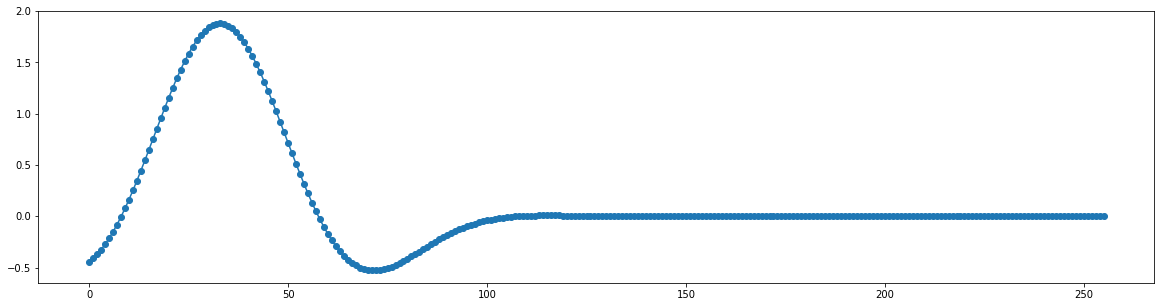

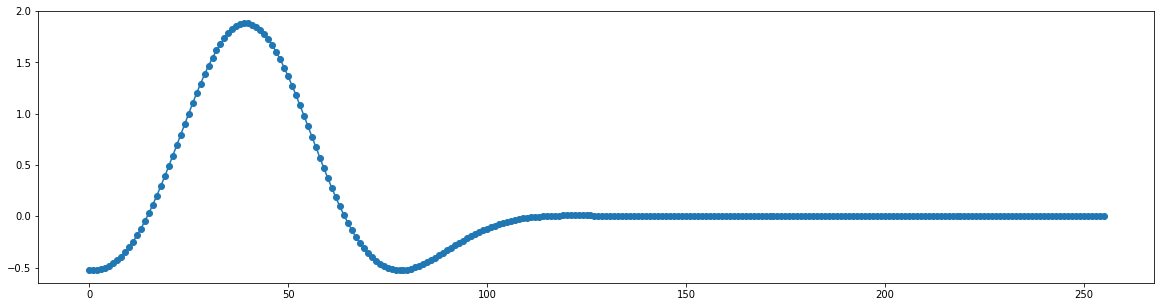

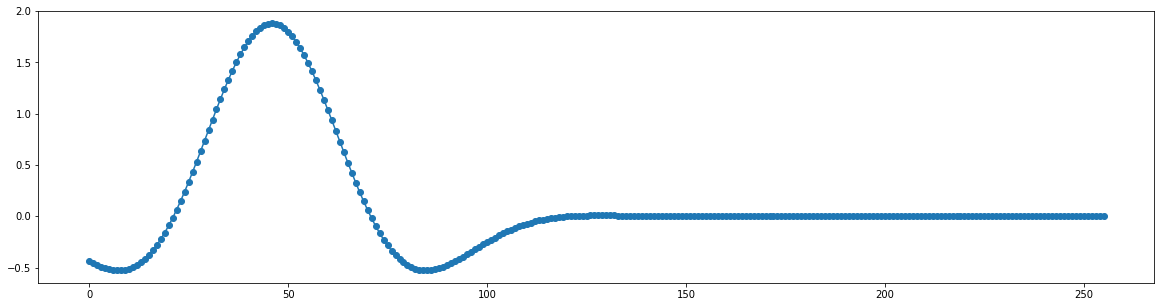

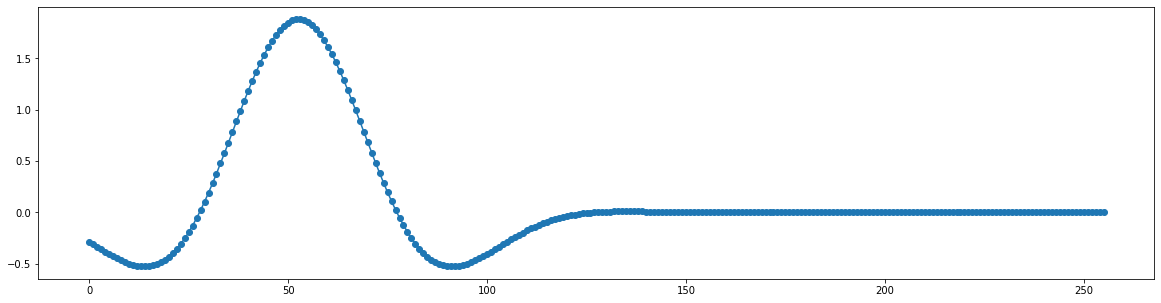

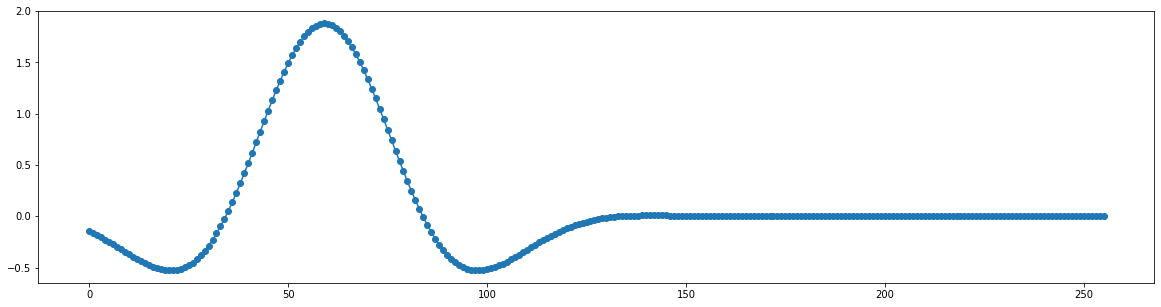

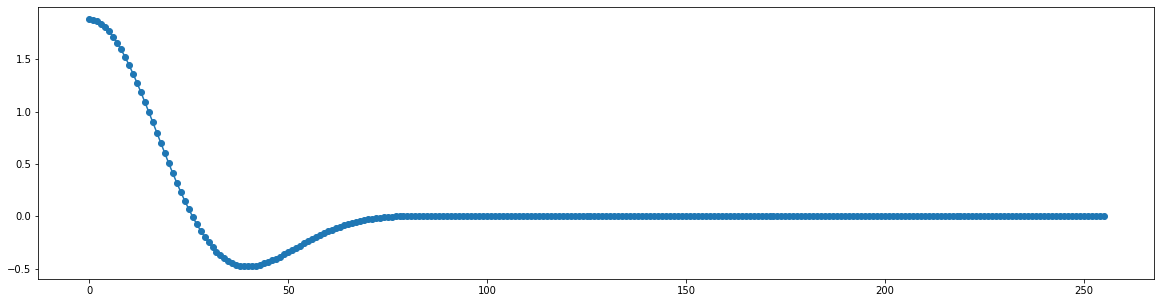

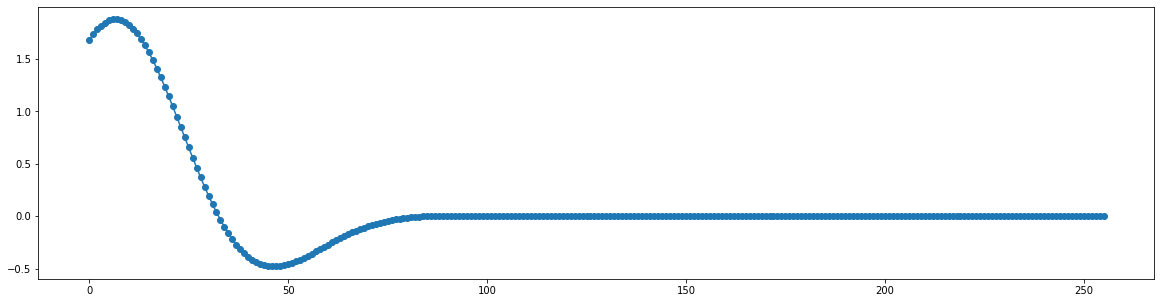

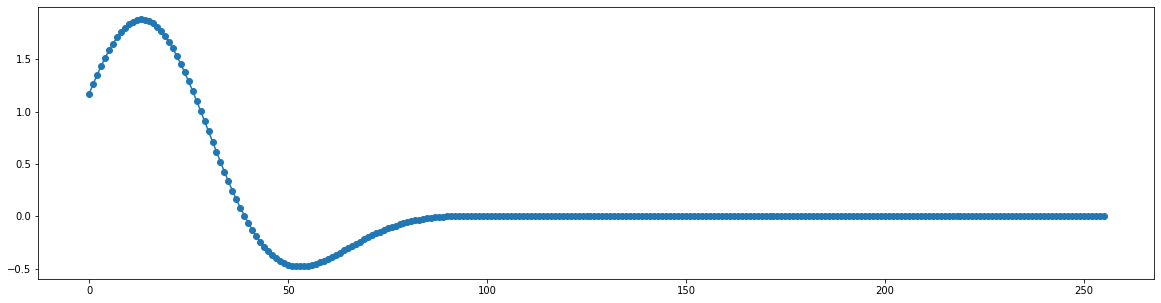

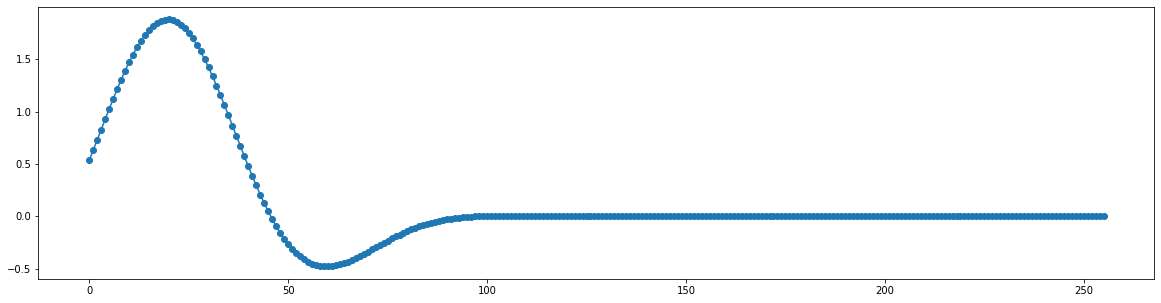

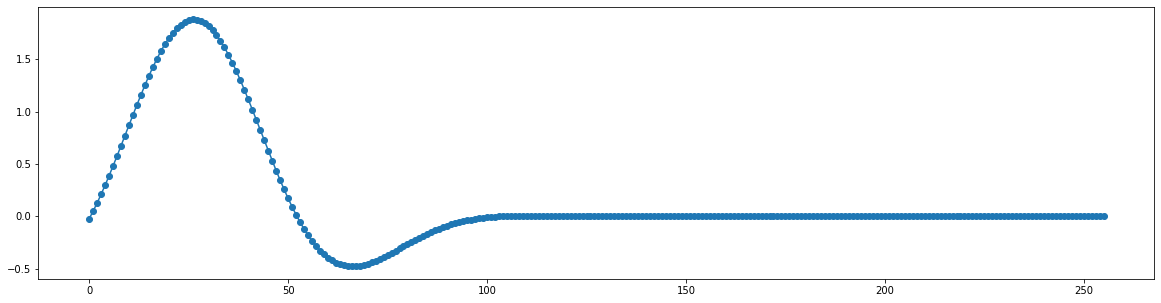

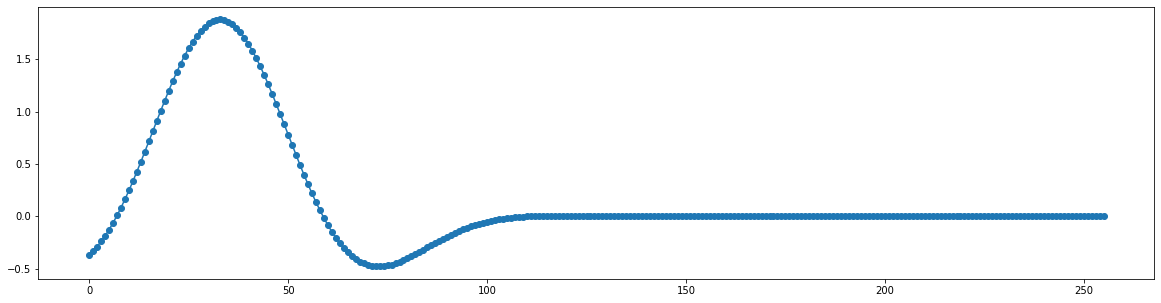

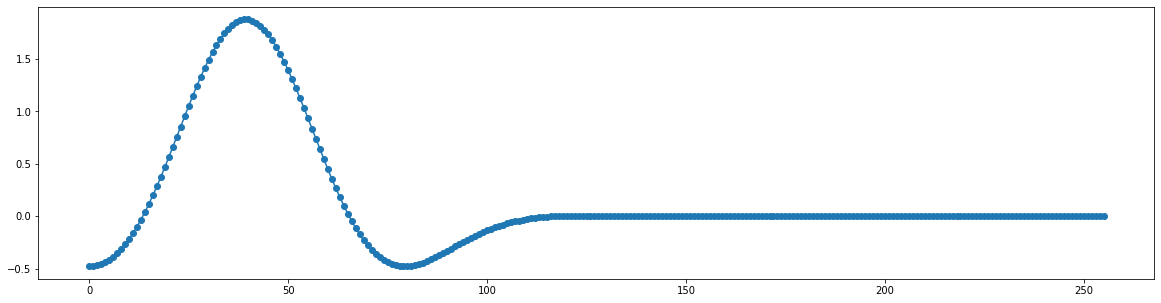

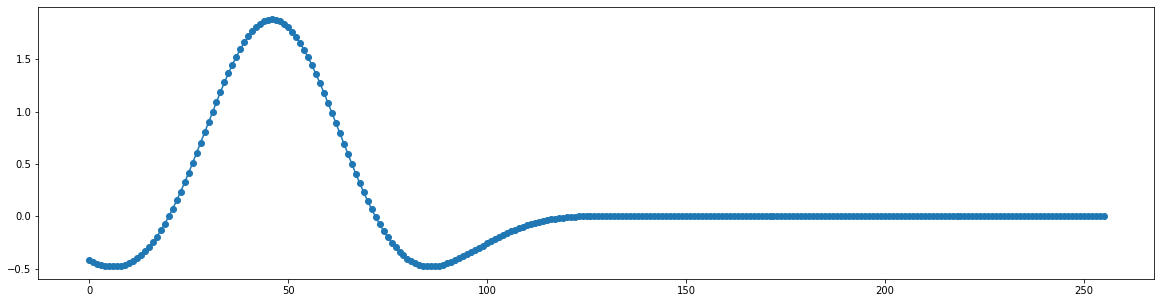

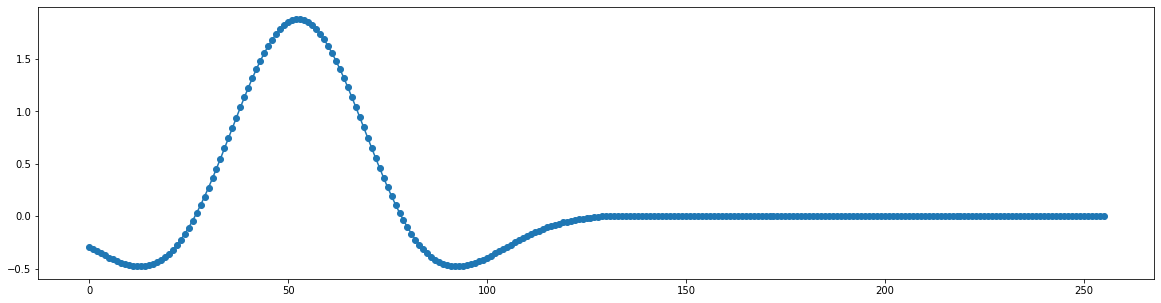

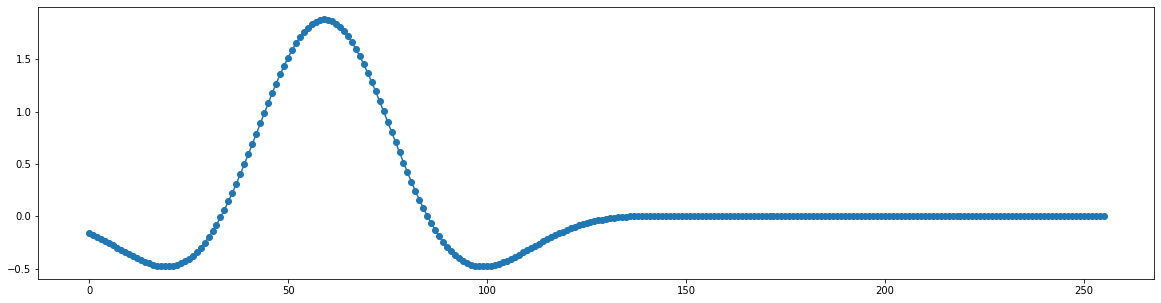

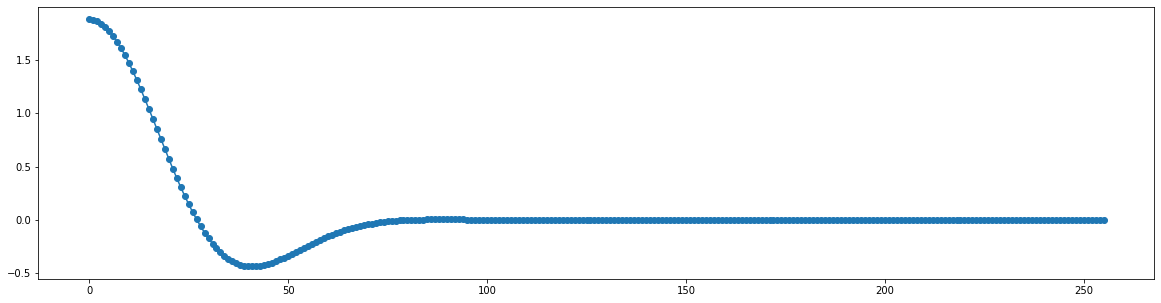

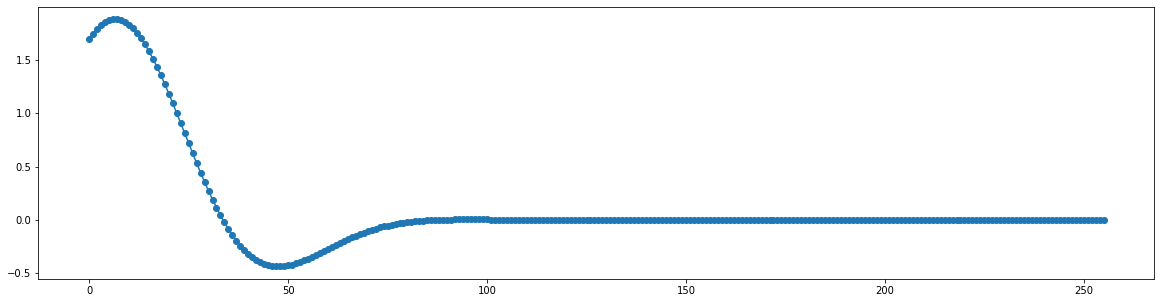

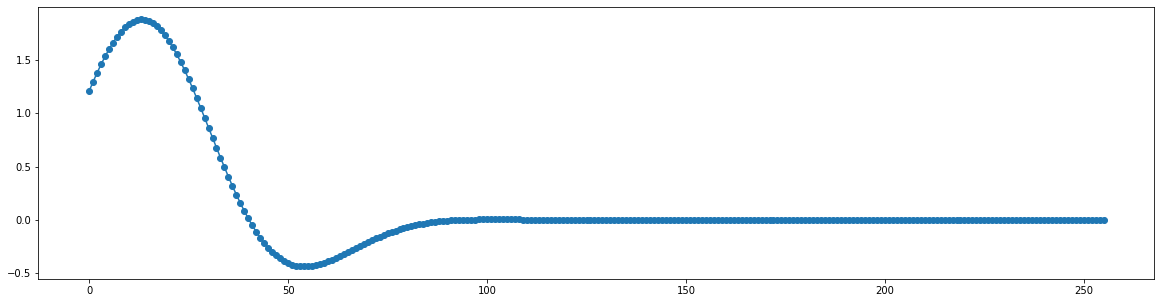

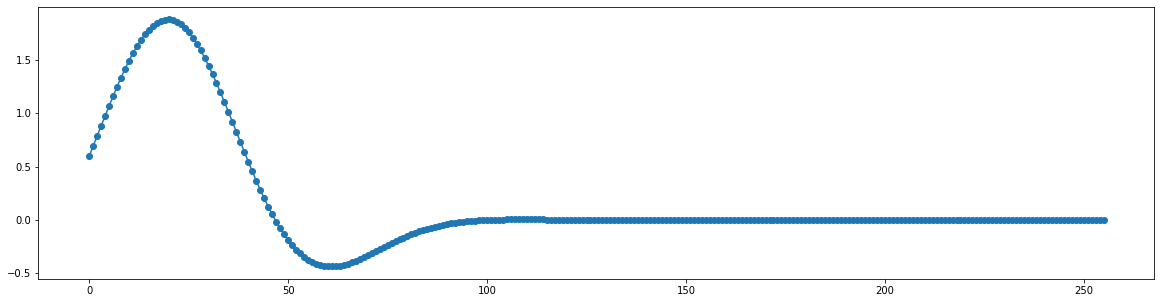

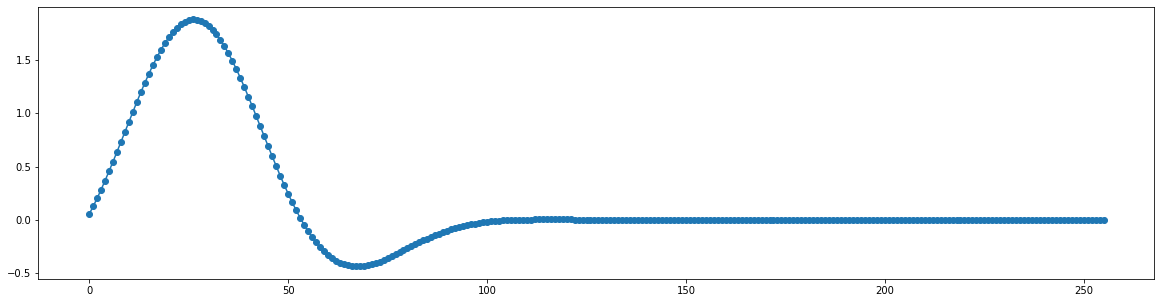

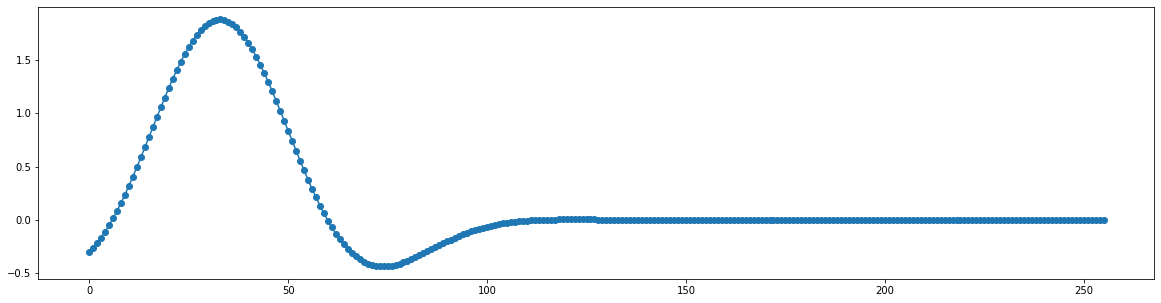

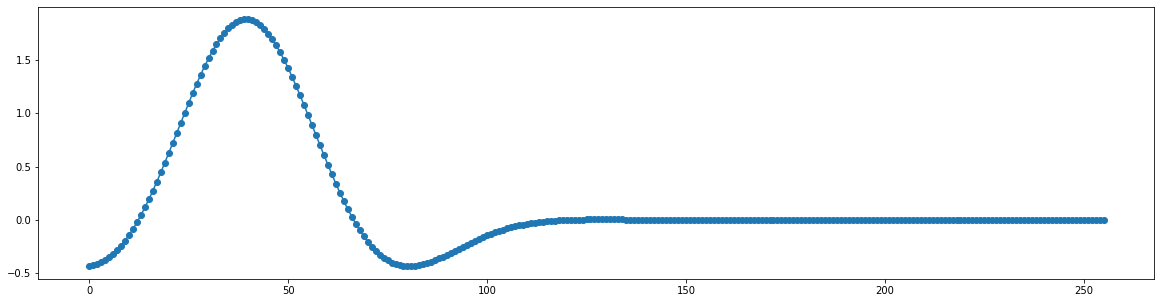

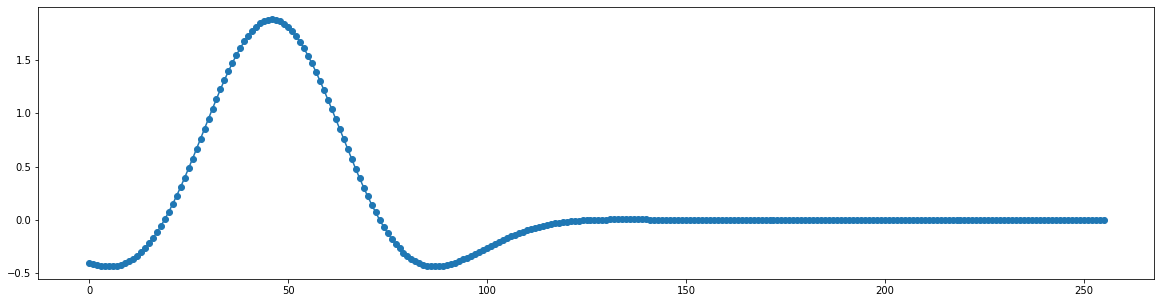

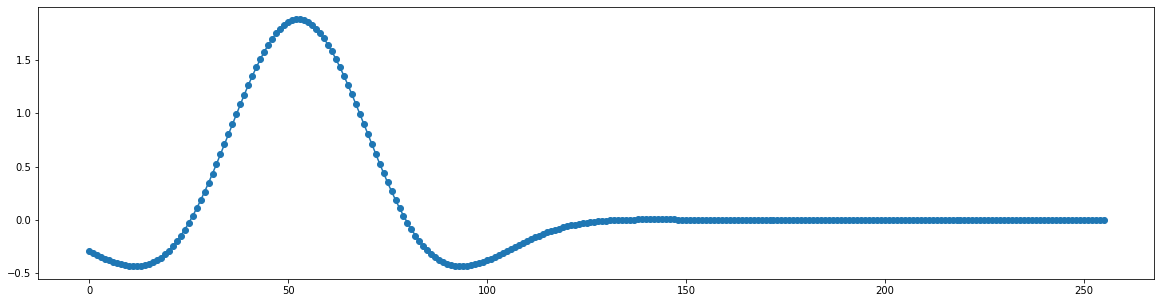

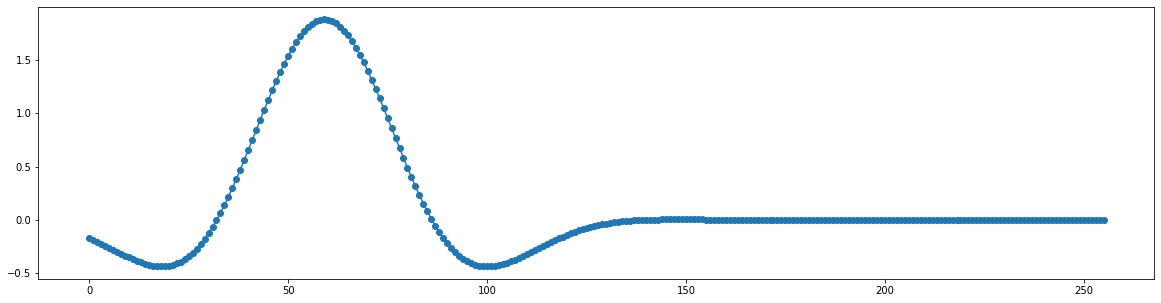

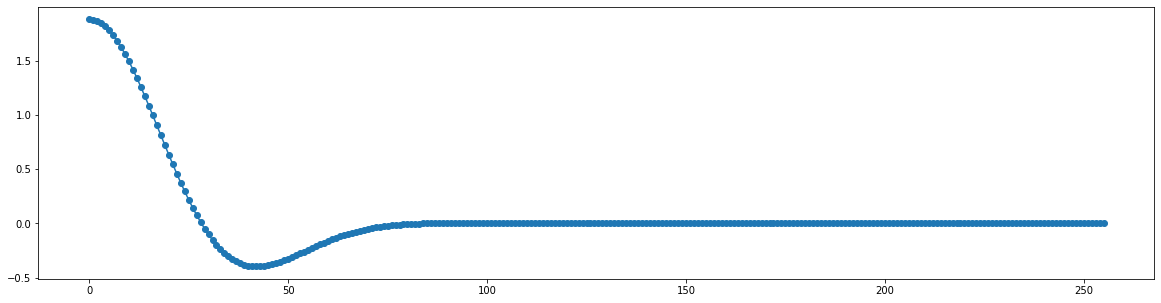

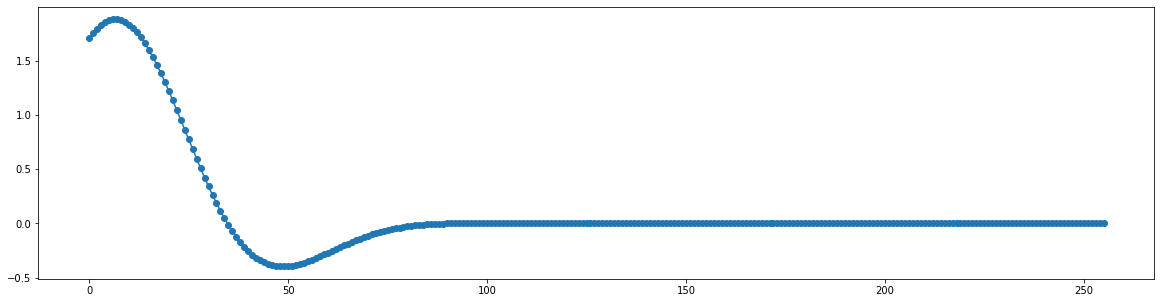

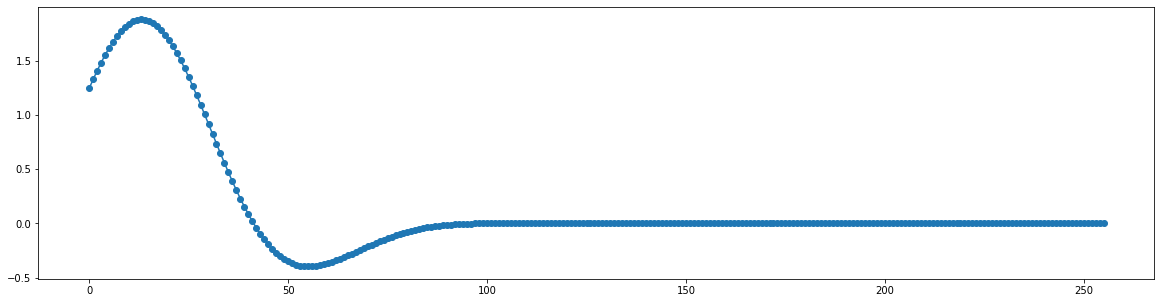

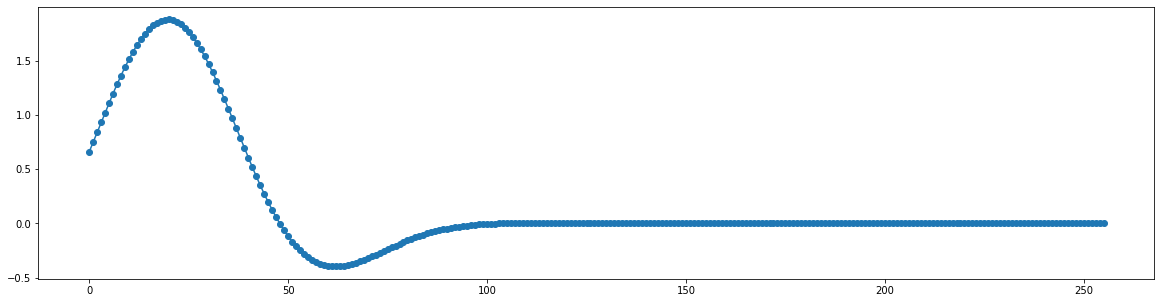

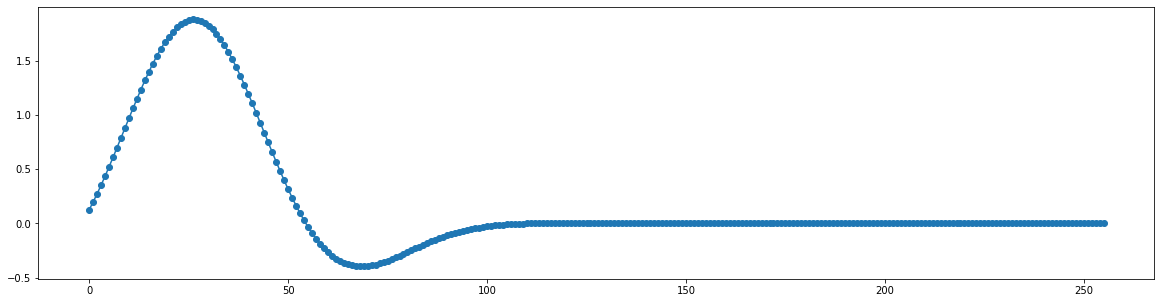

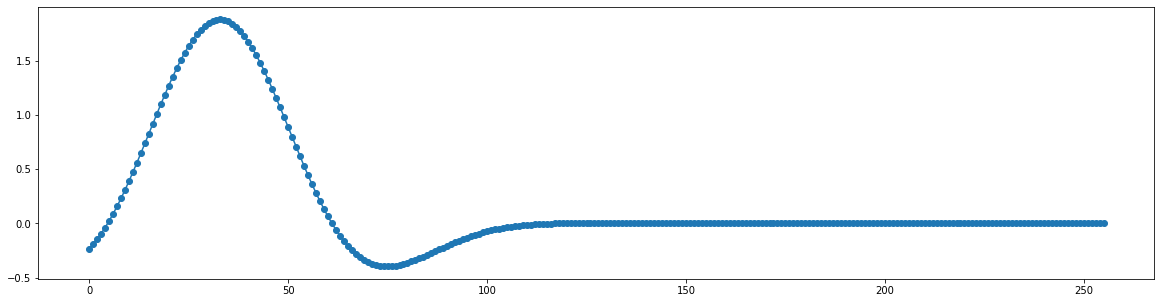

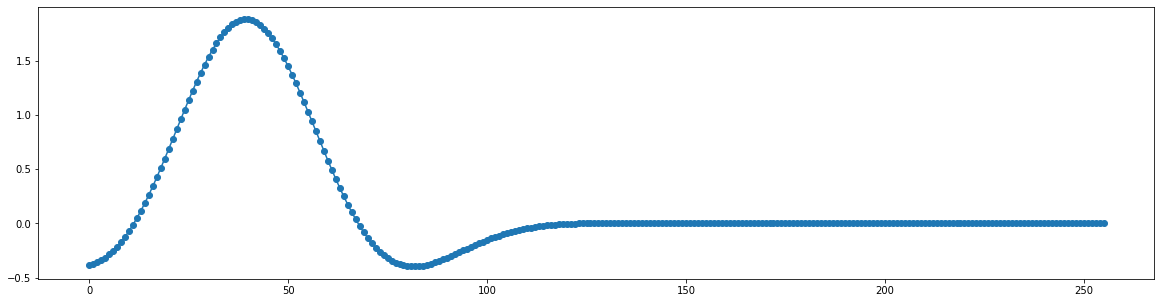

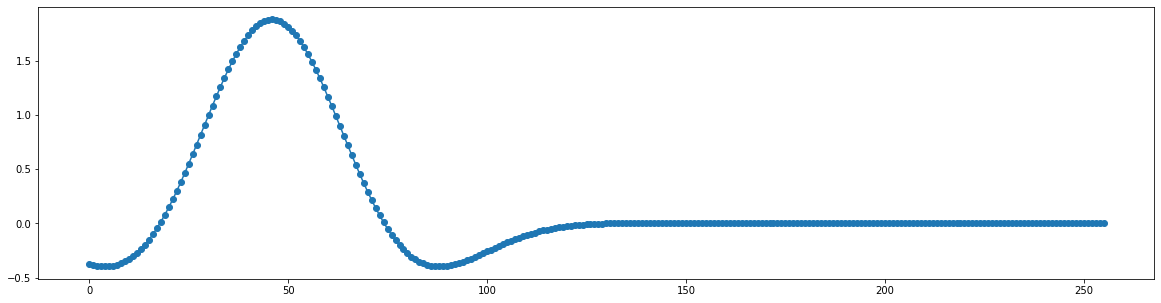

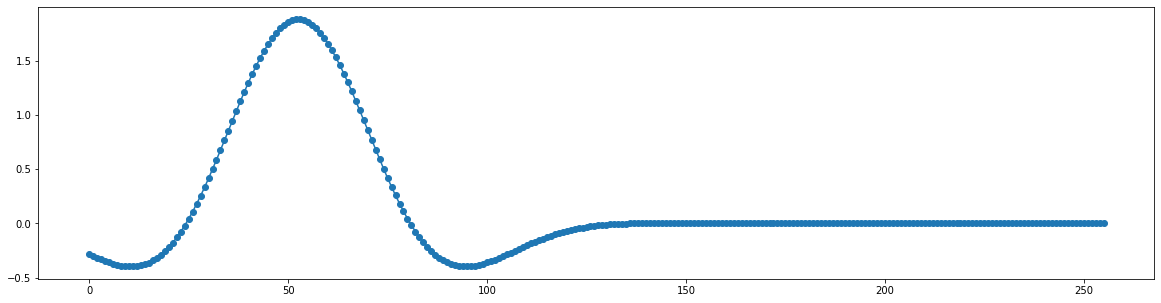

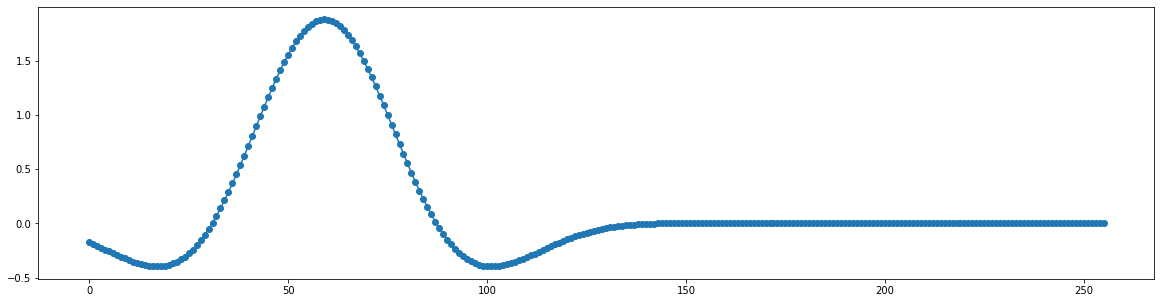

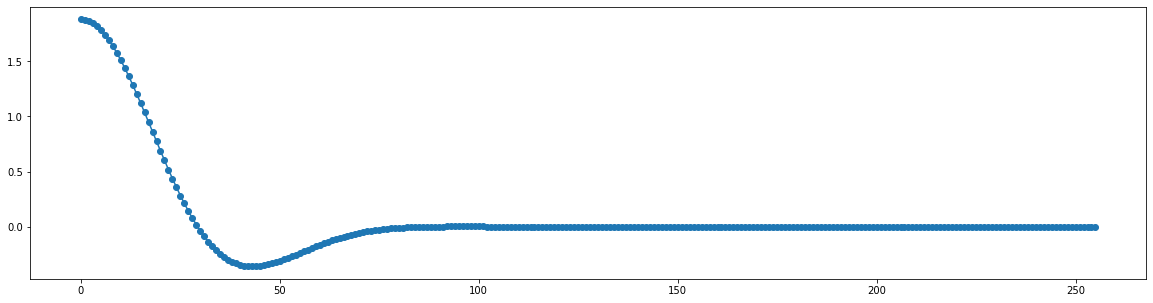

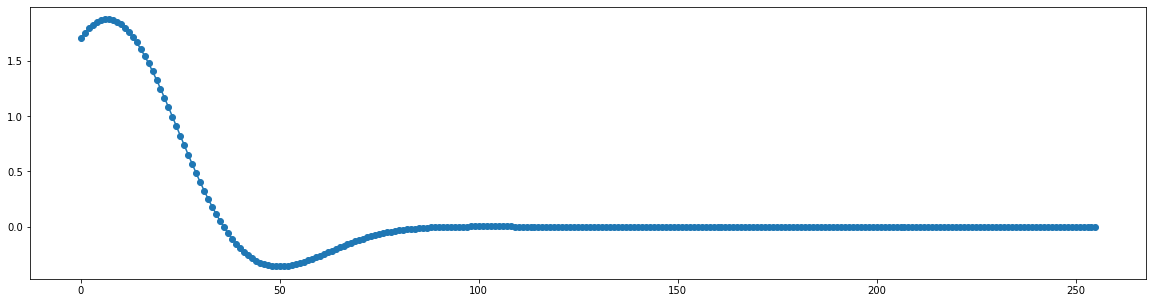

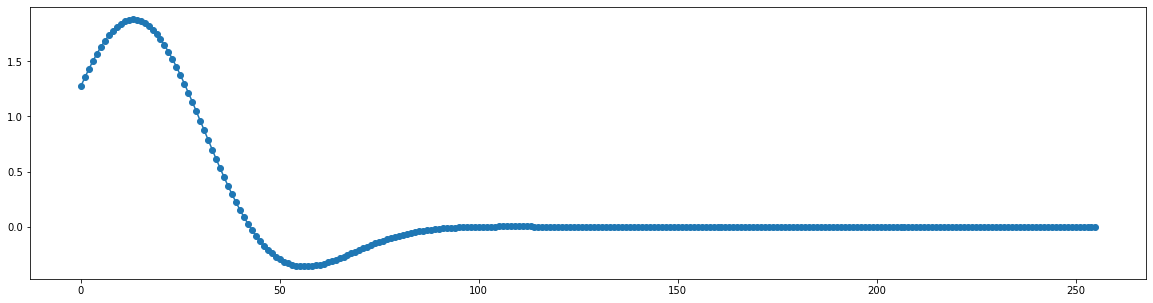

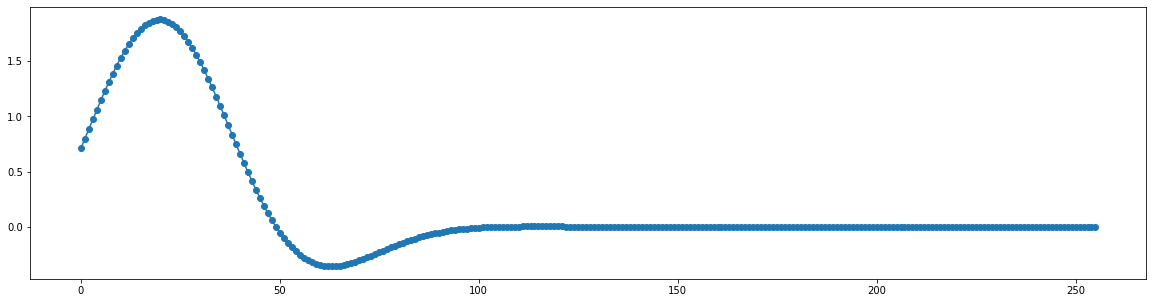

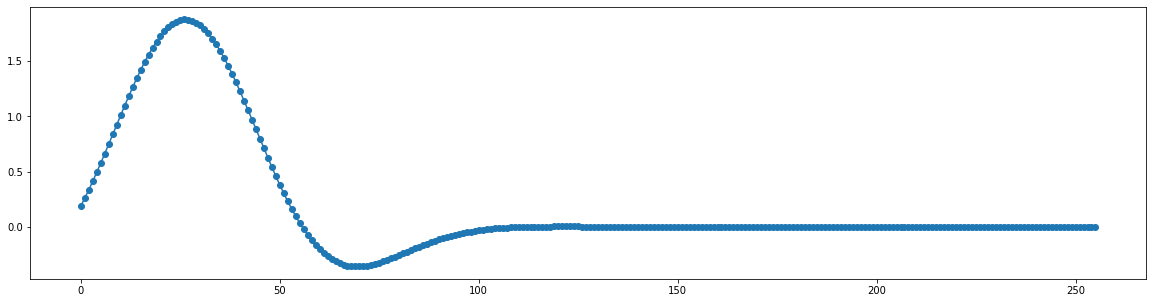

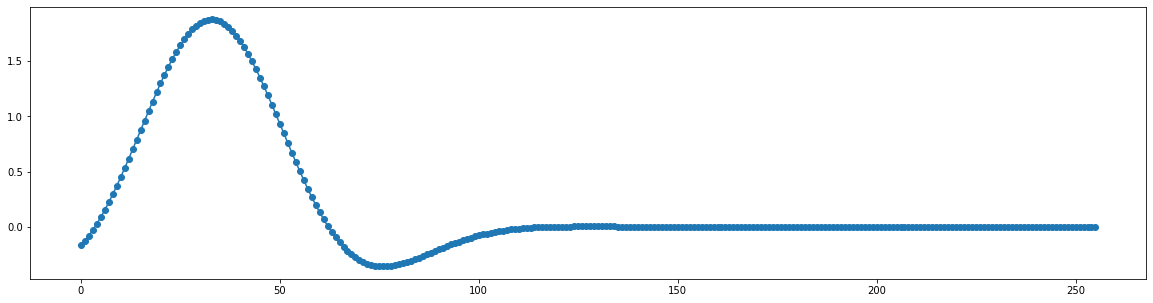

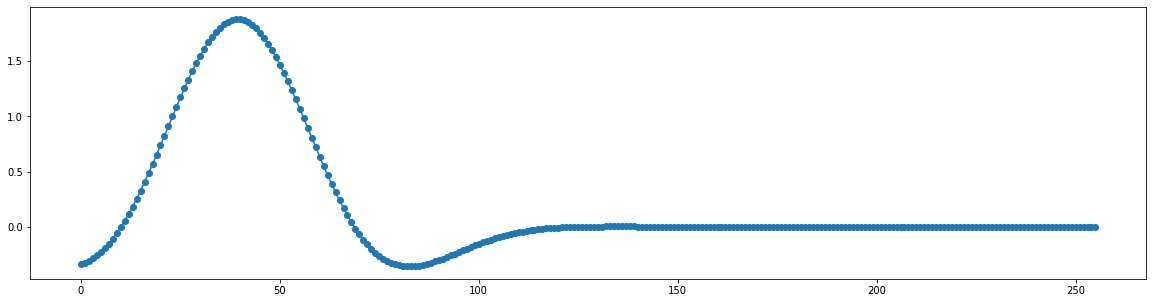

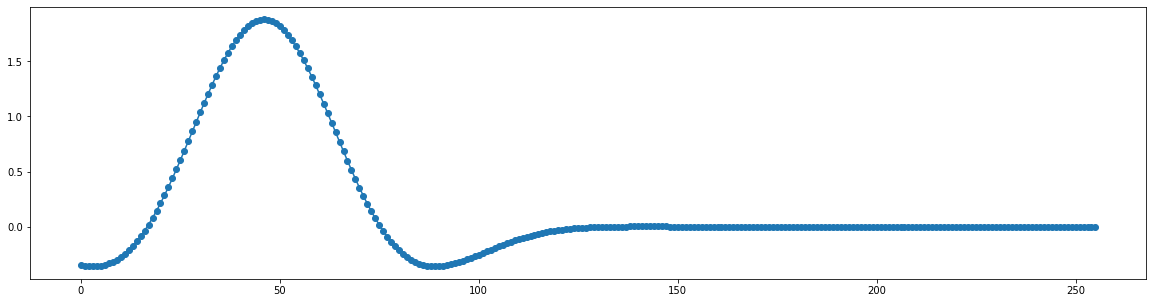

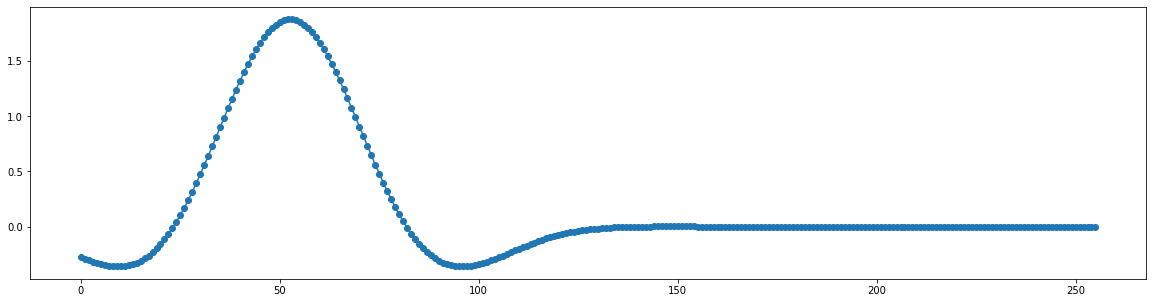

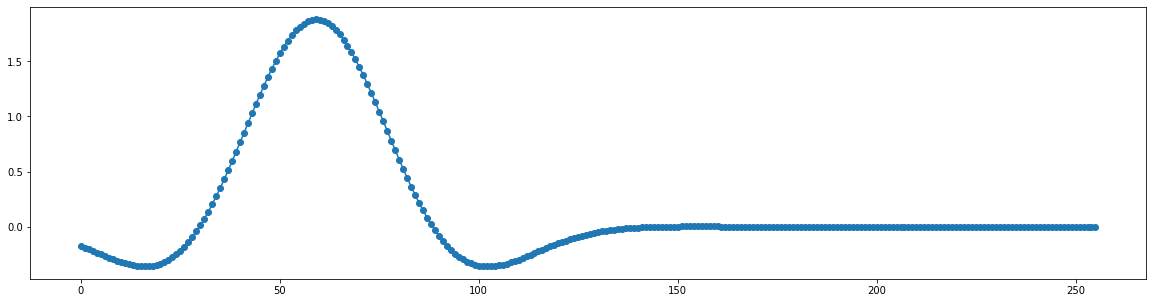

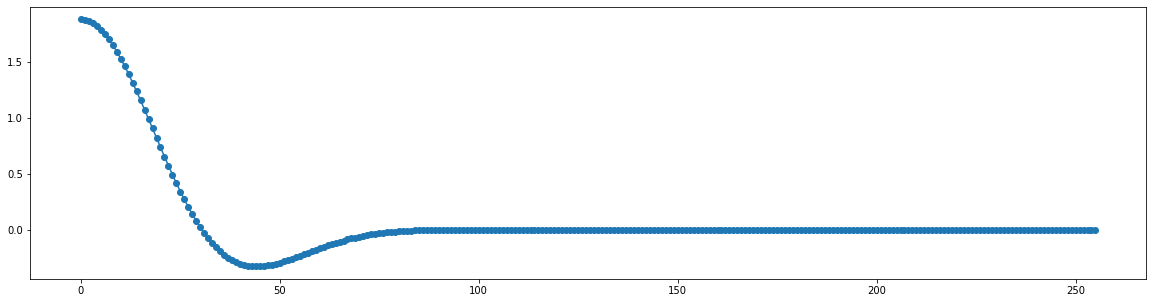

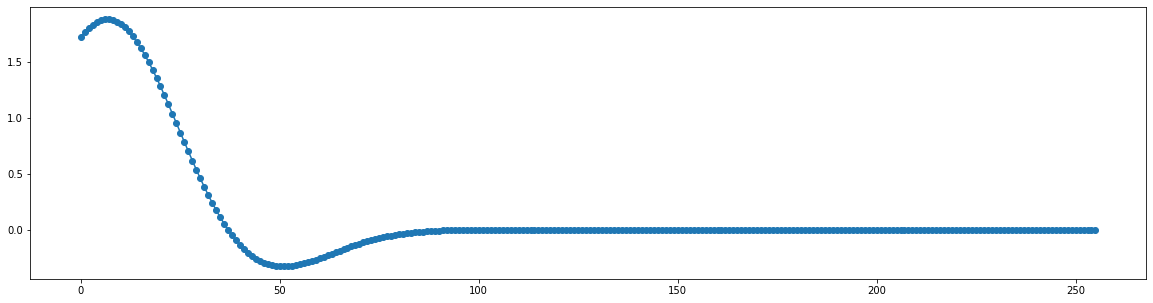

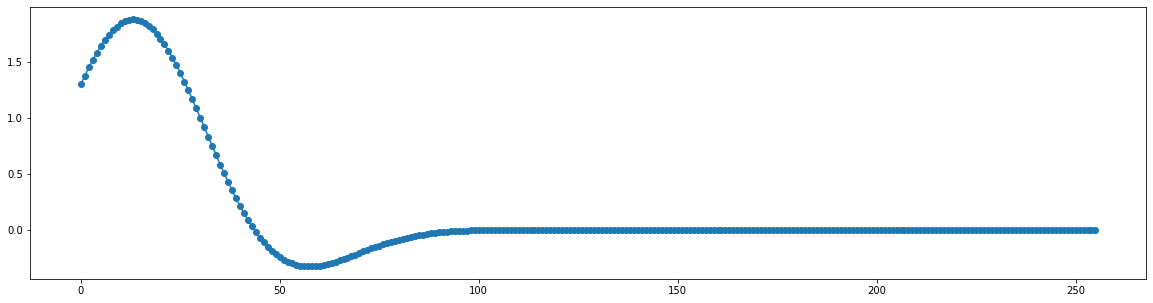

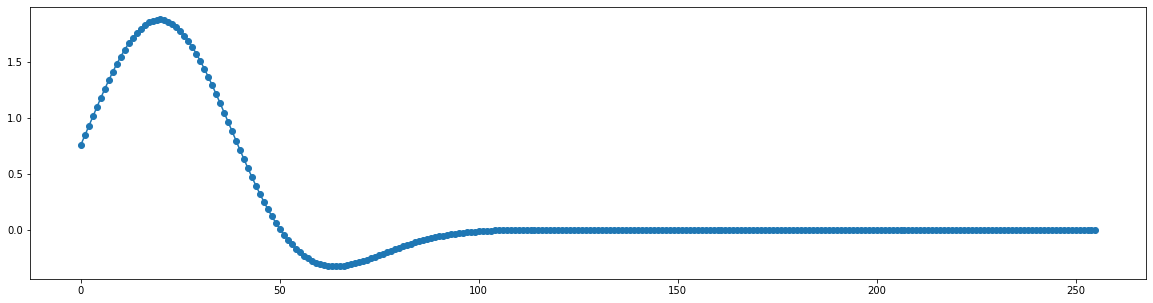

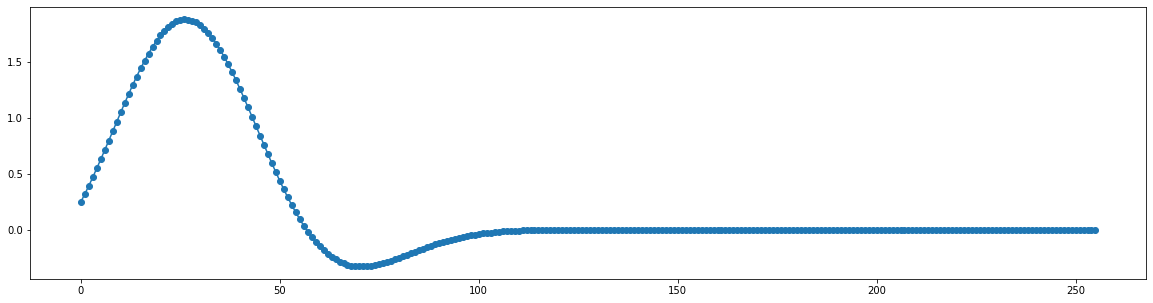

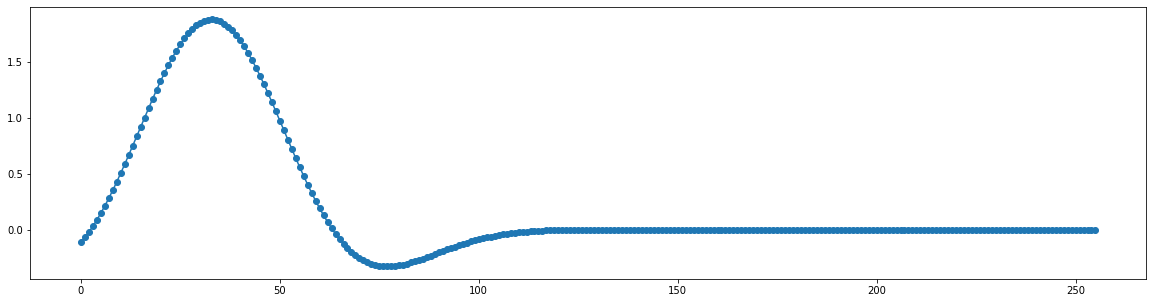

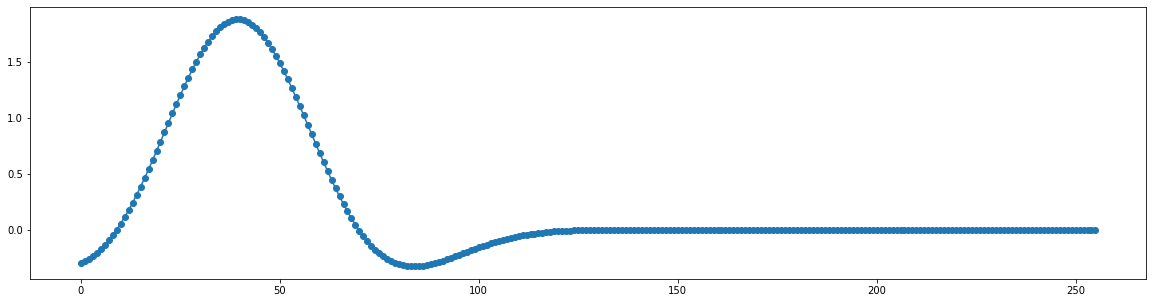

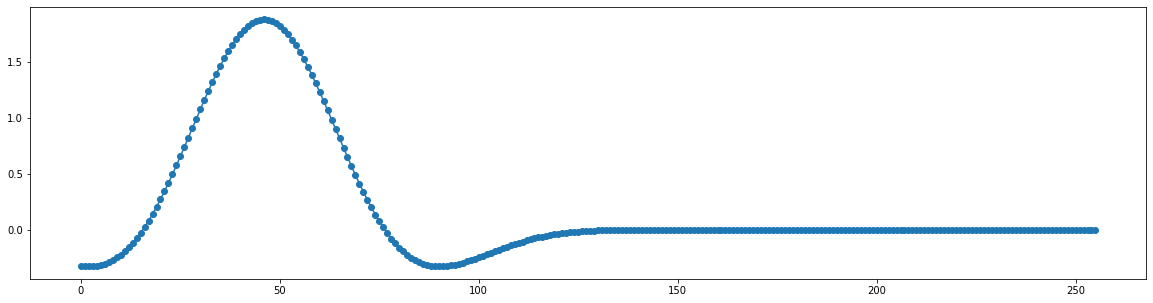

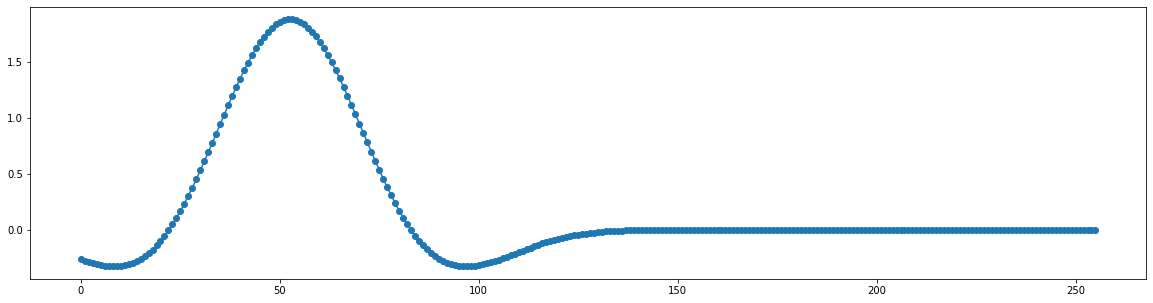

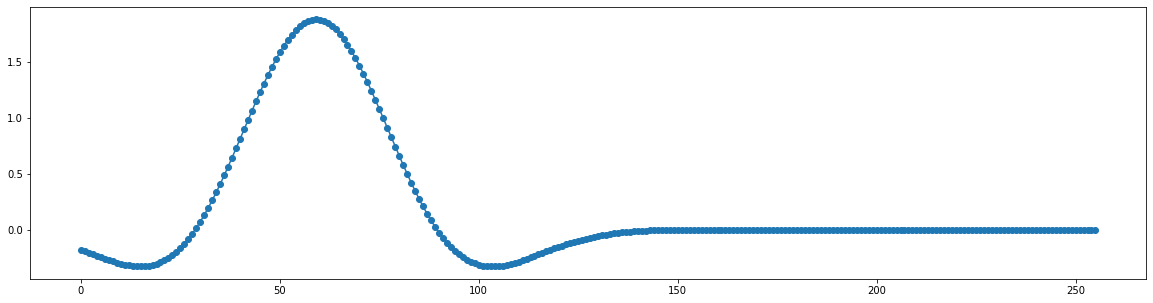

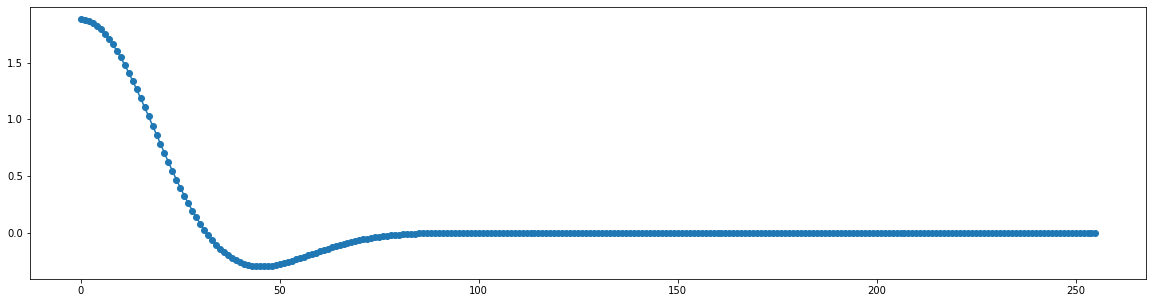

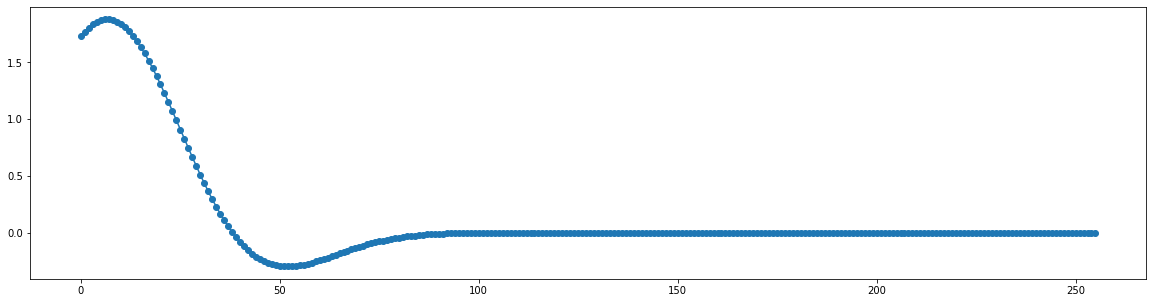

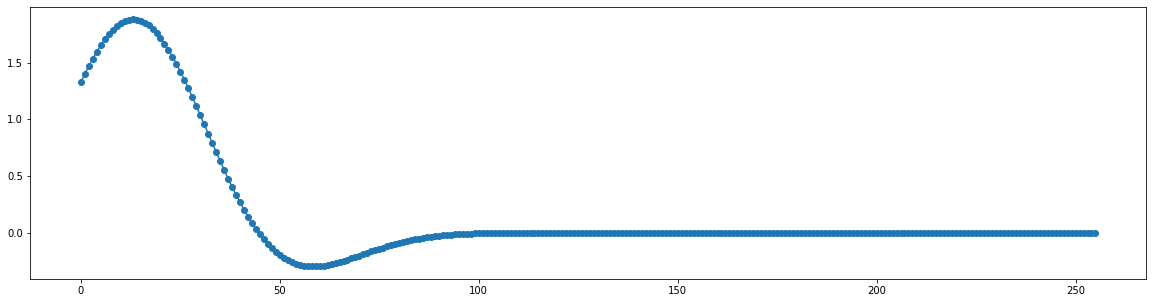

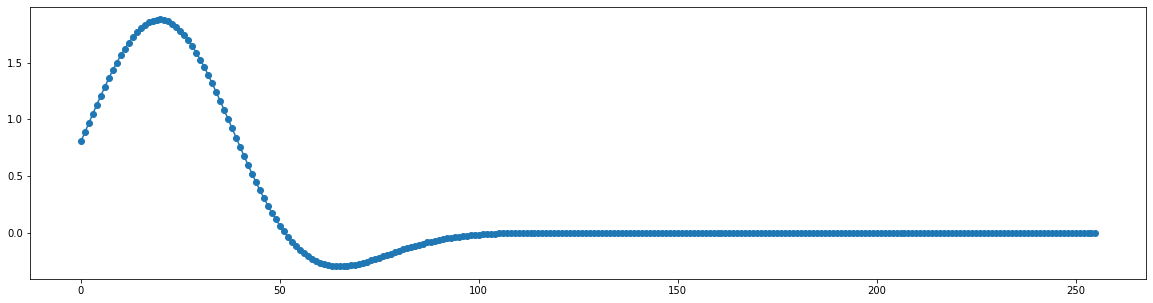

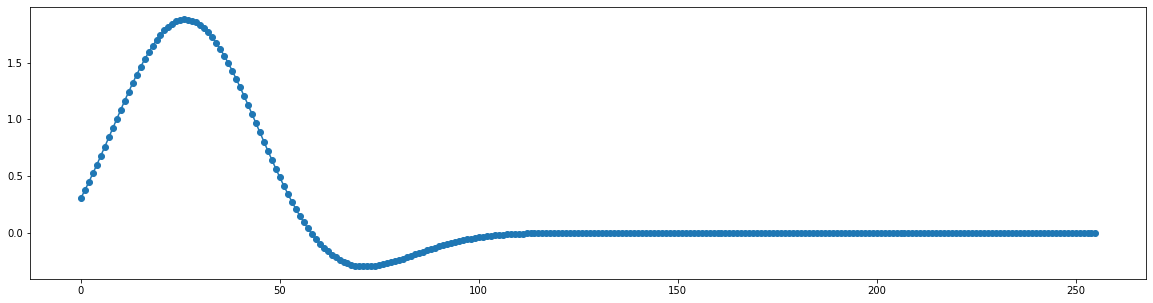

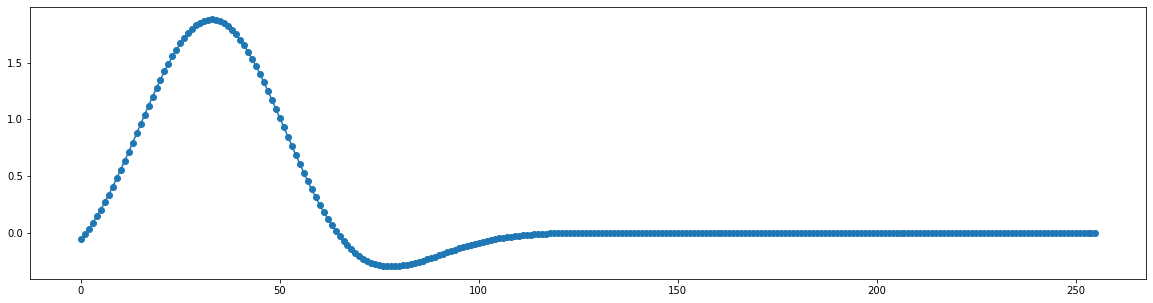

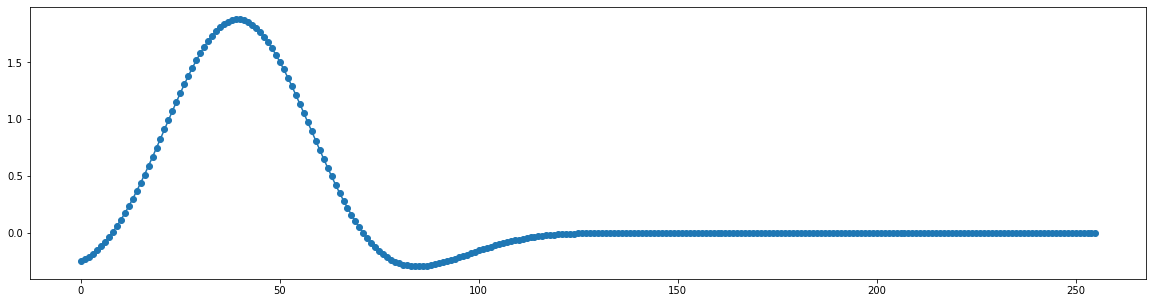

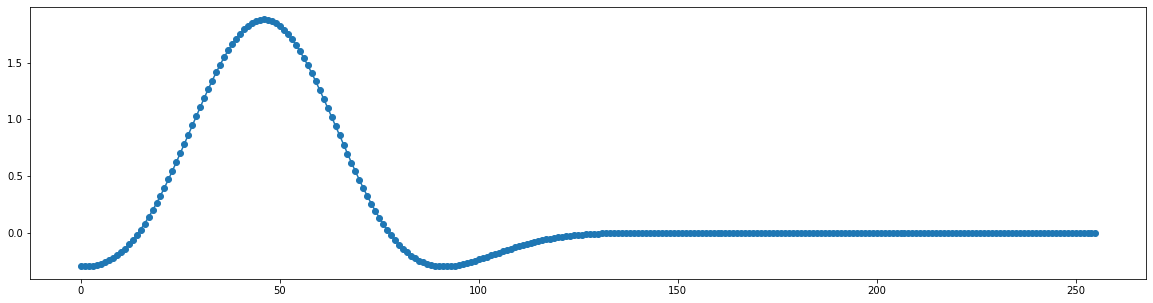

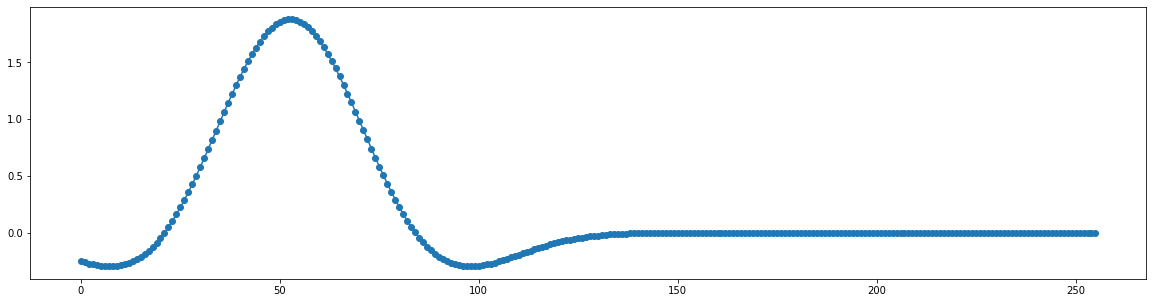

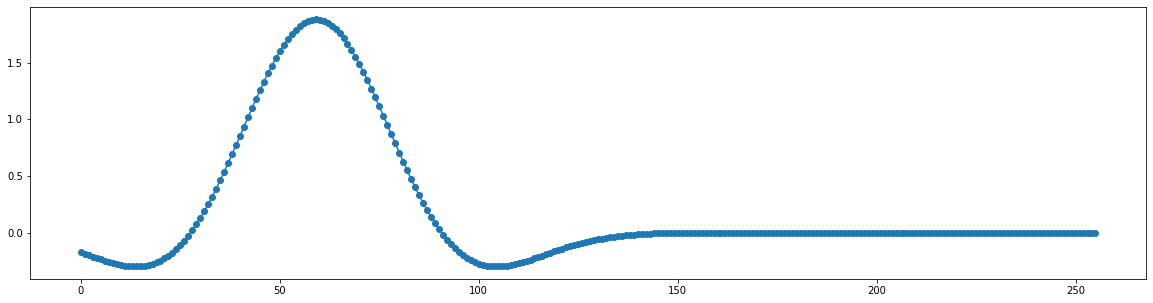

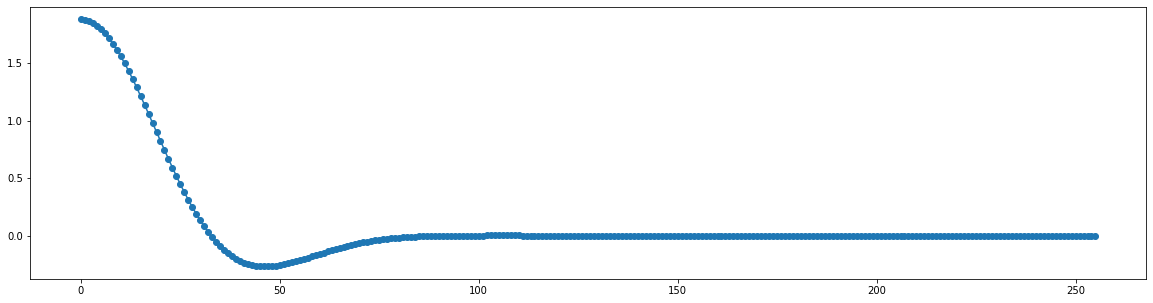

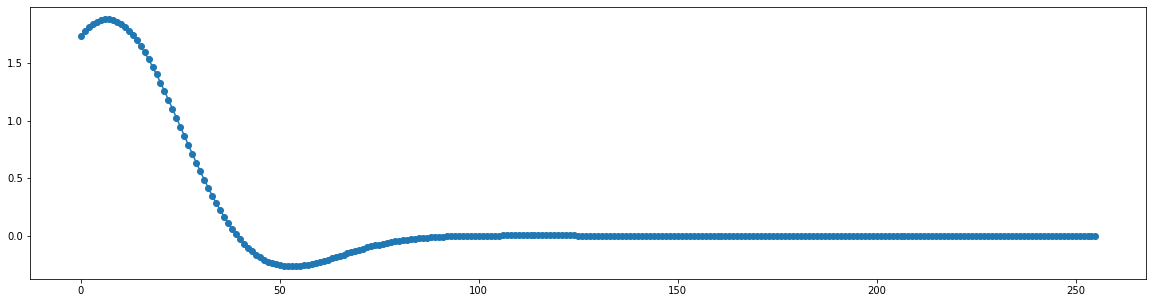

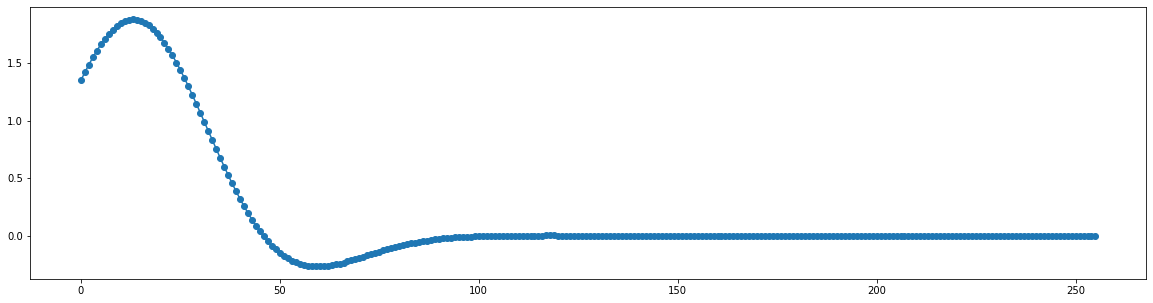

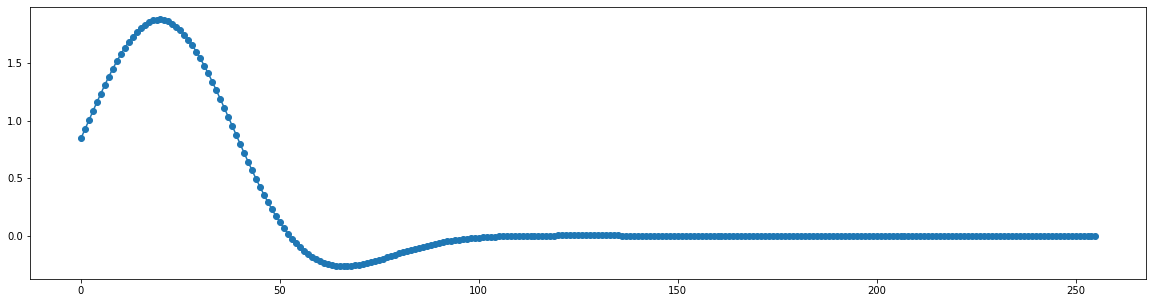

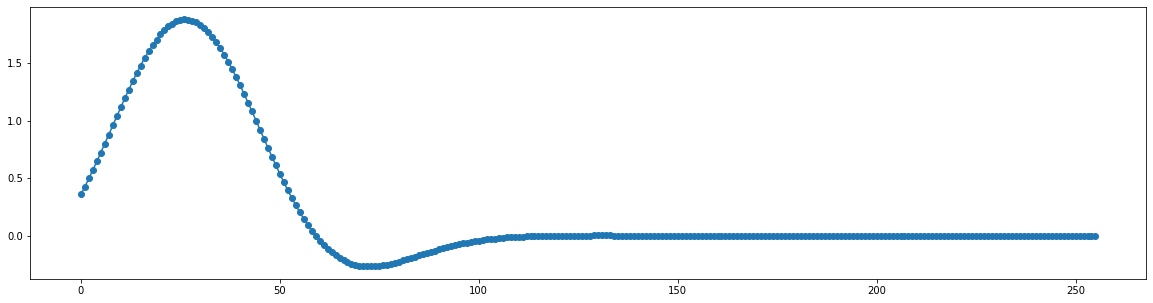

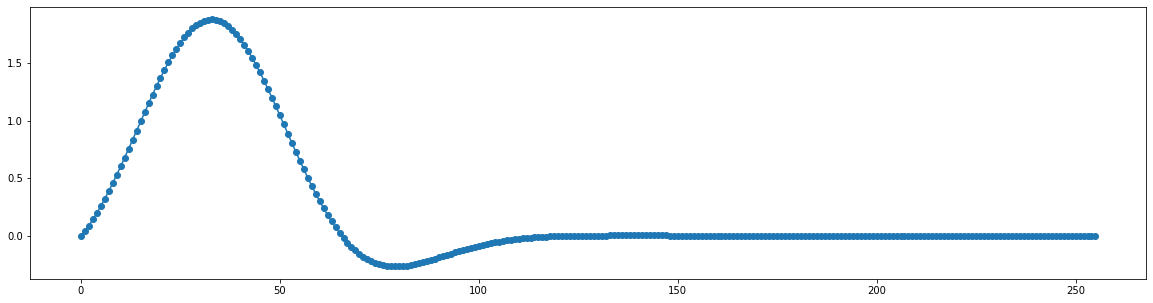

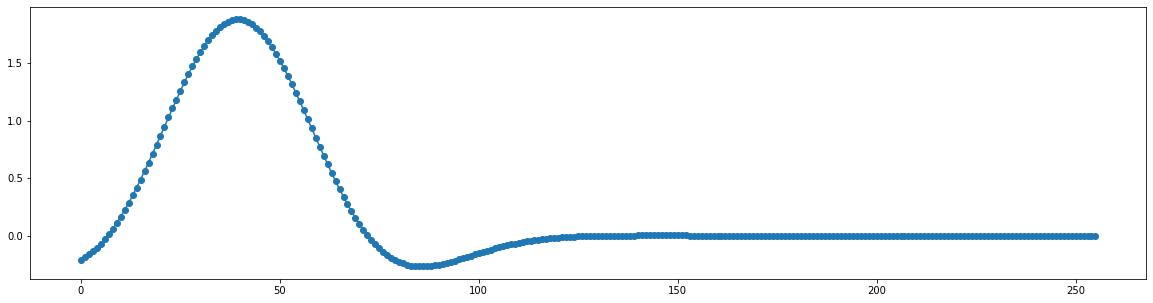

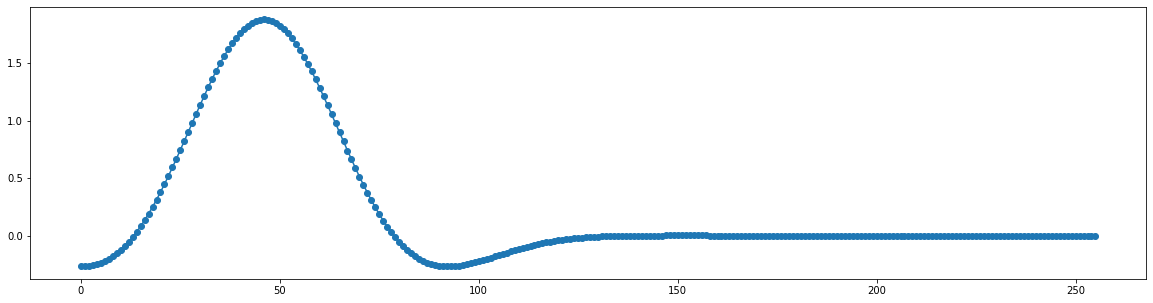

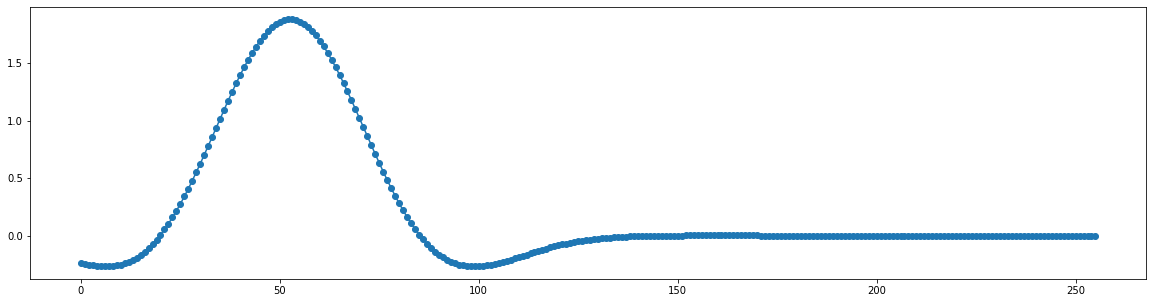

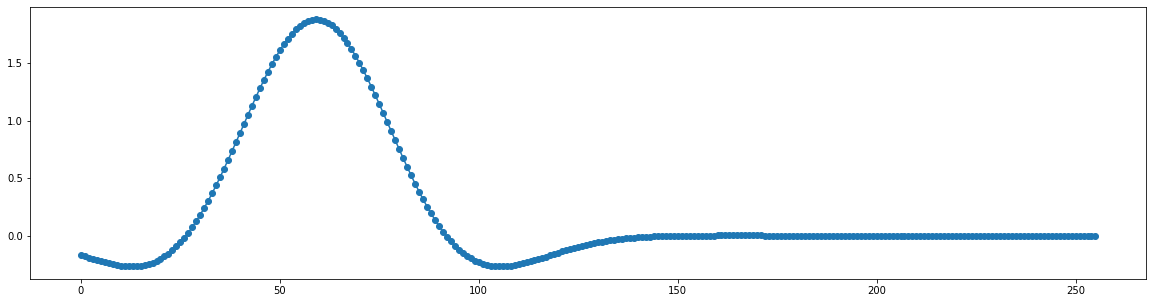

In [12]:
widths = [28.438,14.219,9.479,7.109,5.688,4.740,4.062,3.555,3.160,2.844,2.585,2.370,2.188,2.031,1.896,1.777,1.673,1.580,1.497,1.422,1.354,1.293,1.236,1.185,1.137,1.094,1.053,1.016,0.981]
for a in range(0,len(widths)):
    for b in range(0,10):
        w_abs, w_real, w_imag = Complex_Morlet_Wavelet(0.09, widths[a], b*256, 256)
        plt.figure(1, figsize=(20,5))
        plt.plot(w_real,'-o')
        plt.show()

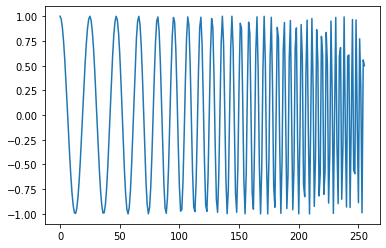

In [4]:
from scipy.signal import chirp, spectrogram
t_1 = np.linspace(0, 1, 256)
x_1 = chirp(t_1, 10, 2, 300, 'quadratic')
plt.plot(x_1)
plt.show()

#widths = np.arange(24, 0,-1)
#widths = [24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1.5, 1.0, 0.7]
#widths = [24.375,12.188,8.125,6.094,4.875,4.062,3.482,3.04,2.708,2.438,2.216,2.031,1.875,1.741,1.625,1.522,1.434,1.354,1.283,1.219,1.161,1.108,1.060,1.016,0.975,0.938,0.903,0.871,0.841]
widths = [28.438,14.219,9.479,7.109,5.688,4.740,4.062,3.555,3.160,2.844,2.585,2.370,2.188,2.031,1.896,1.777,1.673,1.580,1.497,1.422,1.354,1.293,1.236,1.185,1.137,1.094,1.053,1.016,0.981]
#widths = [2.0, 1.0, 0.66, 0.5, 0.4, 0.33, 0.28, 0.25, 0.22, 0.2, 0.18, 0.16, 0.15, 0.14, 0.13, 0.12, 0.11, 0.111, 0.105, 0.1, 0.0952,  0.09090909, 0.08695652, 0.08333333, 0.08, 0.07692308, 0.07407407, 0.07142857, 0.06896552, 0.06666667, 0.06451613, 0.0625, 0.06060606, 0.05882353, 0.05714286, 0.05555556, 0.05405405, 0.05263158, 0.05128205, 0.05, 0.04878049, 0.04761905, 0.04651163, 0.04545455, 0.04444444, 0.04347826, 0.04255319, 0.04166667,0.04081633, 0.04,       0.03921569, 0.03846154, 0.03773585, 0.03703704, 0.03636364, 0.03571429, 0.03508772, 0.03448276, 0.03389831, 0.03333333, 0.03278689, 0.03225806, 0.03174603, 0.03125,    0.03076923, 0.03030303, 0.02985075, 0.02941176, 0.02898551, 0.02857143, 0.02816901, 0.02777778, 0.02739726, 0.02702703, 0.02666667, 0.02631579, 0.02597403, 0.02564103, 0.02531646, 0.025, 0.02469136, 0.02439024, 0.02409639, 0.02380952, 0.02352941, 0.02325581, 0.02298851, 0.02272727, 0.02247191, 0.02222222, 0.02197802, 0.02173913, 0.02150538, 0.0212766,  0.02105263, 0.02083333, 0.02061856, 0.02040816, 0.02020202]
resultss = np.zeros((len(widths), len(x_1)))

for a in range(0,len(widths)):
    #plt.figure(1, figsize=(15,5))
    #w_abs, w_real, w_imag = Complex_Morlet_Wavelet(0.01, widths[a], 0)
    #plt.plot(w_real,label="Wavelet with fc 2.0")
    #plt.legend()
    #plt.show()
    for b in range(0,len(x_1)):
        w_abs, w_real, w_imag = Complex_Morlet_Wavelet(0.09, widths[a], b, 256)
        #plt.plot(w_real)
        #plt.show()
        product_sum = 0
        for i in range(0,len(x_1)):
            product_sum += x_1[i]*w_real[i] 
        toadd = (widths[a])**(-1/2) * product_sum
        resultss[a,b] = toadd
        
resultss = np.abs(resultss)

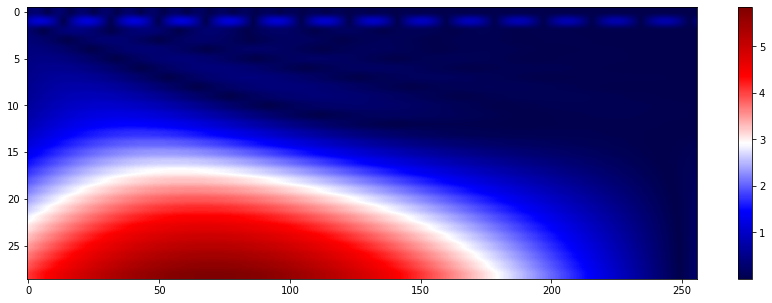

In [5]:
plt.figure(1, figsize=(15,5))
plt.imshow(resultss, cmap='seismic', aspect='auto') #,origin='lower')  
plt.colorbar()
plt.show()    

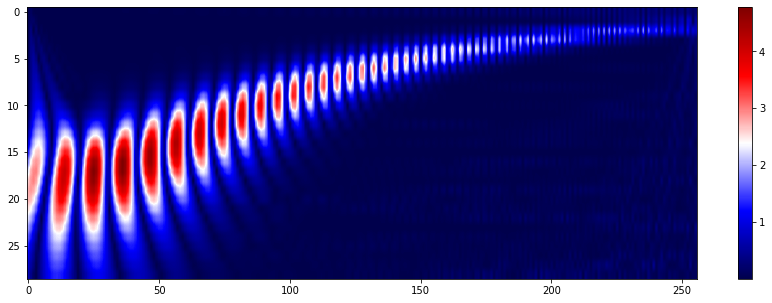

In [6]:
widths = np.arange(1, 30)
cwtmatr, freqs = pywt.cwt(x_1, widths, 'morl') #'cmor0.2-3.0'
cwt_values = np.abs(cwtmatr)

plt.figure(1, figsize=(15,5))
plt.imshow(cwt_values, cmap='seismic', aspect='auto')  
plt.colorbar()
plt.show()